___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***".
In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

Customer Personality Analysis is a detailed analysis of a company’s ideal customers.
It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# About the dataset 

PEOPLE
- ID: Customer's unique identifier.
- Year_Birth: Customer's birth year.
- Education: Customer's education level.
- Marital_Status: Customer's marital status.
- Income: Customer's yearly household income.
- Kidhome: Number of children in customer's household.
- Teenhome: Number of teenagers in customer's household.
- Dt_Customer: Date of customer's enrollment with the company.
- Recency: Number of days since customer's last purchase.
- Complain: 1 if customer complained in the last 2 years, 0 otherwise.

PRODUCTS

- MntWines: Amount spent on wine in last 2 years.
- MntFruits: Amount spent on fruits in last 2 years.
- MntMeatProducts: Amount spent on meat in last 2 years.
- MntFishProducts: Amount spent on fish in last 2 years.
- MntSweetProducts: Amount spent on sweets in last 2 years.
- MntGoldProds: Amount spent on gold in last 2 years.

PROMOTION

- NumDealsPurchases: Number of purchases made with a discount.
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise.

PLACE

- NumWebPurchases: Number of purchases made through the company’s web site.
- NumCatalogPurchases: Number of purchases made using a catalogue.
- NumStorePurchases: Number of purchases made directly in stores.
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

### Load Dataset

In [34]:
df0 = pd.read_csv("marketing_campaign.csv", sep=";")
df = df0.copy()

In [35]:
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [37]:
df.describe().T

count      mean       std  min      25%       50%  \
ID                    2240  5,592.16  3,246.66    0 2,828.25  5,458.50   
Year_Birth            2240  1,968.81     11.98 1893     1959      1970   
Income                2216 52,247.25 25,173.08 1730    35303 51,381.50   
Kidhome               2240      0.44      0.54    0        0         0   
Teenhome              2240      0.51      0.54    0        0         0   
Recency               2240     49.11     28.96    0       24        49   
MntWines              2240    303.94    336.60    0    23.75    173.50   
MntFruits             2240     26.30     39.77    0        1         8   
MntMeatProducts       2240    166.95    225.72    0       16        67   
MntFishProducts       2240     37.53     54.63    0        3        12   
MntSweetProducts      2240     27.06     41.28    0        1         8   
MntGoldProds          2240     44.02     52.17    0        9        24   
NumDealsPurchases     2240      2.33      1.93    0        1         2   
NumWebPurchases       2240      4.08      2.78    0        2         4   
NumCatalogPurchases   2240      2.66      2.92    0        0         2   
NumStorePurchases     2240      5.79      3.25    0        3         5   
NumWebVisitsMonth     2240      5.32      2.43    0        3         6   
AcceptedCmp3          2240      0.07      0.26    0        0         0   
AcceptedCmp4          2240      0.07      0.26    0        0         0   
AcceptedCmp5          2240      0.07      0.26    0        0         0   
AcceptedCmp1          2240      0.06      0.25    0        0         0   
AcceptedCmp2          2240      0.01      0.11    0        0         0   
Complain              2240      0.01      0.10    0        0         0   
Z_CostContact         2240         3         0    3        3         3   
Z_Revenue             2240        11         0   11       11        11   
Response              2240      0.15      0.36    0        0         0   

                         75%    max  
ID                  8,427.75  11191  
Year_Birth              1977   1996  
Income                 68522 666666  
Kidhome                    1      2  
Teenhome                   1      2  
Recency                   74     99  
MntWines              504.25   1493  
MntFruits                 33    199  
MntMeatProducts          232   1725  
MntFishProducts           50    259  
MntSweetProducts          33    263  
MntGoldProds              56    362  
NumDealsPurchases          3     15  
NumWebPurchases            6     27  
NumCatalogPurchases        4     28  
NumStorePurchases          8     13  
NumWebVisitsMonth          7     20  
AcceptedCmp3               0      1  
AcceptedCmp4               0      1  
AcceptedCmp5               0      1  
AcceptedCmp1               0      1  
AcceptedCmp2               0      1  
Complain                   0      1  
Z_CostContact              3      3  
Z_Revenue                 11     11  
Response                   0      1

In [38]:
df.describe(include="object").T

count unique         top  freq
Education       2240      5  Graduation  1127
Marital_Status  2240      8     Married   864
Dt_Customer     2240    663  2012-08-31    12

In [39]:
df.duplicated().sum()

0

In [40]:
df.shape

(2240, 29)

In [41]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [42]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [43]:
df.columns = df.columns.str.lower()

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

### response 

In [44]:
df["response"].value_counts()

response
0    1906
1     334
Name: count, dtype: int64

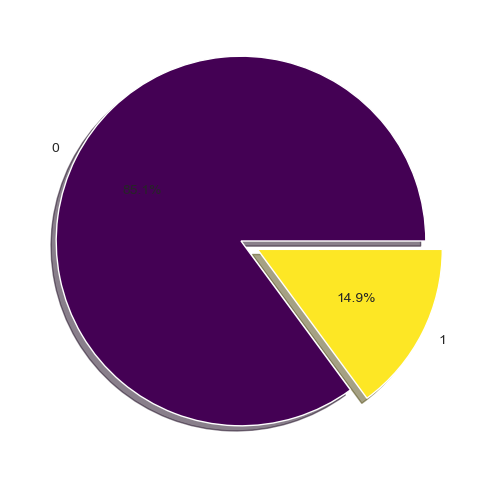

In [45]:
df["response"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0, 0.1), shadow=True, figsize=(6,6))
plt.ylabel("");

### complain 

In [46]:
df["complain"].value_counts()

complain
0    2219
1      21
Name: count, dtype: int64

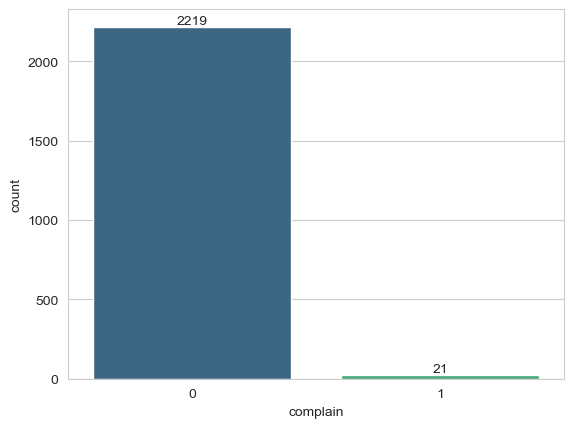

In [47]:
ax = sns.countplot(data=df, x="complain", palette ="viridis")
ax.bar_label(ax.containers[0]);
plt.show()

### id

In [48]:
df.id.nunique()

2240

In [49]:
# since this is the unique value given for each customer, this column will be dropped. 

In [50]:
df.drop(columns=["id"], inplace=True)

###  z_costcontact & z_revenue

In [51]:
df["z_costcontact"].value_counts()

z_costcontact
3    2240
Name: count, dtype: int64

In [52]:
df["z_revenue"].value_counts()

z_revenue
11    2240
Name: count, dtype: int64

In [53]:
# since there is only one unique value in these columns, they are just nothing for machine learning.

In [54]:
df.drop(columns=["z_costcontact", "z_revenue"], inplace=True)

### income 

In [55]:
df["income"].value_counts()

income
7500     12
35860     4
37760     3
83844     3
63841     3
         ..
40760     1
41452     1
6835      1
33622     1
52869     1
Name: count, Length: 1974, dtype: int64

In [56]:
df[df['income'].isna()]

year_birth   education marital_status  income  kidhome  teenhome  \
10          1983  Graduation        Married     NaN        1         0   
27          1986  Graduation         Single     NaN        1         0   
43          1959         PhD         Single     NaN        0         0   
48          1951  Graduation         Single     NaN        2         1   
58          1982  Graduation         Single     NaN        1         0   
71          1973    2n Cycle        Married     NaN        1         0   
90          1957         PhD        Married     NaN        2         1   
91          1957  Graduation         Single     NaN        1         1   
92          1973      Master       Together     NaN        0         0   
128         1961         PhD        Married     NaN        0         1   
133         1963  Graduation        Married     NaN        0         1   
312         1989  Graduation        Married     NaN        0         0   
319         1970  Graduation         Single     NaN        1         2   
1379        1970      Master       Together     NaN        0         1   
1382        1958  Graduation       Together     NaN        1         1   
1383        1964    2n Cycle         Single     NaN        1         1   
1386        1972         PhD       Together     NaN        1         0   
2059        1969      Master       Together     NaN        1         1   
2061        1981         PhD         Single     NaN        1         0   
2078        1971  Graduation        Married     NaN        1         1   
2079        1954      Master       Together     NaN        0         1   
2081        1955  Graduation         Single     NaN        0         1   
2084        1943      Master          Widow     NaN        0         0   
2228        1978    2n Cycle       Together     NaN        0         0   

     dt_customer  recency  mntwines  mntfruits  ...  numcatalogpurchases  \
10    2013-11-15       11         5          5  ...                    0   
27    2013-02-20       19         5          1  ...                    0   
43    2013-11-05       80        81         11  ...                    3   
48    2014-01-01       96        48          5  ...                    1   
58    2013-06-17       57        11          3  ...                    0   
71    2012-09-14       25        25          3  ...                    0   
90    2012-11-19        4       230         42  ...                    2   
91    2014-05-27       45         7          0  ...                    0   
92    2013-11-23       87       445         37  ...                    4   
128   2013-07-11       23       352          0  ...                    1   
133   2013-08-11       96       231         65  ...                    5   
312   2013-06-03       69       861        138  ...                    5   
319   2013-08-23       67       738         20  ...                    3   
1379  2013-04-01       39       187          5  ...                    2   
1382  2012-09-03       87        19          4  ...                    0   
1383  2014-01-12       49         5          1  ...                    0   
1386  2014-03-02       17        25          1  ...                    0   
2059  2013-05-18       52       375         42  ...                   10   
2061  2013-05-31       82        23          0  ...                    0   
2078  2013-03-03       82        71          1  ...                    1   
2079  2013-06-23       83       161          0  ...                    1   
2081  2013-10-18       95       264          0  ...                    1   
2084  2013-10-30       75       532        126  ...                    5   
2228  2012-08-12       53        32          2  ...                    0   

      numstorepurchases  numwebvisitsmonth  acceptedcmp3  acceptedcmp4  \
10                    2                  7             0             0   
27                    0                  1             0             0   
43                    4         

In [57]:
df.groupby(["marital_status", "education"])[["income"]].mean()

income
marital_status education           
Absurd         Graduation     79244
               Master         65487
Alone          Graduation     34176
               Master         61331
               PhD            35860
Divorced       2n Cycle   49,395.13
               Basic           9548
               Graduation 54,526.04
               Master     50,331.95
               PhD        53,096.62
Married        2n Cycle   46,201.10
               Basic      21,960.50
               Graduation 50,800.26
               Master     53,286.03
               PhD        58,138.03
Single         2n Cycle   53,673.94
               Basic      18,238.67
               Graduation 51,322.18
               Master     53,530.56
               PhD        53,314.61
Together       2n Cycle   44,736.41
               Basic      21,240.07
               Graduation 55,758.48
               Master     52,109.01
               PhD        56,041.42
Widow          2n Cycle   51,392.20
               Basic          22123
               Graduation 54,976.66
               Master     58,401.55
               PhD        60,288.08
YOLO           PhD            48432

In [58]:
df['income'] = df.groupby(["marital_status", "education"])['income'].transform(lambda x: x.fillna(x.mean()))

In [59]:
df.isnull().sum().any()

False

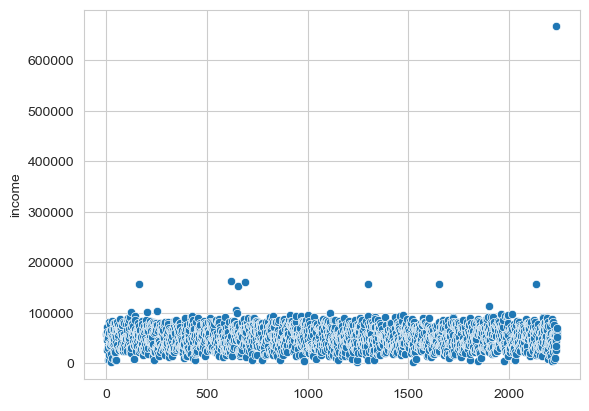

In [60]:
sns.scatterplot(df["income"]);

In [61]:
df = df[df["income"]< 200000]

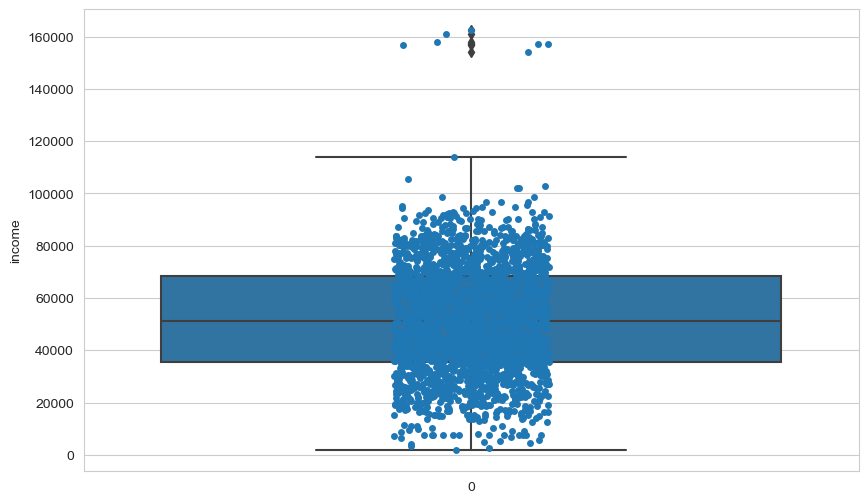

In [62]:
plt.figure(figsize = (10,6))

plt.subplot()
sns.boxplot(df["income"])

plt.subplot()
sns.stripplot(df["income"])

plt.show()

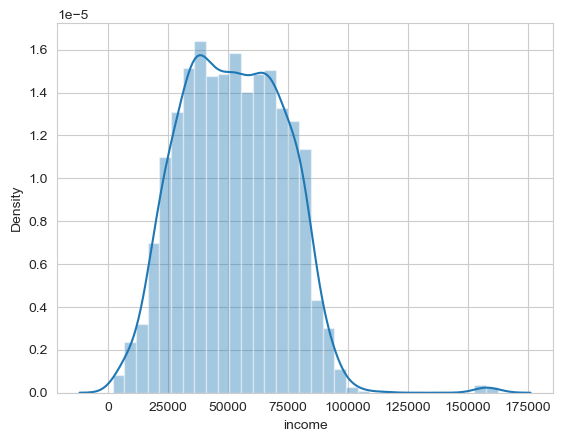

In [63]:
sns.distplot(df["income"]);

In [64]:
df.income.describe()

count        2239
mean    51,974.33
std     21,413.18
min          1730
25%     35,533.50
50%         51373
75%     68,277.50
max        162397
Name: income, dtype: float64

In [65]:
bins = [0, 35533.50, 68277.50, float('inf')]
labels = ['low', 'medium', 'high']

df['income_level'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)

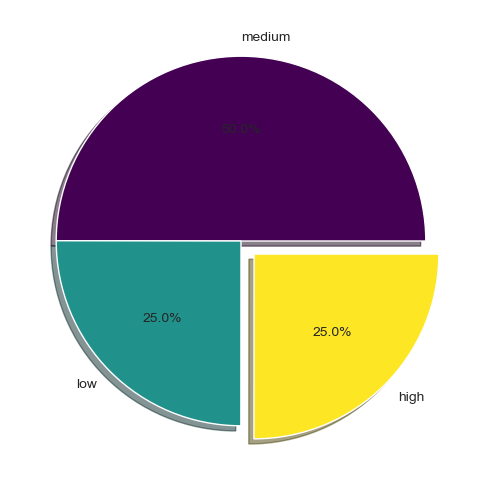

In [66]:
df["income_level"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0, 0, 0.1), shadow=True, figsize=(6,6))
plt.ylabel("");

### education

In [67]:
df["education"].value_counts()

education
Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [68]:
df["education"] = df["education"].replace(['Basic'], 'Under Graduate') 
df["education"] = df["education"].replace(['PhD', 'Master', '2n Cycle'], 'Post Graduate') 
df["education"] = df["education"].replace(['Graduation'], 'Graduate') 

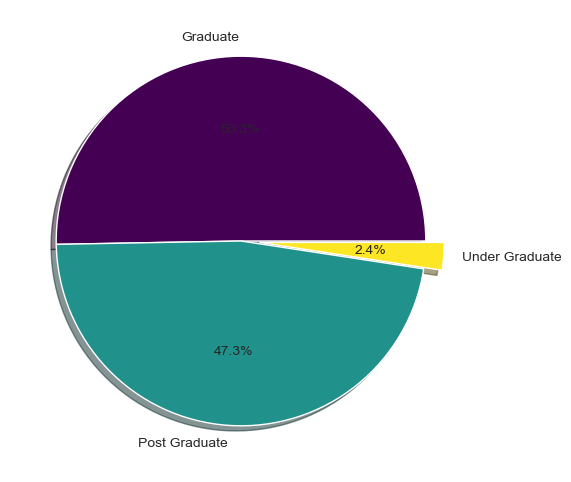

In [69]:
df["education"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="viridis", explode=(0, 0, 0.1), shadow=True, figsize=(6,6))
plt.ylabel("");

###  marital_status

In [70]:
df['marital_status'].value_counts()

marital_status
Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [71]:
df[df["marital_status"]=="Absurd"].T

2093           2134
year_birth                 1993           1957
education              Graduate  Post Graduate
marital_status           Absurd         Absurd
income                    79244          65487
kidhome                       0              0
teenhome                      0              0
dt_customer          2012-12-19     2014-01-10
recency                      58             48
mntwines                    471            240
mntfruits                   102             67
mntmeatproducts             125            500
mntfishproducts             212            199
mntsweetproducts             61              0
mntgoldprods                245            163
numdealspurchases             1              3
numwebpurchases               4              3
numcatalogpurchases          10              5
numstorepurchases             7              6
numwebvisitsmonth             1              2
acceptedcmp3                  0              0
acceptedcmp4                  0              0
acceptedcmp5                  1              0
acceptedcmp1                  1              0
acceptedcmp2                  0              0
complain                      0              0
response                      1              0
income_level               high         medium

In [72]:
df[df["marital_status"]=="YOLO"].T

2177           2202
year_birth                    1973           1973
education            Post Graduate  Post Graduate
marital_status                YOLO           YOLO
income                       48432          48432
kidhome                          0              0
teenhome                         1              1
dt_customer             2012-10-18     2012-10-18
recency                          3              3
mntwines                       322            322
mntfruits                        3              3
mntmeatproducts                 50             50
mntfishproducts                  4              4
mntsweetproducts                 3              3
mntgoldprods                    42             42
numdealspurchases                5              5
numwebpurchases                  7              7
numcatalogpurchases              1              1
numstorepurchases                6              6
numwebvisitsmonth                8              8
acceptedcmp3                     0              0
acceptedcmp4                     0              0
acceptedcmp5                     0              0
acceptedcmp1                     0              0
acceptedcmp2                     0              0
complain                         0              0
response                         0              1
income_level                medium         medium

In [73]:
df[df["marital_status"]=="Alone"].T

131            138         153
year_birth                    1958           1973        1988
education            Post Graduate  Post Graduate    Graduate
marital_status               Alone          Alone       Alone
income                       61331          35860       34176
kidhome                          1              1           1
teenhome                         1              1           0
dt_customer             2013-03-10     2014-05-19  2014-05-12
recency                         42             37          12
mntwines                       534             15           5
mntfruits                        5              0           7
mntmeatproducts                 47              8          24
mntfishproducts                  0              4          19
mntsweetproducts                 5              2          14
mntgoldprods                    41             20          20
numdealspurchases                5              2           4
numwebpurchases                 11              1           3
numcatalogpurchases              1              1           0
numstorepurchases                6              2           4
numwebvisitsmonth                8              5           6
acceptedcmp3                     0              1           0
acceptedcmp4                     0              0           0
acceptedcmp5                     0              0           0
acceptedcmp1                     0              0           0
acceptedcmp2                     0              0           0
complain                         0              0           0
response                         0              1           0
income_level                medium         medium         low

In [74]:
df['marital_status'] = df['marital_status'].replace(['Married', 'Together'],'Relationship')
df['marital_status'] = df['marital_status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [75]:
df["marital_status"].value_counts()

marital_status
Relationship    1443
Single           796
Name: count, dtype: int64

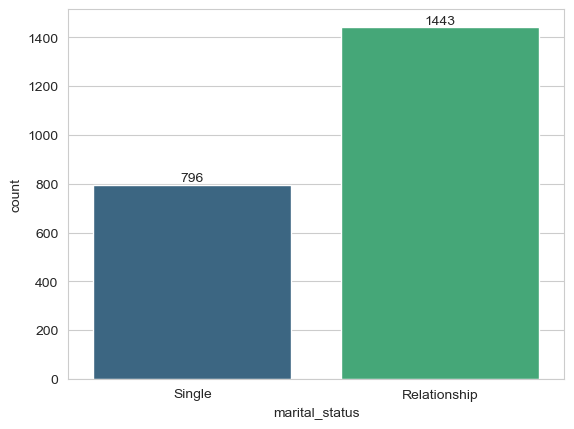

In [76]:
ax = sns.countplot(data=df, x="marital_status", palette="viridis")
ax.bar_label(ax.containers[0]);
plt.show()

### kidhome & teenhome 

In [77]:
df['kidhome'].value_counts()

kidhome
0    1293
1     898
2      48
Name: count, dtype: int64

In [78]:
df['teenhome'].value_counts()

teenhome
0    1157
1    1030
2      52
Name: count, dtype: int64

In [79]:
df["total_children"] = df['kidhome'] + df['teenhome']

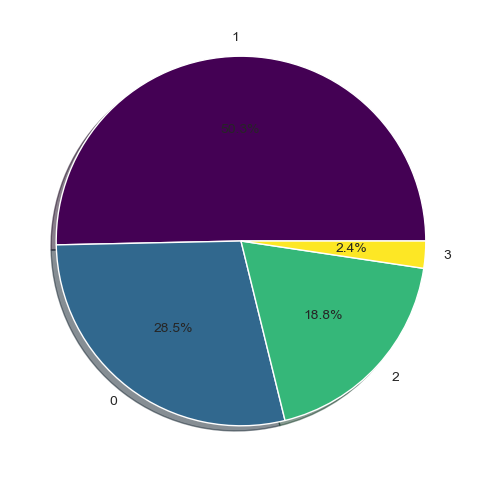

In [80]:
df["total_children"].value_counts().plot(kind="pie", cmap ="viridis" ,autopct="%1.1f%%",shadow=True, figsize=(6,6))
plt.ylabel("");

In [81]:
df["family_size"] = df["total_children"] + df["marital_status"].replace({"Single": 1, "Relationship":2})

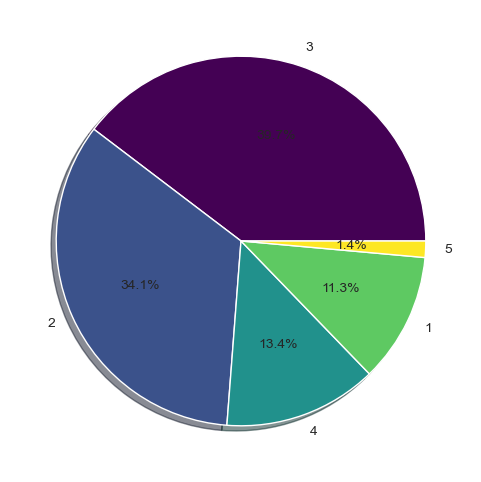

In [82]:
df["family_size"].value_counts().plot(kind="pie", cmap="viridis", autopct="%1.1f%%", shadow=True, figsize=(6,6))
plt.ylabel("");

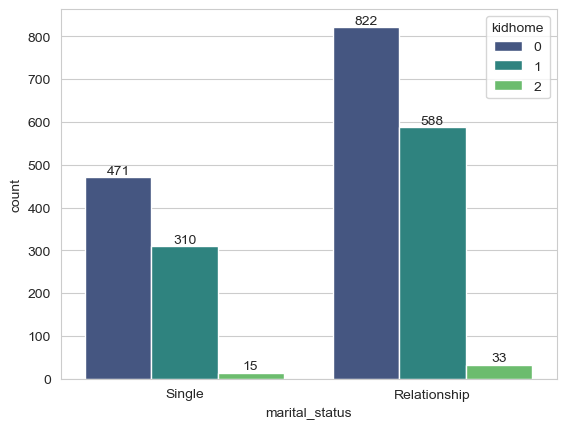

In [83]:
ax = sns.countplot(data=df, x="marital_status", hue="kidhome",palette="viridis")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

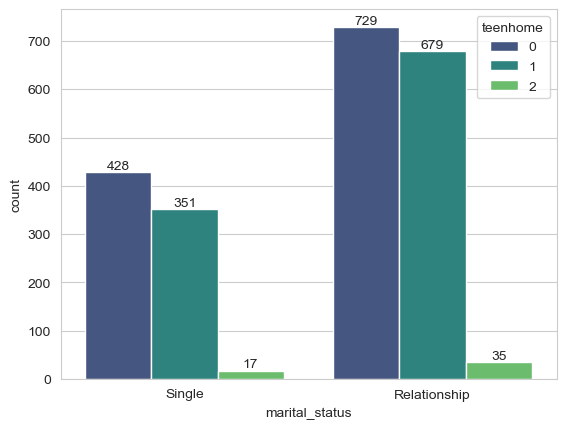

In [84]:
ax = sns.countplot(data=df, x="marital_status", hue="teenhome",palette="viridis")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

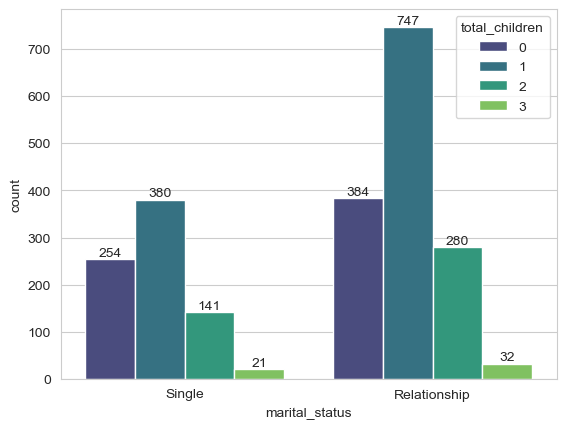

In [85]:
ax = sns.countplot(data=df, x="marital_status", hue="total_children",palette="viridis")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')

plt.show()

### year_birth 

In [86]:
df.dt_customer.max()

'2014-06-29'

In [87]:
df["age"] = 2015 - df["year_birth"]

In [88]:
df[["age", "year_birth"]] 

age  year_birth
0      58        1957
1      61        1954
2      50        1965
3      31        1984
4      34        1981
...   ...         ...
2235   48        1967
2236   69        1946
2237   34        1981
2238   59        1956
2239   61        1954

[2239 rows x 2 columns]

In [89]:
df.drop(columns=["year_birth"], inplace=True)

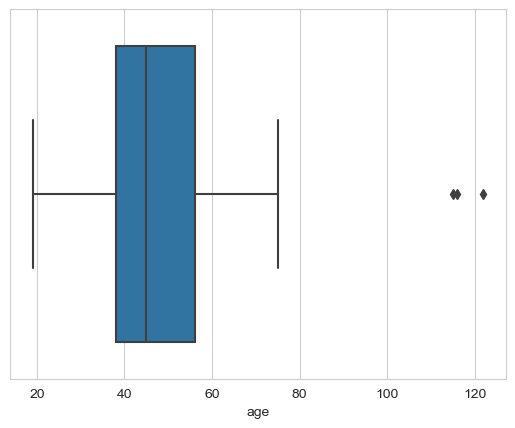

In [90]:
sns.boxplot(data=df, x="age");

In [91]:
df = df[df["age"]<100]

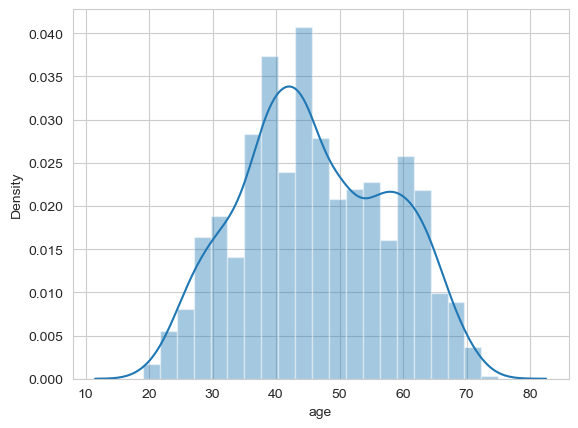

In [92]:
sns.distplot(df["age"]);

### dt_customer 

In [93]:
df["dt_customer"] = pd.to_datetime(df.dt_customer)

In [94]:
last_date = pd.to_datetime('2014-12-31')

In [95]:
df["days_since_enrollment"] = (last_date - df['dt_customer']).dt.days

In [96]:
df["days_since_enrollment"].value_counts().sort_index()

days_since_enrollment
185    2
186    3
187    3
188    4
189    5
      ..
880    5
881    3
882    4
883    1
884    1
Name: count, Length: 663, dtype: int64

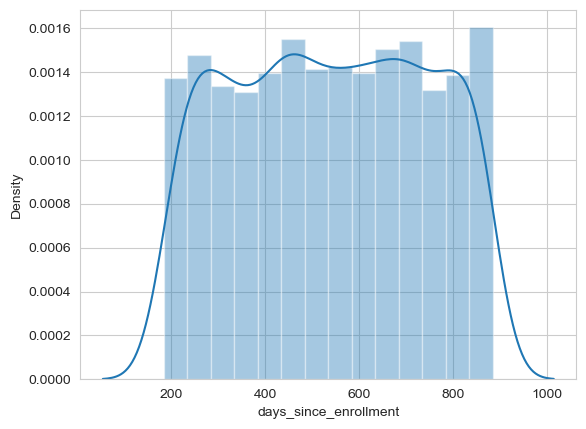

In [97]:
sns.distplot(df["days_since_enrollment"]);

In [98]:
df.drop(columns=["dt_customer"], inplace=True)

### recency 

In [99]:
df["recency"].value_counts().sort_index()

recency
0     28
1     24
2     28
3     29
4     27
      ..
95    19
96    25
97    20
98    22
99    16
Name: count, Length: 100, dtype: int64

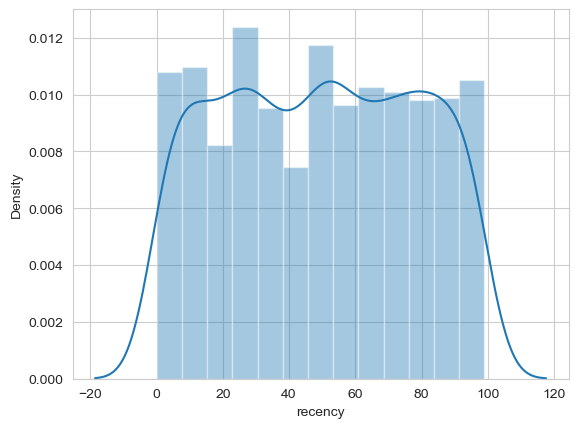

In [100]:
sns.distplot(df["recency"]);

### acceptedcmp1 & acceptedcmp2 & acceptedcmp3 & acceptedcmp4 & acceptedcmp5 

In [101]:
df["total_acceptedcmp"] = df["acceptedcmp1"] + df["acceptedcmp2"] + df["acceptedcmp3"] + df["acceptedcmp4"] + df["acceptedcmp5"]

In [102]:
df["total_acceptedcmp"].value_counts() 

total_acceptedcmp
0    1774
1     324
2      83
3      44
4      11
Name: count, dtype: int64

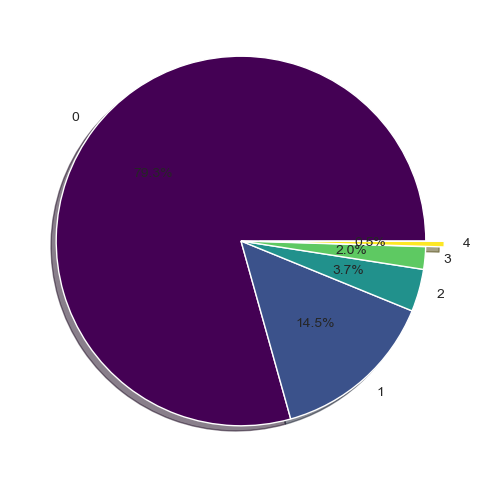

In [103]:
df["total_acceptedcmp"].value_counts().plot(kind="pie", autopct="%1.1f%%",cmap="viridis", explode=(0, 0, 0, 0, 0.1), shadow=True, figsize=(6,6))
plt.ylabel("");

### mntwines & mntfruits & mntmeatproducts & mntfishproducts & mntsweetproducts & mntgoldprods  

In [104]:
df["spent"] = df["mntwines"] + df["mntfruits"] + df["mntmeatproducts"] + df["mntfishproducts"] + df["mntsweetproducts"] + df["mntgoldprods"]

In [105]:
df["spent"].value_counts()

spent
46      19
22      17
57      16
44      15
55      15
        ..
108      1
1493     1
936      1
528      1
843      1
Name: count, Length: 1054, dtype: int64

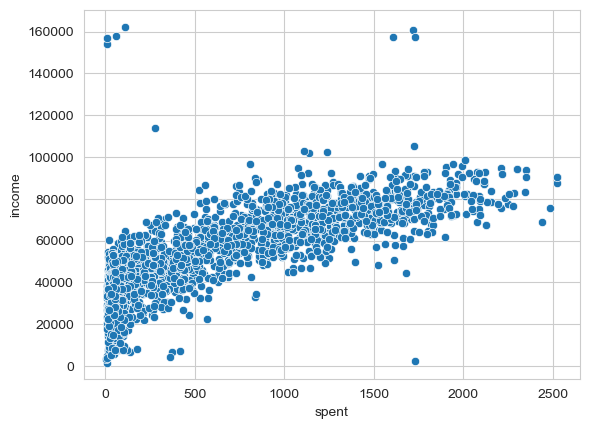

In [106]:
sns.scatterplot(data=df, x="spent", y="income");

### numdealspurchases & numwebpurchases & numcatalogpurchases & numstorepurchases  

In [107]:
df["numdealspurchases"].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  0,  6,  9, 12,  8, 10, 13, 11],
      dtype=int64)

In [108]:
df["numwebpurchases"].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [109]:
df["numcatalogpurchases"].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [110]:
df["numstorepurchases"].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

In [111]:
df['numtotalpurchases'] = df['numwebpurchases'] + df['numcatalogpurchases'] + df['numstorepurchases'] + df['numdealspurchases']
df['numtotalpurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

### numwebvisitsmonth 

In [112]:
df["numwebvisitsmonth"].value_counts()

numwebvisitsmonth
7     393
8     342
6     339
5     280
4     217
3     205
2     202
1     152
9      83
0      11
20      3
10      3
14      2
19      2
17      1
13      1
Name: count, dtype: int64

In [113]:
target = df[["response"]]

In [114]:
object_df = df.select_dtypes(include="object")

In [115]:
df.drop(columns=["response"], inplace=True)

In [116]:
df1 = df.copy()

In [117]:
df.drop(columns=["complain", "acceptedcmp1", "acceptedcmp2", "acceptedcmp3", "acceptedcmp4", "acceptedcmp5"], inplace=True)

In [118]:
df1.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'income_level', 'total_children', 'family_size', 'age',
       'days_since_enrollment', 'total_acceptedcmp', 'spent',
       'numtotalpurchases'],
      dtype='object')

In [119]:
df.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'income_level',
       'total_children', 'family_size', 'age', 'days_since_enrollment',
       'total_acceptedcmp', 'spent', 'numtotalpurchases'],
      dtype='object')

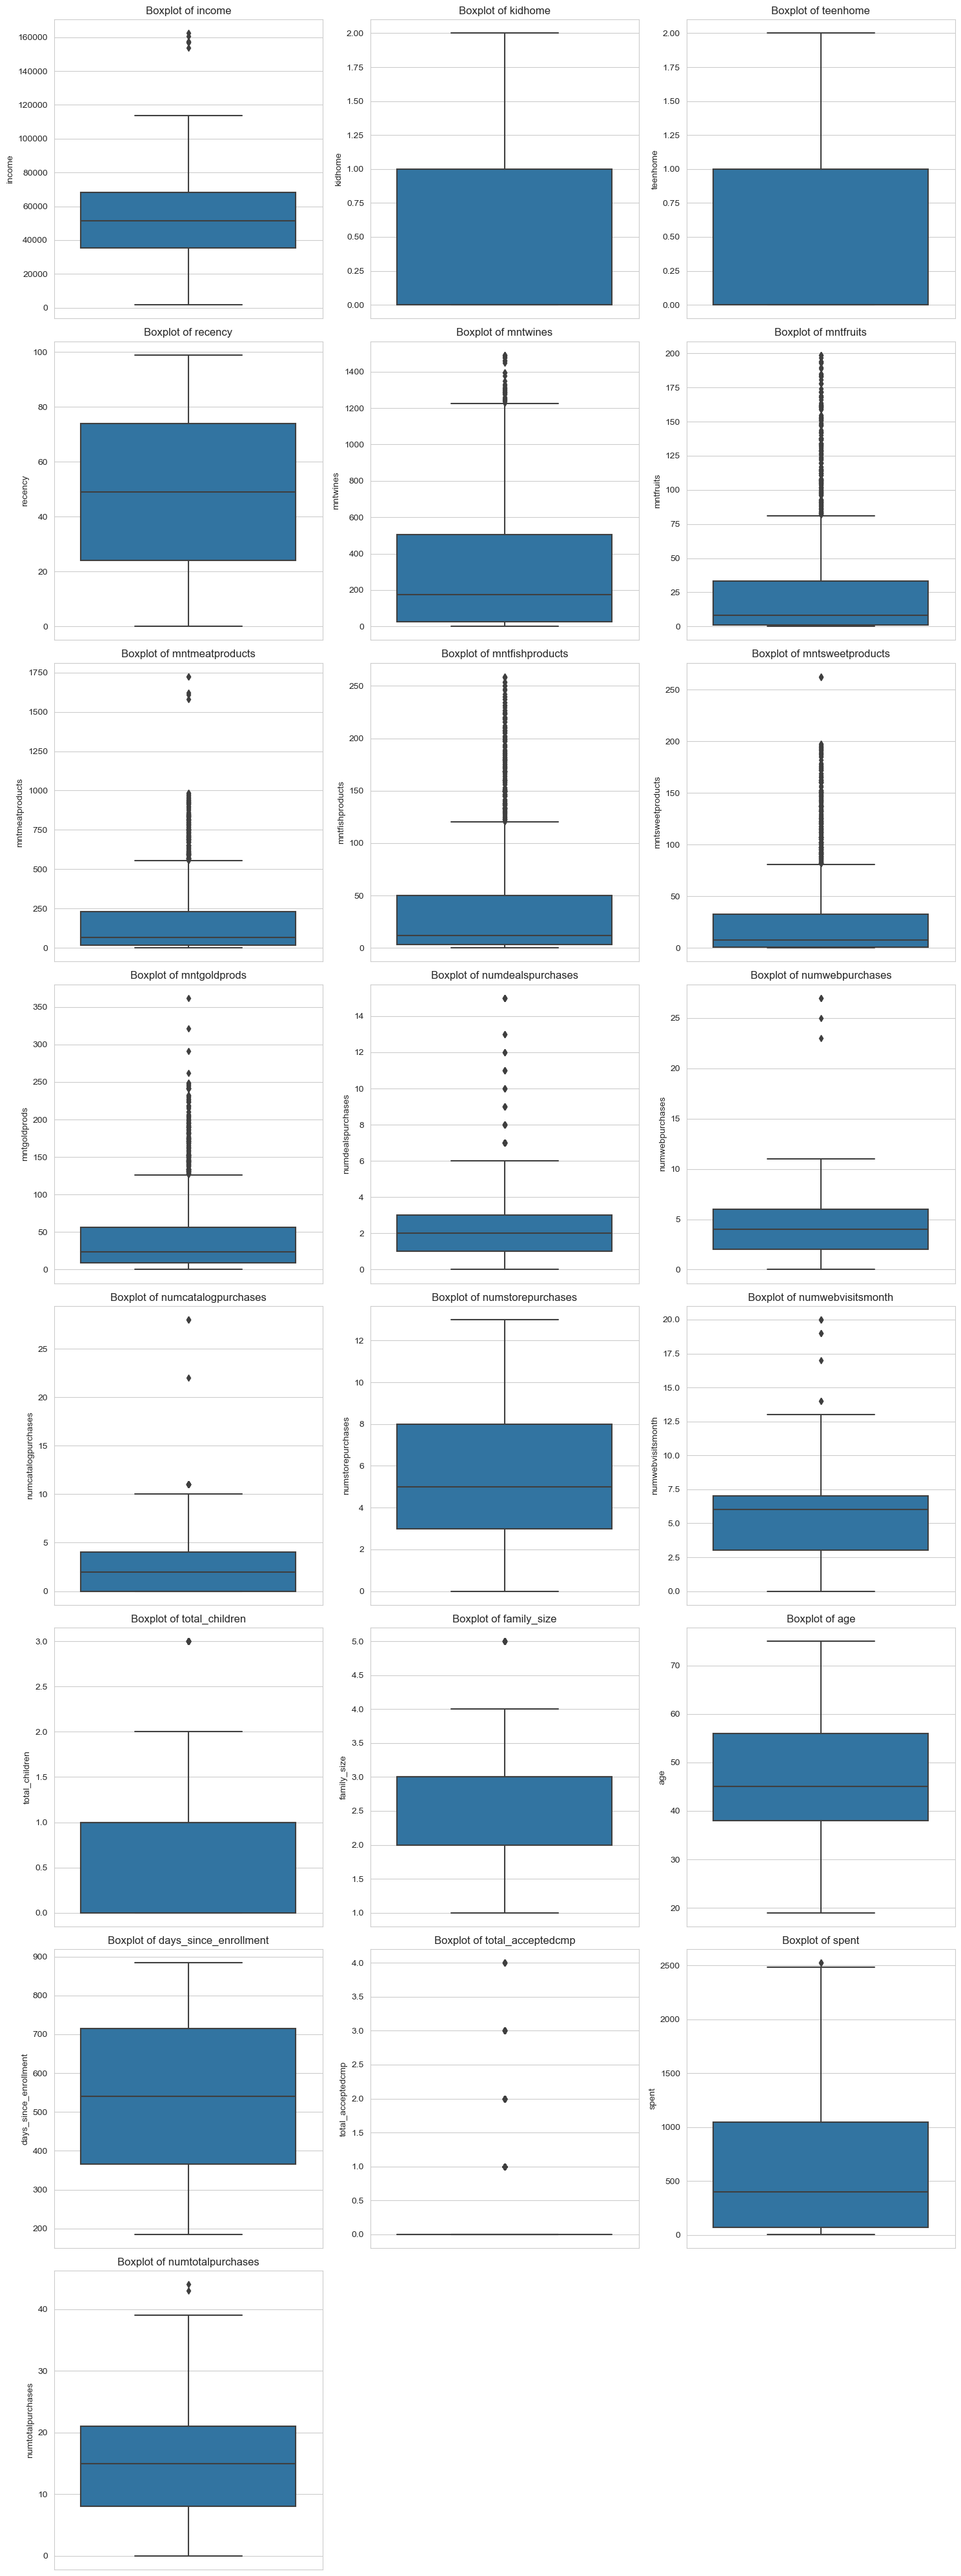

In [120]:
# Plotting box plots for all numeric columns in a 3-column layout
numeric_columns = df.select_dtypes(include=['number'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=numeric_columns, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted. 

In [121]:
numeric_df = df.select_dtypes(include="number")

In [122]:
numeric_df.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'total_children', 'family_size', 'age', 'days_since_enrollment',
       'total_acceptedcmp', 'spent', 'numtotalpurchases'],
      dtype='object')

In [123]:
numeric_df.shape

(2236, 22)

In [124]:
scaler = StandardScaler()

In [125]:
scaled_df0 = scaler.fit_transform(numeric_df)

In [126]:
scaled_df = pd.DataFrame(scaled_df0, columns=numeric_df.columns)
scaled_df.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0    0.29    -0.82     -0.93     0.31      0.98       1.55             1.68   
1   -0.26     1.03      0.91    -0.38     -0.87      -0.64            -0.71   
2    0.92    -0.82     -0.93    -0.80      0.36       0.57            -0.18   
3   -1.18     1.03     -0.93    -0.80     -0.87      -0.56            -0.65   
4    0.30     1.03     -0.93     1.55     -0.39       0.42            -0.22   

   mntfishproducts  mntsweetproducts  mntgoldprods  ...  numcatalogpurchases  \
0             2.46              1.48          0.85  ...                 2.51   
1            -0.65             -0.63         -0.73  ...                -0.57   
2             1.34             -0.15         -0.04  ...                -0.23   
3            -0.50             -0.58         -0.75  ...                -0.91   
4             0.15             -0.00         -0.56  ...                 0.12   

   numstorepurchases  numwebvisitsmonth  total_children  family_size   age  \
0              -0.55               0.69           -1.26        -1.76  1.02   
1              -1.17              -0.13            1.40         0.45  1.27   
2               1.29              -0.54           -1.26        -0.66  0.33   
3              -0.55               0.28            0.07         0.45 -1.29   
4               0.06              -0.13            0.07         0.45 -1.03   

   days_since_enrollment  total_acceptedcmp  spent  numtotalpurchases  
0                   1.53              -0.44   1.68               1.32  
1                  -1.19              -0.44  -0.96              -1.16  
2                  -0.21              -0.44   0.28               0.80  
3                  -1.06              -0.44  -0.92              -0.90  
4                  -0.95              -0.44  -0.31               0.54  

[5 rows x 22 columns]

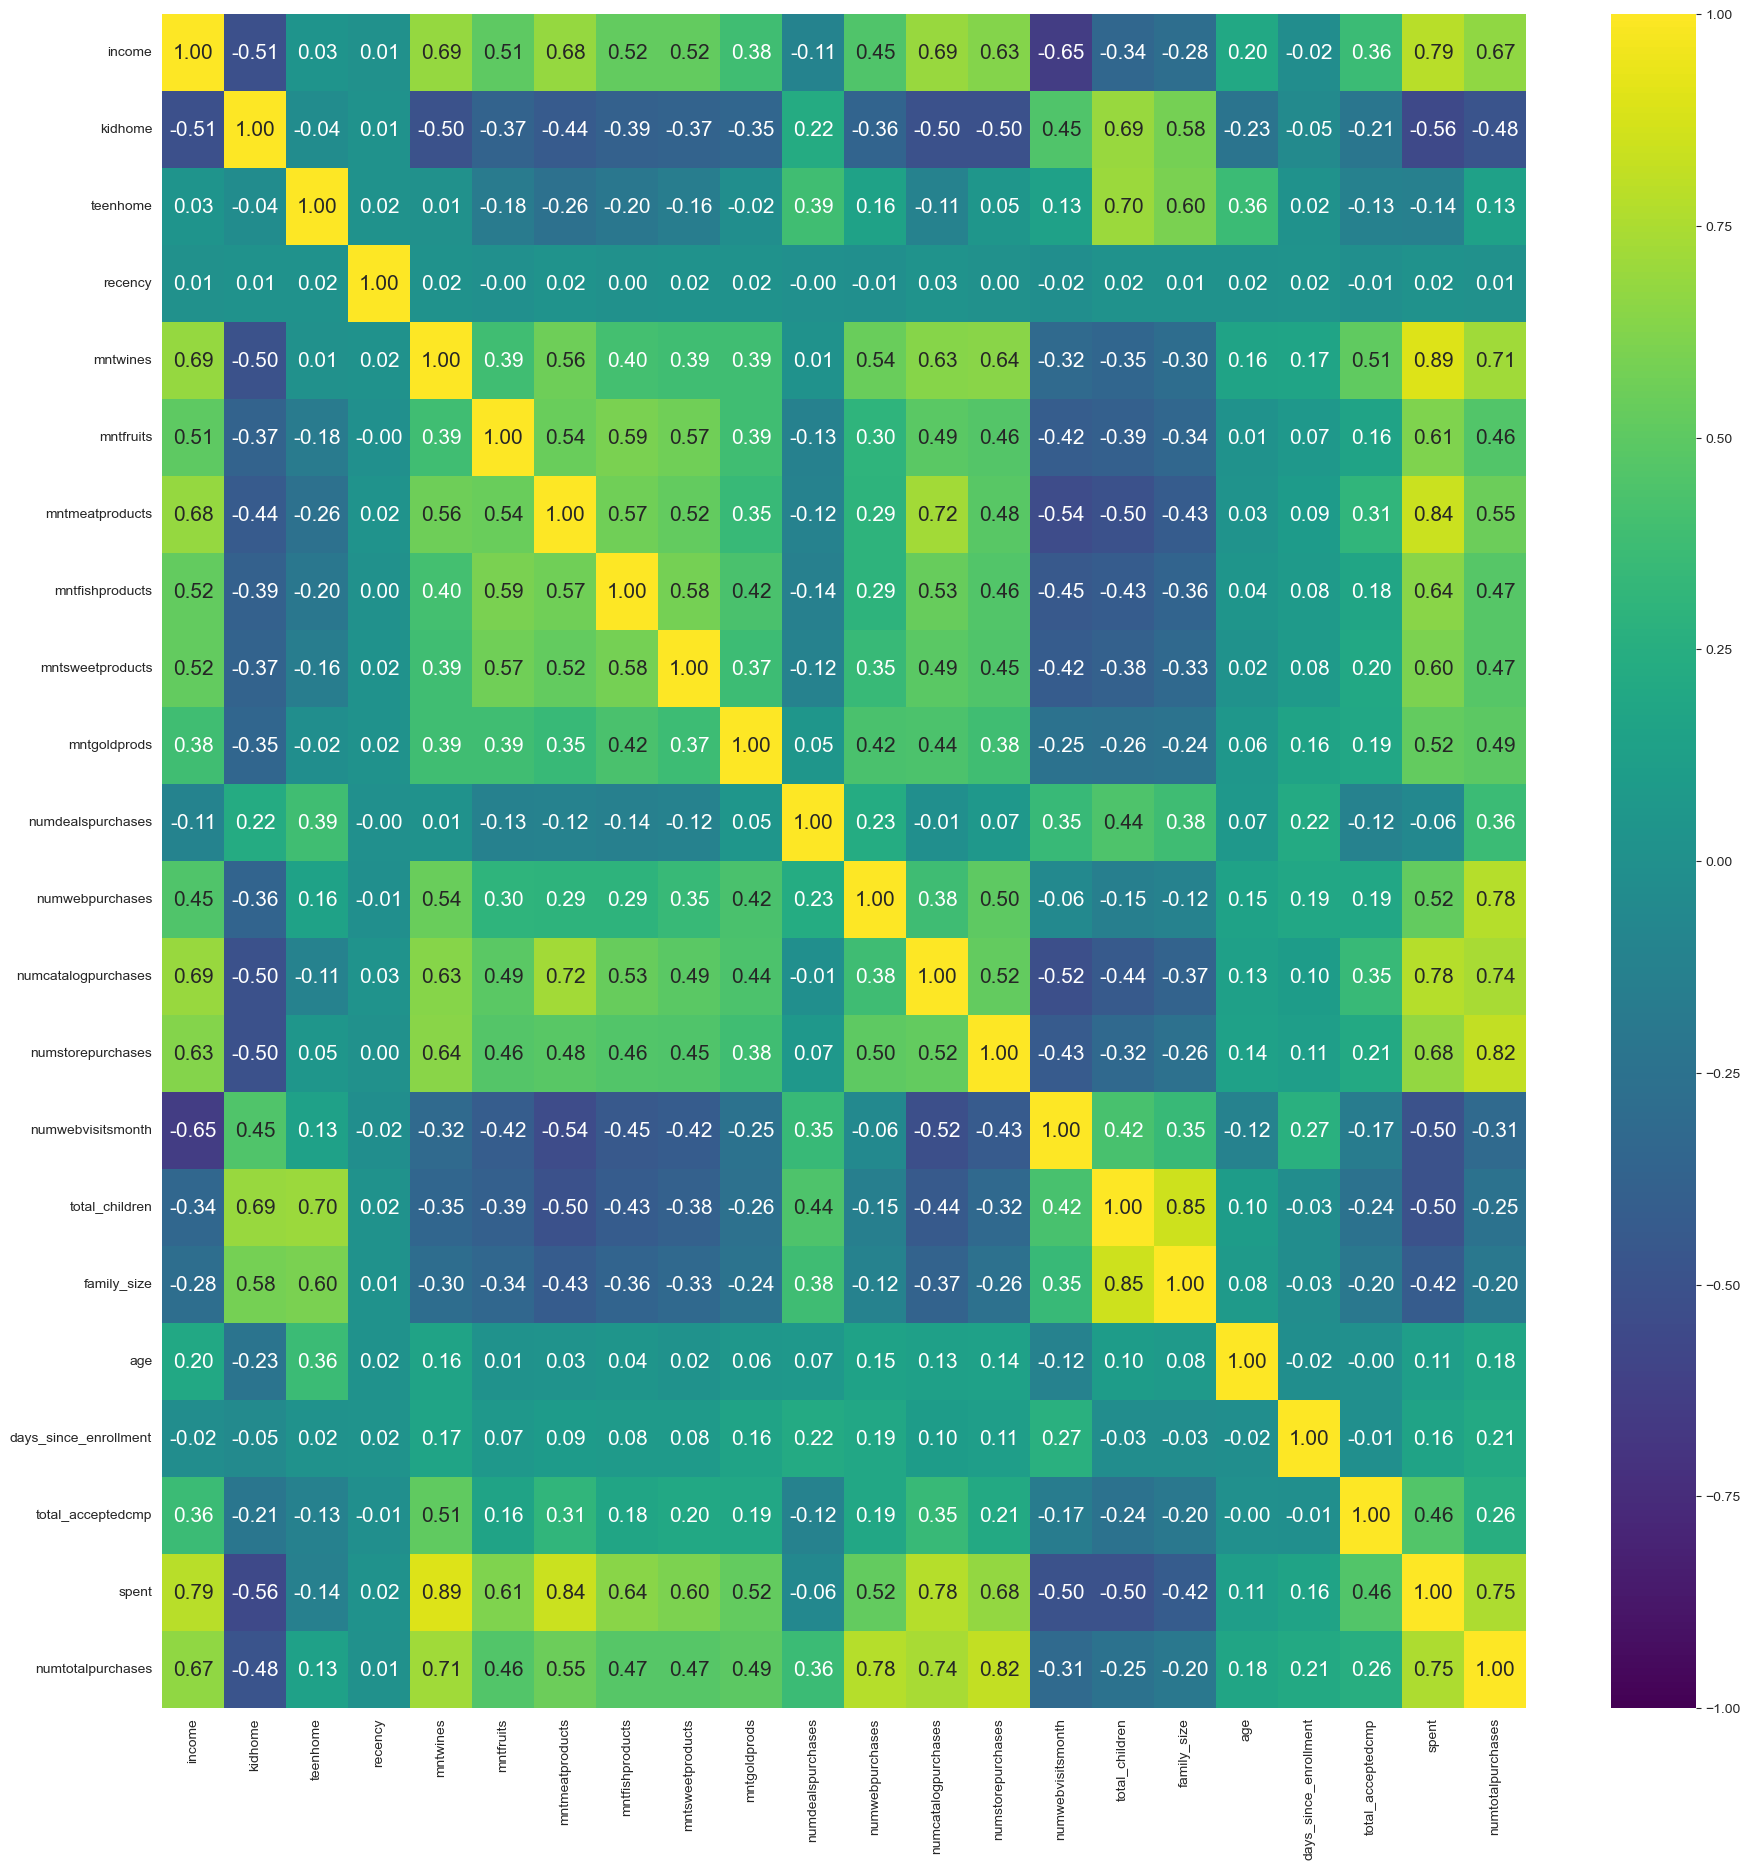

In [127]:
plt.figure(figsize=(22, 22))
sns.heatmap(scaled_df.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 15}, fmt='.2f', cmap="viridis");

In [128]:
# PCA algorithm will work much better if there are meaningful correlations between features.
# PCA also takes care of the multicollinearity issue.
# High corr with each other or features with a meaningful corr relationship are more intensely
# combined in the same component.
# In all the new componets we will achieve in PCA, more or less, all the features will surely contribute.

In [129]:
pca = PCA(n_components=3)

In [130]:
principal_components = pca.fit_transform(scaled_df)

# With the fit method, eigen vectors are determined for each component as much as
# the number of feature/rows in our data, whichever is less. With the transform method,
# the eigenvectors and the feature values of each observation are multiplied and
# added together to obtain components.
# The number of components we specify as n_componenets is returned.

In [131]:
component_df = pd.DataFrame(data=principal_components,
                           columns=["first_component", "second_component", "third_component"])
component_df

# We named our components to make them more readable.

first_component  second_component  third_component
0                4.74             -0.12             2.04
1               -3.10              0.17            -2.12
2                2.30             -0.66             0.03
3               -2.86             -1.46             0.25
4               -0.35              0.22             0.40
...               ...               ...              ...
2231             2.60              1.58             0.46
2232            -2.13              4.63            -1.46
2233             2.39             -1.62             0.31
2234             1.96              1.25            -1.76
2235            -2.57              1.86            -0.27

[2236 rows x 3 columns]

In [132]:
#Eigenvectors
pca.components_

# componenet_ returns the number of eigenvectors we specify in n_componenets.

array([[ 0.28208856, -0.23581757, -0.06487479,  0.00397879,  0.26847189,
         0.23132805,  0.27478165,  0.24043206,  0.2312761 ,  0.19350547,
        -0.04338351,  0.19098621,  0.28056835,  0.25450088, -0.20959857,
        -0.21577852, -0.18875548,  0.04502965,  0.03974734,  0.14311335,
         0.32288818,  0.27284197],
       [ 0.08026481,  0.0668134 ,  0.45722036,  0.01441277,  0.14508976,
        -0.0509698 , -0.06443298, -0.0603025 , -0.03500055,  0.0940239 ,
         0.42334074,  0.28450392,  0.0444571 ,  0.15972401,  0.1530278 ,
         0.37886344,  0.35846926,  0.20774071,  0.14911931, -0.02011966,
         0.05387174,  0.29415955],
       [-0.24243409,  0.10732673, -0.31522888, -0.0273386 ,  0.03243852,
         0.01698933, -0.01195175,  0.0157599 ,  0.01879578,  0.15406605,
         0.24913442,  0.19008111, -0.03410315, -0.02115475,  0.44109901,
        -0.15140236, -0.16212186, -0.39345092,  0.54070586,  0.00740462,
         0.03082829,  0.10960285]])

In [133]:
eigenvectors_first_component = pca.components_[0]
eigenvectors_first_component

# we draw our first eigenvector. Returns the total number of features.
# These values show how much each feature contribute to the first component we acquire.

array([ 0.28208856, -0.23581757, -0.06487479,  0.00397879,  0.26847189,
        0.23132805,  0.27478165,  0.24043206,  0.2312761 ,  0.19350547,
       -0.04338351,  0.19098621,  0.28056835,  0.25450088, -0.20959857,
       -0.21577852, -0.18875548,  0.04502965,  0.03974734,  0.14311335,
        0.32288818,  0.27284197])

In [134]:
eigenvectors_second_component = pca.components_[1]
eigenvectors_second_component

array([ 0.08026481,  0.0668134 ,  0.45722036,  0.01441277,  0.14508976,
       -0.0509698 , -0.06443298, -0.0603025 , -0.03500055,  0.0940239 ,
        0.42334074,  0.28450392,  0.0444571 ,  0.15972401,  0.1530278 ,
        0.37886344,  0.35846926,  0.20774071,  0.14911931, -0.02011966,
        0.05387174,  0.29415955])

In [135]:
eigenvectors_third_component = pca.components_[2]
eigenvectors_third_component

array([-0.24243409,  0.10732673, -0.31522888, -0.0273386 ,  0.03243852,
        0.01698933, -0.01195175,  0.0157599 ,  0.01879578,  0.15406605,
        0.24913442,  0.19008111, -0.03410315, -0.02115475,  0.44109901,
       -0.15140236, -0.16212186, -0.39345092,  0.54070586,  0.00740462,
        0.03082829,  0.10960285])

In [136]:
scaled_df.loc[0]

# We get all feature values of the first observation in our data.

income                   0.29
kidhome                 -0.82
teenhome                -0.93
recency                  0.31
mntwines                 0.98
mntfruits                1.55
mntmeatproducts          1.68
mntfishproducts          2.46
mntsweetproducts         1.48
mntgoldprods             0.85
numdealspurchases        0.35
numwebpurchases          1.41
numcatalogpurchases      2.51
numstorepurchases       -0.55
numwebvisitsmonth        0.69
total_children          -1.26
family_size             -1.76
age                      1.02
days_since_enrollment    1.53
total_acceptedcmp       -0.44
spent                    1.68
numtotalpurchases        1.32
Name: 0, dtype: float64

In [137]:
(scaled_df.loc[0] * eigenvectors_first_component).sum()

# When we multiply the eigen vector of the first component
# and all the feature values of the first observation,
# we get the first component value for the observation in the first line.

4.742243915811811

In [138]:
(scaled_df.loc[0] * eigenvectors_second_component).sum()

# When we multiply the eigen vector of the second component
# and all the feature values of the first observation,
# we get the second component value for the observation in the first line.

-0.12355433725807535

In [139]:
(scaled_df.loc[0] * eigenvectors_third_component).sum()

# When we multiply the eigen vector of the second component
# and all the feature values of the first observation,
# we get the second component value for the observation in the first line.

2.044494575843477

In [140]:
component_df.head()

first_component  second_component  third_component
0             4.74             -0.12             2.04
1            -3.10              0.17            -2.12
2             2.30             -0.66             0.03
3            -2.86             -1.46             0.25
4            -0.35              0.22             0.40

In [141]:
pca.explained_variance_  #Eigenvalues

# The explained_variance_ code shows us the eigenvalues that is
# how much information the relevant components carry on it.
# A component with a large value means it carries more information.

array([8.55515266, 2.8962026 , 1.5073264 ])

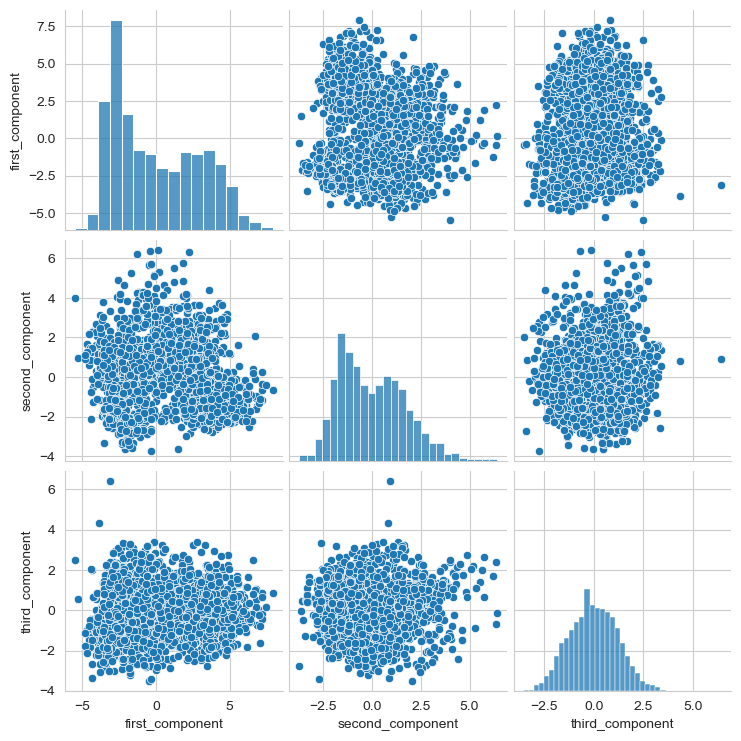

In [142]:
sns.pairplot(component_df);

# When we look at the distribution of our new components via pairplot,
# we can see that there is no significant relationship between them.

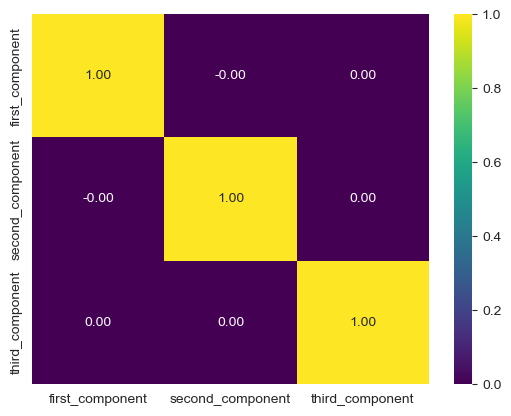

In [143]:
sns.heatmap(component_df.corr(), annot=True, fmt=".2f", cmap="viridis");

# Their correlations also 0.

In [144]:
pca.explained_variance_ratio_

# Shows how much of the information they carry on the whole data proportionally.

array([0.38869666, 0.1315867 , 0.06848419])

In [145]:
pca.explained_variance_ratio_.cumsum()

# shows cumulative totals.

array([0.38869666, 0.52028336, 0.58876755])

Text(0, 0.5, 'Variance Ratio')

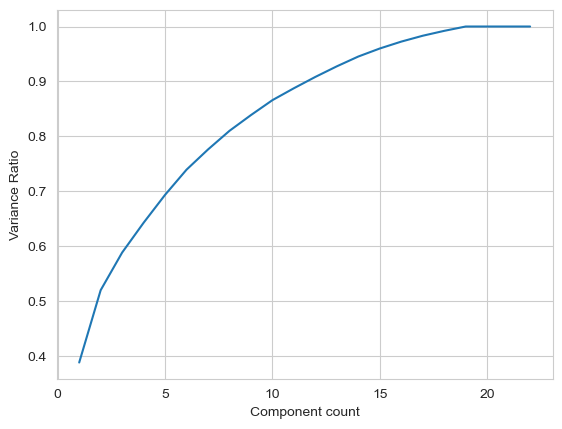

In [146]:
x = range(1,23)
pca = PCA().fit(scaled_df)
plt.plot(x, pca.explained_variance_ratio_.cumsum())
# plt.plot rearranges PCA's n_components hyper_parameter to n_components=x
# for each x value and calculates how much information the components carry
# on them in total for all values x will take up to 1, 2, 3 .......30
# Returns cumulative totals with representation.
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")

# Compenent number corresponding to the range of 75%-90% is preferred as best practice.
# However, for unsupervised models, if there are significant corr relationships between
# the features in your data, rates below 75%-90% can be tried and the results can be checked.
# For supervised models, if there are significant corr relationships between features or
# if you have very strong features, rates below 75%-90% can be tried and the results can be checked.

In [147]:
pca = PCA(n_components=22).fit(scaled_df)

# Since the number of features in our data is less,
# the maximum number of components we can obtain cannot
# exceed the number of features in our data.
# For this reason, we set n_componenets= 23.

In [148]:
my_dict = {"explained_variance": pca.explained_variance_,
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}

In [149]:
df_ev = pd.DataFrame(my_dict, index=range(1,23))
df_ev
# we can see the explained_variance, explained_variance_ratio and cumulative sums of each component on a single df.

explained_variance  explained_variance_ratio  \
1                 8.56                      0.39   
2                 2.90                      0.13   
3                 1.51                      0.07   
4                 1.19                      0.05   
5                 1.12                      0.05   
6                 1.01                      0.05   
7                 0.81                      0.04   
8                 0.75                      0.03   
9                 0.63                      0.03   
10                0.60                      0.03   
11                0.48                      0.02   
12                0.45                      0.02   
13                0.42                      0.02   
14                0.39                      0.02   
15                0.32                      0.01   
16                0.28                      0.01   
17                0.24                      0.01   
18                0.20                      0.01   
19                0.17                      0.01   
20                0.00                      0.00   
21                0.00                      0.00   
22                0.00                      0.00   

    cumsum_explained_variance_ratio  
1                              0.39  
2                              0.52  
3                              0.59  
4                              0.64  
5                              0.69  
6                              0.74  
7                              0.78  
8                              0.81  
9                              0.84  
10                             0.87  
11                             0.89  
12                             0.91  
13                             0.93  
14                             0.95  
15                             0.96  
16                             0.97  
17                             0.98  
18                             0.99  
19                                1  
20                                1  
21                                1  
22                                1

In [150]:
df_ev.explained_variance.sum()
# The sum of explained_variance of all components is always equal to the total number of features.

22.009843400447433

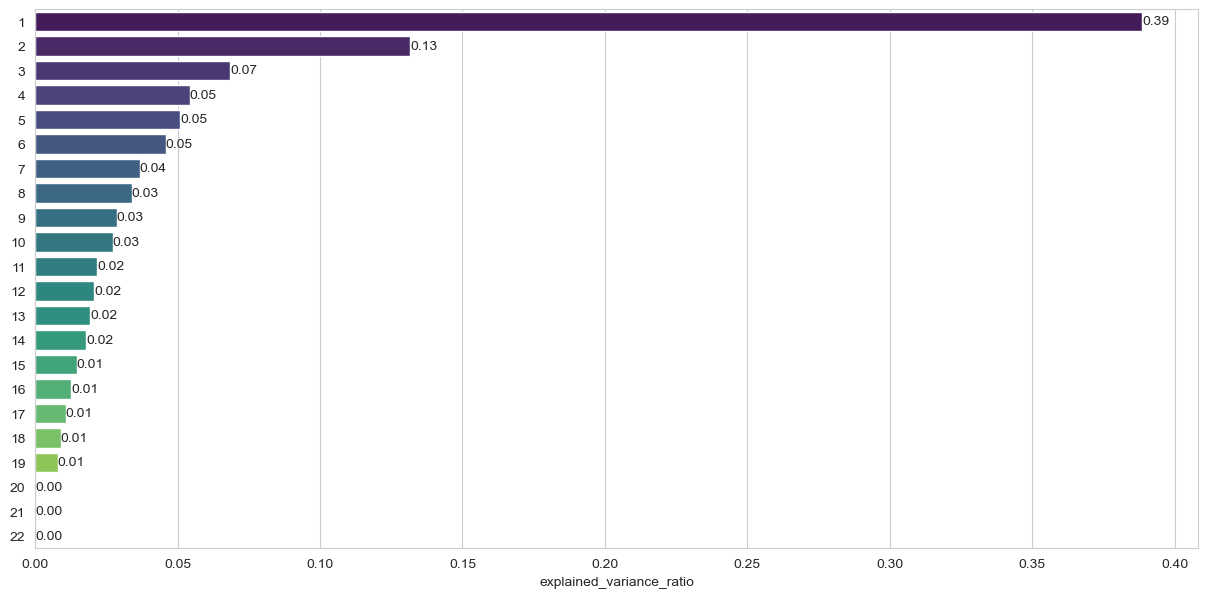

In [151]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(y=df_ev.index, 
                 x=df_ev.explained_variance_ratio,
                orient='horizontal',
                palette="viridis")
ax.bar_label(ax.containers[0], fmt="%.2f");

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clustering

### Create a new dataset with numeric features

In [152]:
numeric_df.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   mntfishproducts  mntsweetproducts  mntgoldprods  ...  numcatalogpurchases  \
0              172                88            88  ...                   10   
1                2                 1             6  ...                    1   
2              111                21            42  ...                    2   
3               10                 3             5  ...                    0   
4               46                27            15  ...                    3   

   numstorepurchases  numwebvisitsmonth  total_children  family_size  age  \
0                  4                  7               0            1   58   
1                  2                  5               2            3   61   
2                 10                  4               0            2   50   
3                  4                  6               1            3   31   
4                  6                  5               1            3   34   

   days_since_enrollment  total_acceptedcmp  spent  numtotalpurchases  
0                    848                  0   1617                 25  
1                    298                  0     27                  6  
2                    497                  0    776                 21  
3                    324                  0     53                  8  
4                    346                  0    422                 19  

[5 rows x 22 columns]

In [153]:
numeric_df2 = numeric_df.copy()

In [154]:
scaler = StandardScaler()

X = scaler.fit_transform(numeric_df)

scaled_X = pd.DataFrame(X, columns=numeric_df.columns)

In [155]:
scaled_X.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0    0.29    -0.82     -0.93     0.31      0.98       1.55             1.68   
1   -0.26     1.03      0.91    -0.38     -0.87      -0.64            -0.71   
2    0.92    -0.82     -0.93    -0.80      0.36       0.57            -0.18   
3   -1.18     1.03     -0.93    -0.80     -0.87      -0.56            -0.65   
4    0.30     1.03     -0.93     1.55     -0.39       0.42            -0.22   

   mntfishproducts  mntsweetproducts  mntgoldprods  ...  numcatalogpurchases  \
0             2.46              1.48          0.85  ...                 2.51   
1            -0.65             -0.63         -0.73  ...                -0.57   
2             1.34             -0.15         -0.04  ...                -0.23   
3            -0.50             -0.58         -0.75  ...                -0.91   
4             0.15             -0.00         -0.56  ...                 0.12   

   numstorepurchases  numwebvisitsmonth  total_children  family_size   age  \
0              -0.55               0.69           -1.26        -1.76  1.02   
1              -1.17              -0.13            1.40         0.45  1.27   
2               1.29              -0.54           -1.26        -0.66  0.33   
3              -0.55               0.28            0.07         0.45 -1.29   
4               0.06              -0.13            0.07         0.45 -1.03   

   days_since_enrollment  total_acceptedcmp  spent  numtotalpurchases  
0                   1.53              -0.44   1.68               1.32  
1                  -1.19              -0.44  -0.96              -1.16  
2                  -0.21              -0.44   0.28               0.80  
3                  -1.06              -0.44  -0.92              -0.90  
4                  -0.95              -0.44  -0.31               0.54  

[5 rows x 22 columns]

In [156]:
scaled_X.shape

(2236, 22)

#### Hopkins test 

In [157]:
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [158]:
# hopkins : A statistical method that measures data clustering tendency.
# More than 0.5 is prone to clustering.

In [159]:
hopkins(scaled_X)

0.8330672039279595

In [160]:
hopkins(scaled_X,1)

0.8471800191458726

#### Determine optimal number of clusters

### inertia

In [161]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

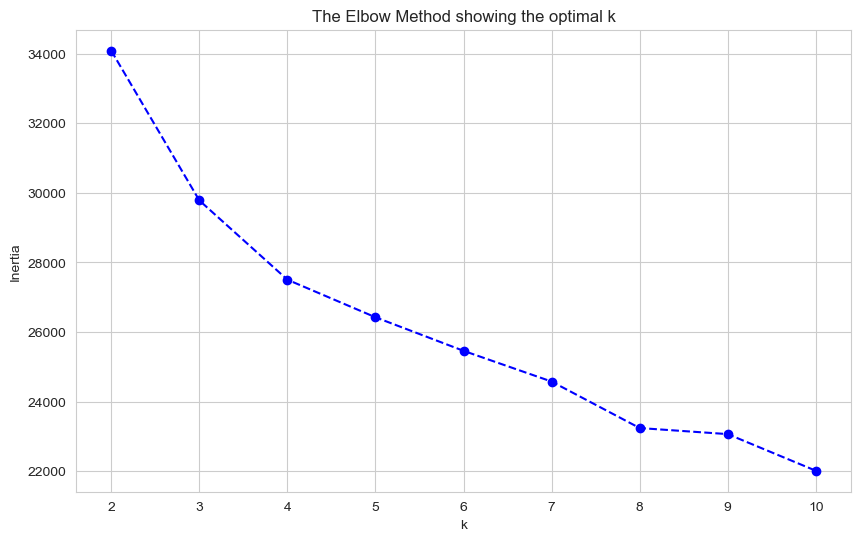

In [162]:
elbow_vis(scaled_X)

### distortion

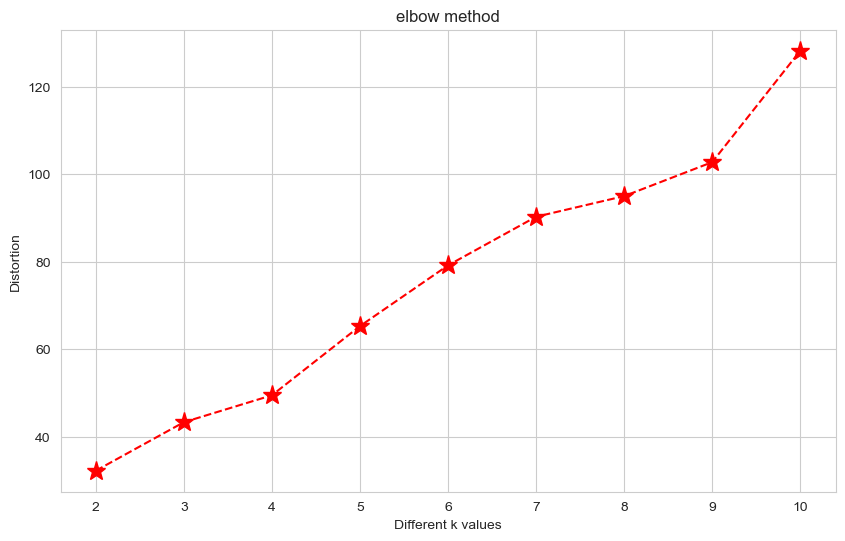

In [163]:
elbow_vis(scaled_X, inertia=False)

### silhoutte score

In [164]:
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [165]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(scaled_X)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2962632315344656
For n_clusters=3, the silhouette score is 0.2273641338207423
For n_clusters=4, the silhouette score is 0.1678117420004763
For n_clusters=5, the silhouette score is 0.15523042367073603
For n_clusters=6, the silhouette score is 0.15640438726021894
For n_clusters=7, the silhouette score is 0.15126102757501206
For n_clusters=8, the silhouette score is 0.1575385271324735
For n_clusters=9, the silhouette score is 0.12705820817296817


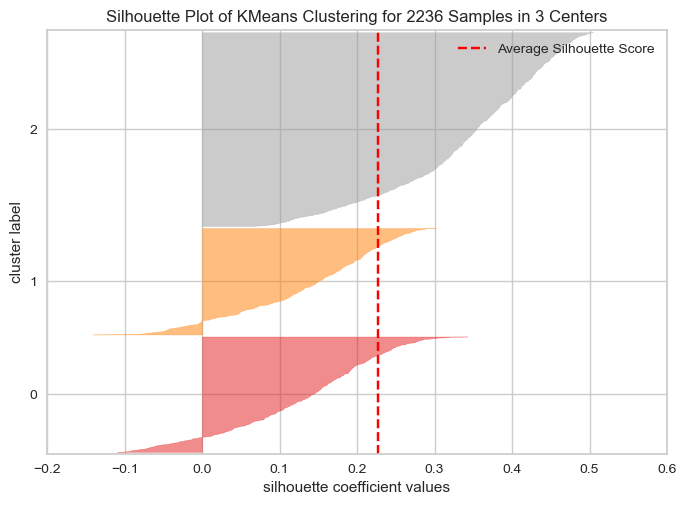

In [166]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_X)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

#### Apply K Means

In [167]:
K_means_model = KMeans(n_clusters = 3, random_state=42)
K_means_model.fit_predict(scaled_X)

array([1, 2, 1, ..., 1, 0, 2])

In [168]:
K_means_model.labels_

array([1, 2, 1, ..., 1, 0, 2])

In [169]:
clusters1 = K_means_model.labels_

In [171]:
numeric_df["clusters_kmeans1"] = clusters1

In [172]:
numeric_df.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   mntfishproducts  mntsweetproducts  mntgoldprods  ...  numstorepurchases  \
0              172                88            88  ...                  4   
1                2                 1             6  ...                  2   
2              111                21            42  ...                 10   
3               10                 3             5  ...                  4   
4               46                27            15  ...                  6   

   numwebvisitsmonth  total_children  family_size  age  days_since_enrollment  \
0                  7               0            1   58                    848   
1                  5               2            3   61                    298   
2                  4               0            2   50                    497   
3                  6               1            3   31                    324   
4                  5               1            3   34                    346   

   total_acceptedcmp  spent  numtotalpurchases  clusters_kmeans1  
0                  0   1617                 25                 1  
1                  0     27                  6                 2  
2                  0    776                 21                 1  
3                  0     53                  8                 2  
4                  0    422                 19                 0  

[5 rows x 23 columns]

#### Visualizing and Labeling All the Clusters

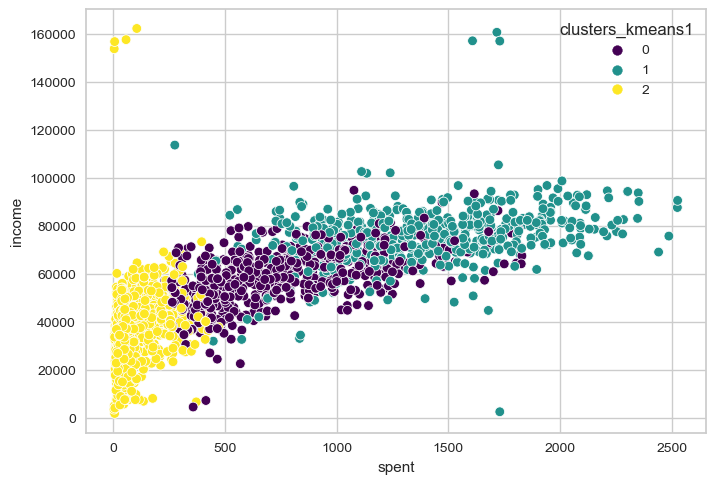

In [174]:
sns.scatterplot(data=numeric_df, x="spent", y="income", hue="clusters_kmeans1", palette ="viridis");

In [173]:
clusters = range(3)  # 0, 1, 2

cluster_means = []

# Her küme için ortalama 'income' ve 'spent' değerlerini hesapla
for cluster in clusters:
    cluster_data = numeric_df[numeric_df['clusters_kmeans1'] == cluster][['income', 'spent']].mean()
    cluster_means.append({
        'clusters_kmeans1': cluster,
        'income_mean': cluster_data['income'],
        'spent_mean': cluster_data['spent']
    })

cluster_means_df = pd.DataFrame(cluster_means)

cluster_means_df.sort_values(by = "income_mean")

clusters_kmeans1  income_mean  spent_mean
2                 2    35,169.88       97.55
0                 0    58,228.51      745.32
1                 1    75,712.49    1,379.57

In [175]:
numeric_df["labels_kmeans1"] = numeric_df["clusters_kmeans1"].map({
    0: "gold",
    1: "diamond",
    2: "silver"
})
numeric_df.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   mntfishproducts  mntsweetproducts  mntgoldprods  ...  numwebvisitsmonth  \
0              172                88            88  ...                  7   
1                2                 1             6  ...                  5   
2              111                21            42  ...                  4   
3               10                 3             5  ...                  6   
4               46                27            15  ...                  5   

   total_children  family_size  age  days_since_enrollment  total_acceptedcmp  \
0               0            1   58                    848                  0   
1               2            3   61                    298                  0   
2               0            2   50                    497                  0   
3               1            3   31                    324                  0   
4               1            3   34                    346                  0   

   spent  numtotalpurchases  clusters_kmeans1  labels_kmeans1  
0   1617                 25                 1         diamond  
1     27                  6                 2          silver  
2    776                 21                 1         diamond  
3     53                  8                 2          silver  
4    422                 19                 0            gold  

[5 rows x 24 columns]

### Clustering based on selected features

#### Select features from existing data

In [176]:
clus_pred = numeric_df.iloc[:,:-1].groupby("clusters_kmeans1").mean()
clus_pred

income  kidhome  teenhome  recency  mntwines  mntfruits  \
clusters_kmeans1                                                              
0                58,228.51     0.26      0.95    48.53    459.92      24.39   
1                75,712.49     0.03      0.13    49.50    611.79      67.16   
2                35,169.88     0.78      0.45    49.26     42.09       4.92   

                  mntmeatproducts  mntfishproducts  mntsweetproducts  \
clusters_kmeans1                                                       
0                          141.15            31.87             25.35   
1                          456.99            98.78             69.11   
2                           22.91             7.23                 5   

                  mntgoldprods  ...  numcatalogpurchases  numstorepurchases  \
clusters_kmeans1                ...                                           
0                        62.63  ...                 3.13               7.73   
1                        75.75  ...                 5.99               8.37   
2                        15.40  ...                 0.55               3.22   

                  numwebvisitsmonth  total_children  family_size   age  \
clusters_kmeans1                                                         
0                              5.77            1.21         2.89 50.01   
1                              2.82            0.16         1.77 46.61   
2                              6.43            1.23         2.88 43.49   

                  days_since_enrollment  total_acceptedcmp    spent  \
clusters_kmeans1                                                      
0                                597.65               0.25   745.32   
1                                537.21               0.73 1,379.57   
2                                504.54               0.09    97.55   

                  numtotalpurchases  
clusters_kmeans1                     
0                             21.17  
1                             20.73  
2                              7.90  

[3 rows x 22 columns]

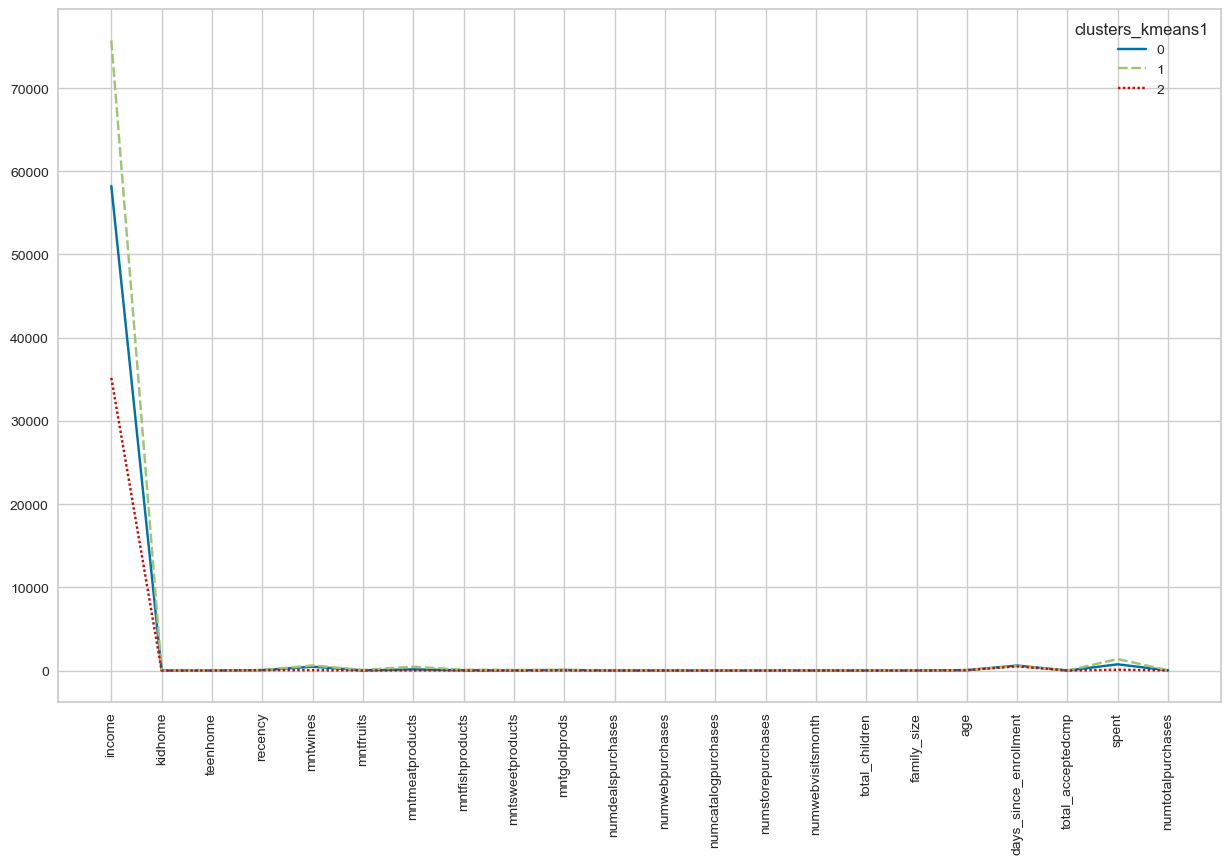

In [177]:
plt.figure(figsize=(15,9))
sns.lineplot(data = clus_pred.T)
plt.xticks(rotation=90);

In [178]:
sca = MinMaxScaler()
clus_pred2 = sca.fit_transform(clus_pred)
scaled_clus = pd.DataFrame(clus_pred2, columns=clus_pred.columns)

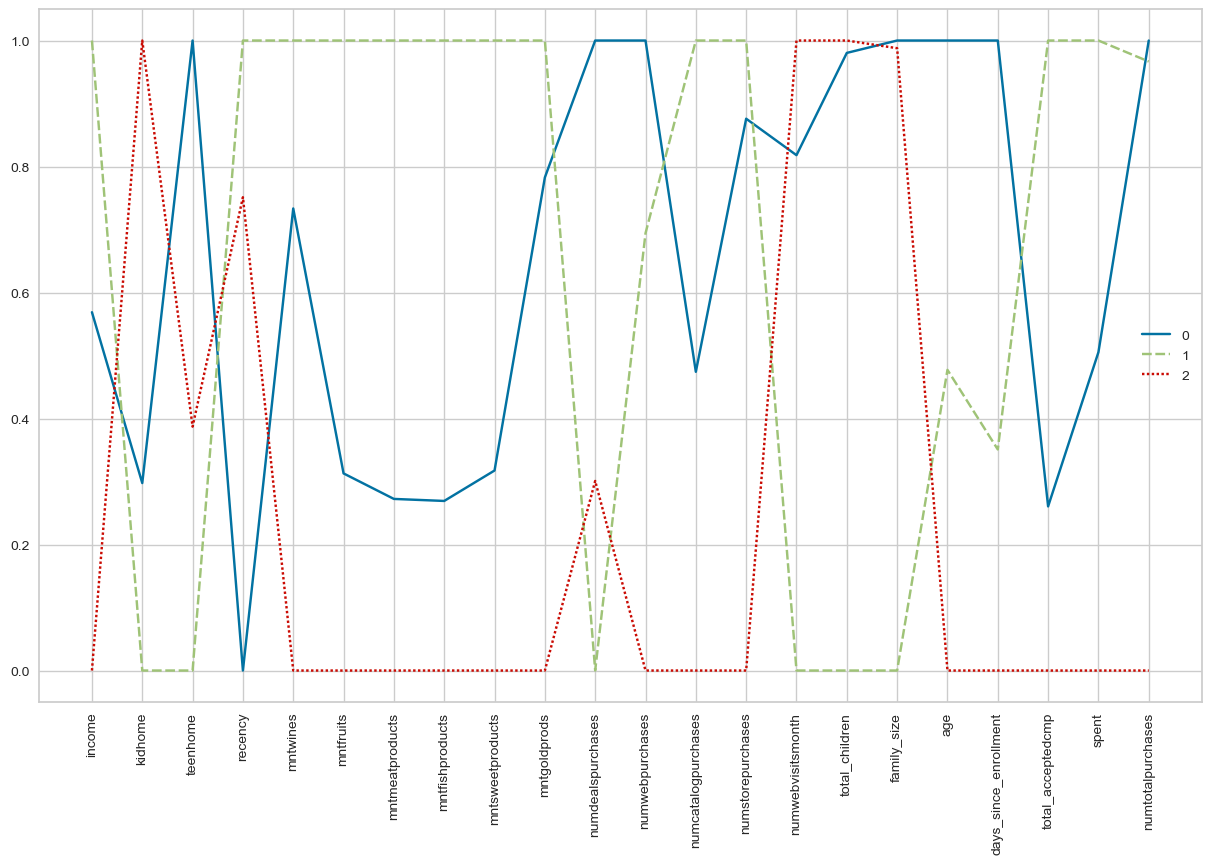

In [179]:
plt.figure(figsize=(15,9))
sns.lineplot(data = scaled_clus.T)
plt.xticks(rotation=90);

In [180]:
df2 = df[['income', 'kidhome', 'teenhome','recency', 'mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','numdealspurchases','numwebpurchases','numcatalogpurchases', 'age','days_since_enrollment','total_acceptedcmp','spent']]
df2

income  kidhome  teenhome  recency  mntwines  mntfruits  \
0      58138        0         0       58       635         88   
1      46344        1         1       38        11          1   
2      71613        0         0       26       426         49   
3      26646        1         0       26        11          4   
4      58293        1         0       94       173         43   
...      ...      ...       ...      ...       ...        ...   
2235   61223        0         1       46       709         43   
2236   64014        2         1       56       406          0   
2237   56981        0         0       91       908         48   
2238   69245        0         1        8       428         30   
2239   52869        1         1       40        84          3   

      mntmeatproducts  mntfishproducts  mntsweetproducts  numdealspurchases  \
0                 546              172                88                  3   
1                   6                2                 1                  2   
2                 127              111                21                  1   
3                  20               10                 3                  2   
4                 118               46                27                  5   
...               ...              ...               ...                ...   
2235              182               42               118                  2   
2236               30                0                 0                  7   
2237              217               32                12                  1   
2238              214               80                30                  2   
2239               61                2                 1                  3   

      numwebpurchases  numcatalogpurchases  age  days_since_enrollment  \
0                   8                   10   58                    848   
1                   1                    1   61                    298   
2                   8                    2   50                    497   
3                   2                    0   31                    324   
4                   5                    3   34                    346   
...               ...                  ...  ...                    ...   
2235                9                    3   48                    566   
2236                8                    2   69                    204   
2237                2                    3   34                    340   
2238                6                    5   59                    341   
2239                3                    1   61                    807   

      total_acceptedcmp  spent  
0                     0   1617  
1                     0     27  
2                     0    776  
3                     0     53  
4                     0    422  
...                 ...    ...  
2235                  0   1341  
2236                  1    444  
2237                  1   1241  
2238                  0    843  
2239                  0    172  

[2236 rows x 16 columns]

In [181]:
scaler = StandardScaler()

In [182]:
scaled_df2 = scaler.fit_transform(df2)
scaled_df2

array([[ 0.28840849, -0.82493893, -0.93061534, ...,  1.52979289,
        -0.43893256,  1.6801763 ],
       [-0.26247633,  1.03262748,  0.90597415, ..., -1.19114282,
        -0.43893256, -0.9622024 ],
       [ 0.91781097, -0.82493893, -0.93061534, ..., -0.20665881,
        -0.43893256,  0.28254077],
       ...,
       [ 0.23436629, -0.82493893, -0.93061534, ..., -0.98336227,
         1.0347209 ,  1.0553119 ],
       [ 0.80720429, -0.82493893,  0.90597415, ..., -0.97841512,
        -0.43893256,  0.39388629],
       [ 0.04229927,  1.03262748,  0.90597415, ...,  1.3269595 ,
        -0.43893256, -0.72123076]])

In [183]:
scaled_X1 = pd.DataFrame(scaled_df2, columns = df2.columns)
scaled_X1.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0    0.29    -0.82     -0.93     0.31      0.98       1.55             1.68   
1   -0.26     1.03      0.91    -0.38     -0.87      -0.64            -0.71   
2    0.92    -0.82     -0.93    -0.80      0.36       0.57            -0.18   
3   -1.18     1.03     -0.93    -0.80     -0.87      -0.56            -0.65   
4    0.30     1.03     -0.93     1.55     -0.39       0.42            -0.22   

   mntfishproducts  mntsweetproducts  numdealspurchases  numwebpurchases  \
0             2.46              1.48               0.35             1.41   
1            -0.65             -0.63              -0.17            -1.11   
2             1.34             -0.15              -0.69             1.41   
3            -0.50             -0.58              -0.17            -0.75   
4             0.15             -0.00               1.38             0.33   

   numcatalogpurchases   age  days_since_enrollment  total_acceptedcmp  spent  
0                 2.51  1.02                   1.53              -0.44   1.68  
1                -0.57  1.27                  -1.19              -0.44  -0.96  
2                -0.23  0.33                  -0.21              -0.44   0.28  
3                -0.91 -1.29                  -1.06              -0.44  -0.92  
4                 0.12 -1.03                  -0.95              -0.44  -0.31

In [184]:
hopkins(scaled_X1, 0.05)

0.8632416001352439

In [185]:
hopkins(scaled_X1, 1)

0.8567203188857557

#### Determine optimal number of clusters for selected features

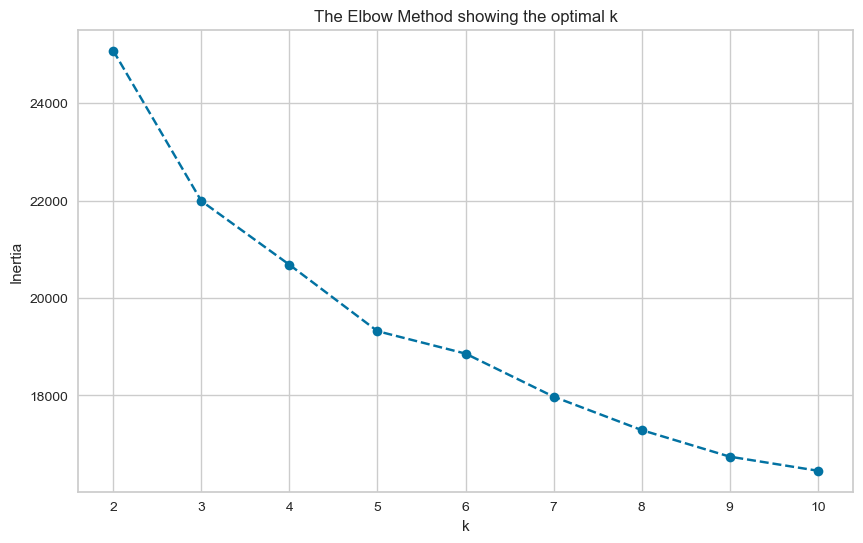

In [186]:
elbow_vis(scaled_X1)

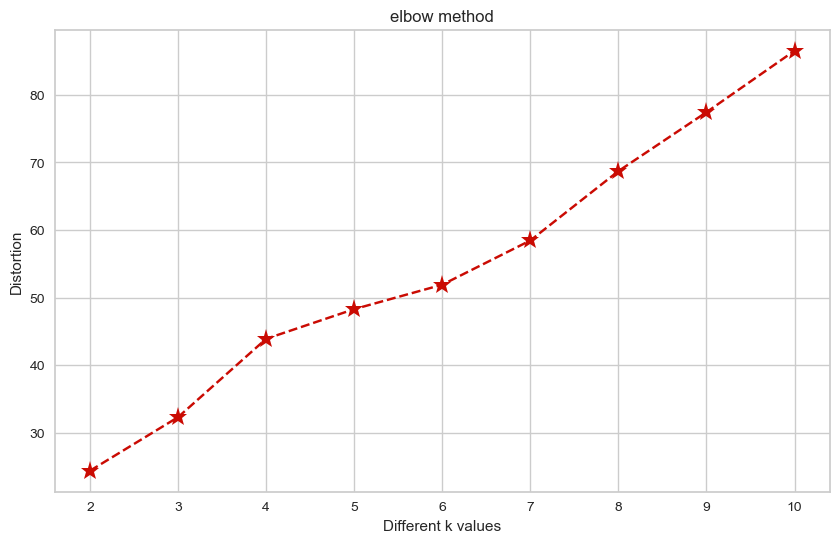

In [187]:
elbow_vis(scaled_X1, inertia = False)

In [188]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(scaled_X1)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.30013951890315327
For n_clusters=3, the silhouette score is 0.21070399450525978
For n_clusters=4, the silhouette score is 0.20313348789950517
For n_clusters=5, the silhouette score is 0.15073465621226156
For n_clusters=6, the silhouette score is 0.11847662519495063
For n_clusters=7, the silhouette score is 0.12212060832257277
For n_clusters=8, the silhouette score is 0.12146735678859444
For n_clusters=9, the silhouette score is 0.12264936882652938


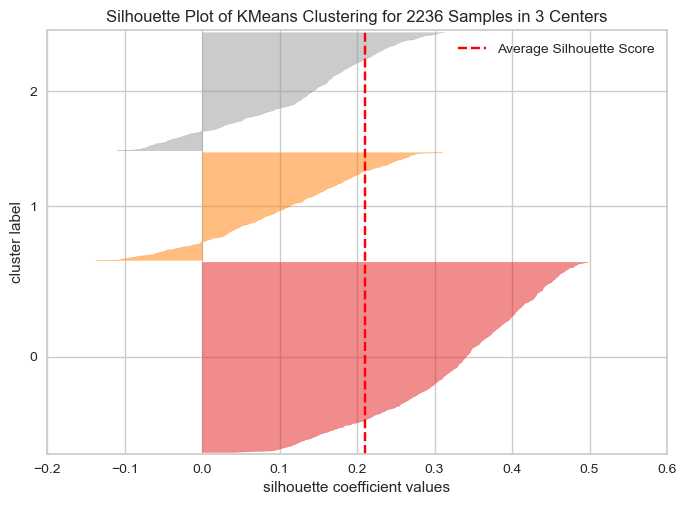

In [189]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_X1)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

#### Building the model based on the optimal number of clusters with selected features

In [190]:
K_means_model = KMeans(n_clusters = 3, random_state=42)
K_means_model.fit_predict(scaled_X1)

array([1, 0, 2, ..., 1, 2, 0])

In [191]:
K_means_model.labels_

array([1, 0, 2, ..., 1, 2, 0])

In [192]:
clusters2 = K_means_model.labels_

In [193]:
numeric_df['clusters_kmeans2'] = clusters2

In [194]:
numeric_df.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   mntfishproducts  mntsweetproducts  mntgoldprods  ...  total_children  \
0              172                88            88  ...               0   
1                2                 1             6  ...               2   
2              111                21            42  ...               0   
3               10                 3             5  ...               1   
4               46                27            15  ...               1   

   family_size  age  days_since_enrollment  total_acceptedcmp  spent  \
0            1   58                    848                  0   1617   
1            3   61                    298                  0     27   
2            2   50                    497                  0    776   
3            3   31                    324                  0     53   
4            3   34                    346                  0    422   

   numtotalpurchases  clusters_kmeans1  labels_kmeans1  clusters_kmeans2  
0                 25                 1         diamond                 1  
1                  6                 2          silver                 0  
2                 21                 1         diamond                 2  
3                  8                 2          silver                 0  
4                 19                 0            gold                 0  

[5 rows x 25 columns]

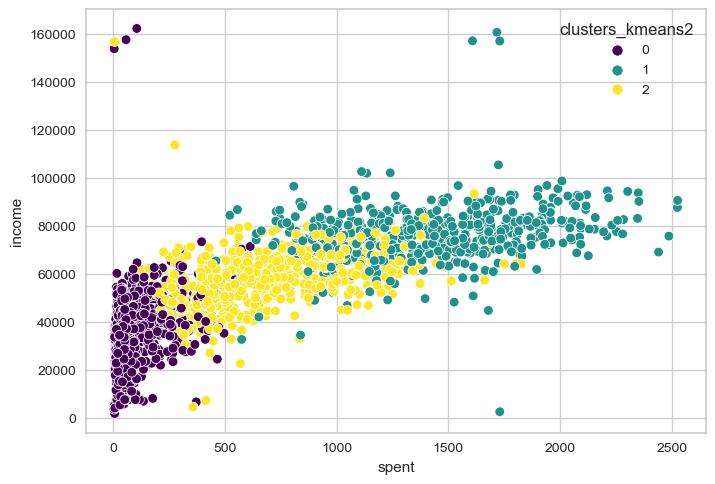

In [195]:
sns.scatterplot(data=numeric_df, x="spent", y="income", hue="clusters_kmeans2", palette = 'viridis');

In [196]:
clusters = range(3)

cluster_means = []

# Her küme için ortalama 'income' ve 'spent' değerlerini hesapla
for cluster in clusters:
    cluster_data = numeric_df[numeric_df['clusters_kmeans2'] == cluster][['income', 'spent']].mean()
    cluster_means.append({
        'clusters_kmeans2': cluster,
        'income_mean': cluster_data['income'],
        'spent_mean': cluster_data['spent']
    })

cluster_means_df = pd.DataFrame(cluster_means)

cluster_means_df.sort_values(by = 'income_mean')

clusters_kmeans2  income_mean  spent_mean
0                 0    34,728.33       98.77
2                 2    57,749.63      691.73
1                 1    76,039.39    1,407.24

In [197]:
numeric_df["labels_kmeans2"] = numeric_df["clusters_kmeans2"].map({
    0: "silver",
    1: "diamond",
    2: "gold",
})
numeric_df.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   mntfishproducts  mntsweetproducts  mntgoldprods  ...  family_size  age  \
0              172                88            88  ...            1   58   
1                2                 1             6  ...            3   61   
2              111                21            42  ...            2   50   
3               10                 3             5  ...            3   31   
4               46                27            15  ...            3   34   

   days_since_enrollment  total_acceptedcmp  spent  numtotalpurchases  \
0                    848                  0   1617                 25   
1                    298                  0     27                  6   
2                    497                  0    776                 21   
3                    324                  0     53                  8   
4                    346                  0    422                 19   

   clusters_kmeans1  labels_kmeans1  clusters_kmeans2  labels_kmeans2  
0                 1         diamond                 1         diamond  
1                 2          silver                 0          silver  
2                 1         diamond                 2            gold  
3                 2          silver                 0          silver  
4                 0            gold                 0          silver  

[5 rows x 26 columns]

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

In [198]:
df2.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   mntfishproducts  mntsweetproducts  numdealspurchases  numwebpurchases  \
0              172                88                  3                8   
1                2                 1                  2                1   
2              111                21                  1                8   
3               10                 3                  2                2   
4               46                27                  5                5   

   numcatalogpurchases  age  days_since_enrollment  total_acceptedcmp  spent  
0                   10   58                    848                  0   1617  
1                    1   61                    298                  0     27  
2                    2   50                    497                  0    776  
3                    0   31                    324                  0     53  
4                    3   34                    346                  0    422

In [199]:
scaler = StandardScaler()

HC = scaler.fit_transform(df2)

scaled_HC = pd.DataFrame(HC, columns=df2.columns)
scaled_HC

income  kidhome  teenhome  recency  mntwines  mntfruits  \
0       0.29    -0.82     -0.93     0.31      0.98       1.55   
1      -0.26     1.03      0.91    -0.38     -0.87      -0.64   
2       0.92    -0.82     -0.93    -0.80      0.36       0.57   
3      -1.18     1.03     -0.93    -0.80     -0.87      -0.56   
4       0.30     1.03     -0.93     1.55     -0.39       0.42   
...      ...      ...       ...      ...       ...        ...   
2231    0.43    -0.82      0.91    -0.11      1.20       0.42   
2232    0.56     2.89      0.91     0.24      0.30      -0.66   
2233    0.23    -0.82     -0.93     1.45      1.79       0.55   
2234    0.81    -0.82      0.91    -1.42      0.37       0.09   
2235    0.04     1.03      0.91    -0.31     -0.65      -0.59   

      mntmeatproducts  mntfishproducts  mntsweetproducts  numdealspurchases  \
0                1.68             2.46              1.48               0.35   
1               -0.71            -0.65             -0.63              -0.17   
2               -0.18             1.34             -0.15              -0.69   
3               -0.65            -0.50             -0.58              -0.17   
4               -0.22             0.15             -0.00               1.38   
...               ...              ...               ...                ...   
2231             0.07             0.08              2.20              -0.17   
2232            -0.61            -0.69             -0.66               2.42   
2233             0.22            -0.10             -0.37              -0.69   
2234             0.21             0.78              0.07              -0.17   
2235            -0.47            -0.65             -0.63               0.35   

      numwebpurchases  numcatalogpurchases   age  days_since_enrollment  \
0                1.41                 2.51  1.02                   1.53   
1               -1.11                -0.57  1.27                  -1.19   
2                1.41                -0.23  0.33                  -0.21   
3               -0.75                -0.91 -1.29                  -1.06   
4                0.33                 0.12 -1.03                  -0.95   
...               ...                  ...   ...                    ...   
2231             1.77                 0.12  0.16                   0.13   
2232             1.41                -0.23  1.96                  -1.66   
2233            -0.75                 0.12 -1.03                  -0.98   
2234             0.69                 0.80  1.10                  -0.98   
2235            -0.39                -0.57  1.27                   1.33   

      total_acceptedcmp  spent  
0                 -0.44   1.68  
1                 -0.44  -0.96  
2                 -0.44   0.28  
3                 -0.44  -0.92  
4                 -0.44  -0.31  
...                 ...    ...  
2231              -0.44   1.22  
2232               1.03  -0.27  
2233               1.03   1.06  
2234              -0.44   0.39  
2235              -0.44  -0.72  

[2236 rows x 16 columns]

In [200]:
hopkins(scaled_HC)

0.854067411581495

In [201]:
hc_ward = linkage(y=scaled_HC, method="ward")

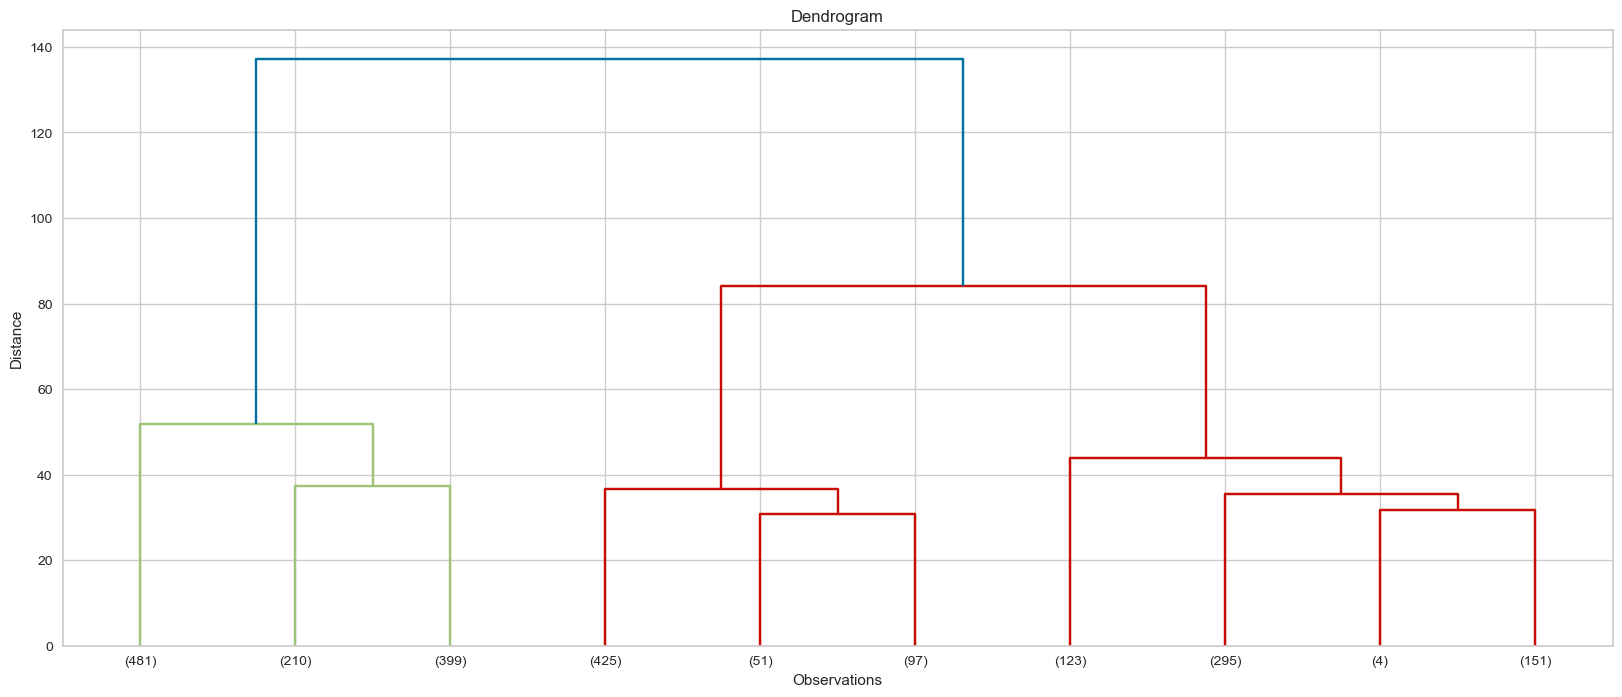

In [202]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10);

### silhouette_score

In [203]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(scaled_HC)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(scaled_HC, model.labels_)}')

Silhouette Score for 2 clusters: 0.24261676234331267
Silhouette Score for 3 clusters: 0.2039032209100378
Silhouette Score for 4 clusters: 0.12442597246605056
Silhouette Score for 5 clusters: 0.11815211373813218
Silhouette Score for 6 clusters: 0.11384592391110686
Silhouette Score for 7 clusters: 0.12061436898104358
Silhouette Score for 8 clusters: 0.11931292505192584
Silhouette Score for 9 clusters: 0.12058796238032198


### Clustering based on selected features

In [204]:
hierarchical_model = AgglomerativeClustering(n_clusters=3,    # we decide n_clusters = 3
                                 metric="euclidean",
                                 linkage="ward")
hierarchical_model.fit_predict(scaled_HC)

array([1, 0, 1, ..., 1, 2, 0], dtype=int64)

In [207]:
clusters_hc = hierarchical_model.labels_

In [208]:
numeric_df["clusters_hc"] = clusters_hc

In [209]:
numeric_df.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   mntfishproducts  mntsweetproducts  mntgoldprods  ...  age  \
0              172                88            88  ...   58   
1                2                 1             6  ...   61   
2              111                21            42  ...   50   
3               10                 3             5  ...   31   
4               46                27            15  ...   34   

   days_since_enrollment  total_acceptedcmp  spent  numtotalpurchases  \
0                    848                  0   1617                 25   
1                    298                  0     27                  6   
2                    497                  0    776                 21   
3                    324                  0     53                  8   
4                    346                  0    422                 19   

   clusters_kmeans1  labels_kmeans1  clusters_kmeans2  labels_kmeans2  \
0                 1         diamond                 1         diamond   
1                 2          silver                 0          silver   
2                 1         diamond                 2            gold   
3                 2          silver                 0          silver   
4                 0            gold                 0          silver   

   clusters_hc  
0            1  
1            0  
2            1  
3            0  
4            2  

[5 rows x 27 columns]

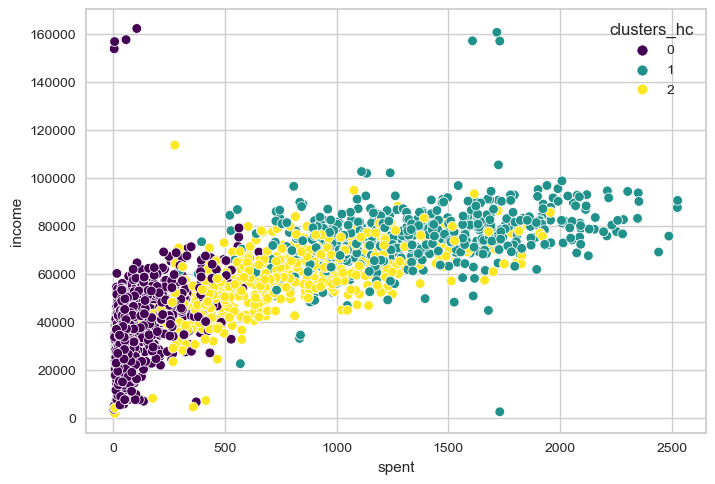

In [210]:
sns.scatterplot(data=numeric_df, x="spent", y="income", hue="clusters_hc", palette = 'viridis');

In [211]:
numeric_df["labels_hc"] = numeric_df["clusters_hc"].map({
    0: "silver",
    1: "diamond",
    2: "gold",
})
numeric_df.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   mntfishproducts  mntsweetproducts  mntgoldprods  ...  \
0              172                88            88  ...   
1                2                 1             6  ...   
2              111                21            42  ...   
3               10                 3             5  ...   
4               46                27            15  ...   

   days_since_enrollment  total_acceptedcmp  spent  numtotalpurchases  \
0                    848                  0   1617                 25   
1                    298                  0     27                  6   
2                    497                  0    776                 21   
3                    324                  0     53                  8   
4                    346                  0    422                 19   

   clusters_kmeans1  labels_kmeans1  clusters_kmeans2  labels_kmeans2  \
0                 1         diamond                 1         diamond   
1                 2          silver                 0          silver   
2                 1         diamond                 2            gold   
3                 2          silver                 0          silver   
4                 0            gold                 0          silver   

   clusters_hc  labels_hc  
0            1    diamond  
1            0     silver  
2            1    diamond  
3            0     silver  
4            2       gold  

[5 rows x 28 columns]

## Conclusion

### Clusters Analysis - Kmeans Model with feature selection  

In [212]:
numeric_df["education"] = df1["education"]
numeric_df["marital_status"] = df1["marital_status"]
numeric_df["complain"] = df1["complain"]
numeric_df["income_level"] = df["income_level"]
numeric_df["response"] = target

In [213]:
numeric_df.spent.describe()

count       2236
mean      605.99
std       601.87
min            5
25%           69
50%       396.50
75%     1,045.50
max         2525
Name: spent, dtype: float64

In [214]:
bins=[0, 69, 1046, float('inf')]
labels=["low","medium","high"]

numeric_df["spending_level"] = pd.cut(numeric_df['spent'], bins=bins, labels=labels,right=False)

In [215]:
numeric_df.head()

income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   mntfishproducts  mntsweetproducts  mntgoldprods  ...  clusters_kmeans2  \
0              172                88            88  ...                 1   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 2   
3               10                 3             5  ...                 0   
4               46                27            15  ...                 0   

   labels_kmeans2  clusters_hc  labels_hc      education  marital_status  \
0         diamond            1    diamond       Graduate          Single   
1          silver            0     silver       Graduate          Single   
2            gold            1    diamond       Graduate    Relationship   
3          silver            0     silver       Graduate    Relationship   
4          silver            2       gold  Post Graduate    Relationship   

   complain  income_level  response  spending_level  
0         0        medium         1            high  
1         0        medium         0             low  
2         0          high         0          medium  
3         0           low         0             low  
4         0        medium         0          medium  

[5 rows x 34 columns]

In [216]:
data=numeric_df.copy()

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   income                 2236 non-null   float64 
 1   kidhome                2236 non-null   int64   
 2   teenhome               2236 non-null   int64   
 3   recency                2236 non-null   int64   
 4   mntwines               2236 non-null   int64   
 5   mntfruits              2236 non-null   int64   
 6   mntmeatproducts        2236 non-null   int64   
 7   mntfishproducts        2236 non-null   int64   
 8   mntsweetproducts       2236 non-null   int64   
 9   mntgoldprods           2236 non-null   int64   
 10  numdealspurchases      2236 non-null   int64   
 11  numwebpurchases        2236 non-null   int64   
 12  numcatalogpurchases    2236 non-null   int64   
 13  numstorepurchases      2236 non-null   int64   
 14  numwebvisitsmonth      2236 non-null   int64 

In [218]:
data["labels_kmeans2"].value_counts()

labels_kmeans2
silver     1022
gold        635
diamond     579
Name: count, dtype: int64

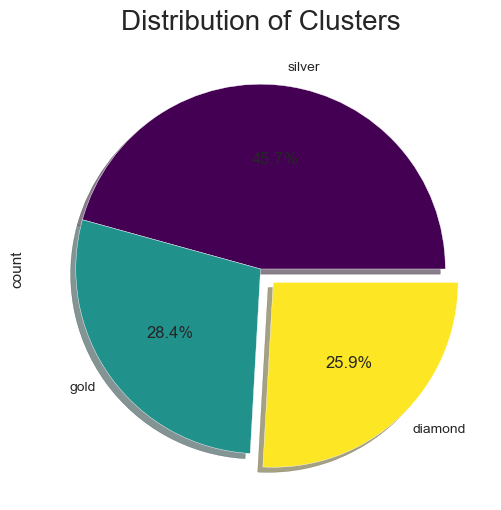

In [219]:
data["labels_kmeans2"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0,0, 0.1), shadow=True, figsize=(6,6))
plt.title("Distribution of Clusters", fontsize=20)
plt.show()

<p style="color:red; font-size:24px;">Insights</p>


<p style="color:blue; font-size:16px;">Silver has the highest amount of 1025 customers.</p>
<p style="color:blue; font-size:16px;">Gold has 633 customers.</p>
<p style="color:blue; font-size:16px;">Diamond has 581 customers.</p>

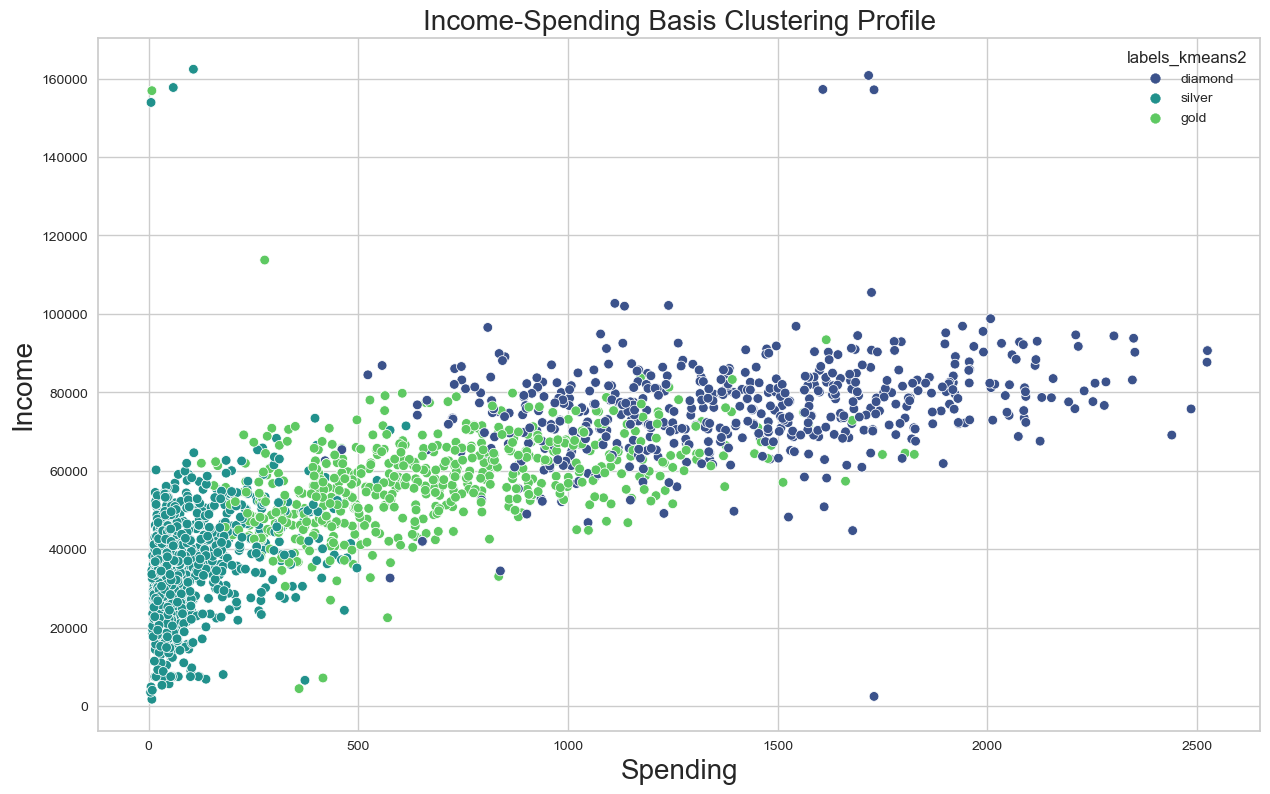

In [220]:
plt.figure(figsize=(15,9))
ax = sns.scatterplot(data=data, x="spent", y="income", hue="labels_kmeans2", palette = 'viridis');
plt.title("Income-Spending Basis Clustering Profile",fontsize=20)
plt.xlabel("Spending",fontsize=20)
plt.ylabel("Income",fontsize=20)
plt.show()

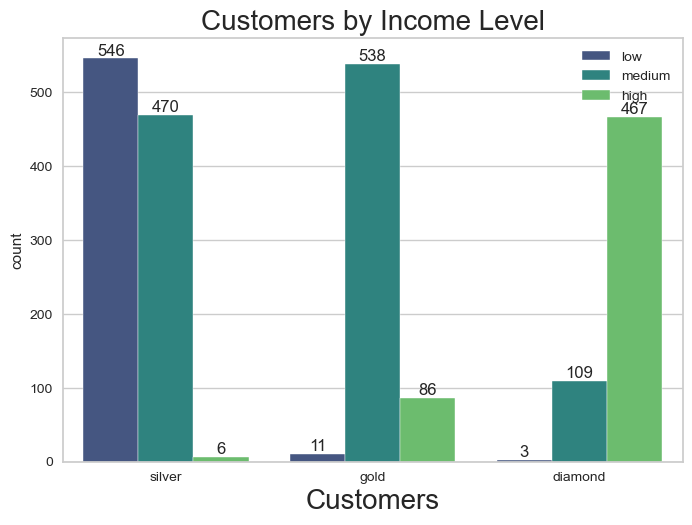

In [221]:
ax = sns.countplot(data=data, x ="labels_kmeans2", hue="income_level", hue_order=['low', 'medium', 'high'], order=["silver","gold","diamond"], palette="viridis")
plt.title("Customers by Income Level",fontsize=20)
plt.xlabel("Customers",fontsize=20)
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

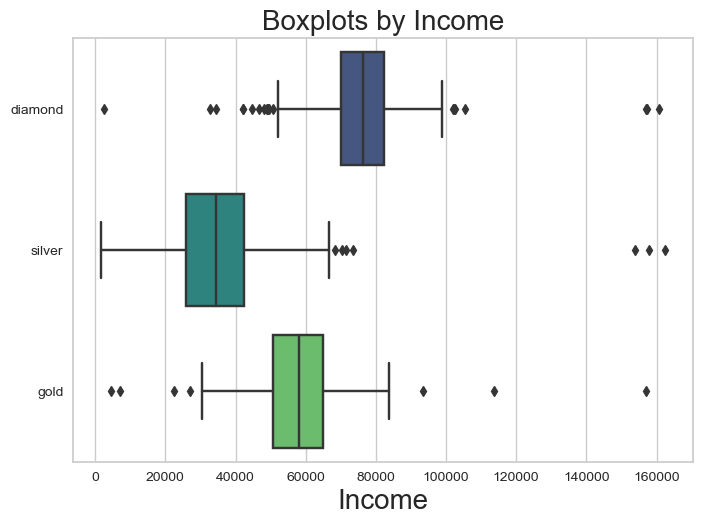

In [222]:
sns.boxplot(data=data, x="income", y="labels_kmeans2", palette="viridis")
plt.title("Boxplots by Income",fontsize=20)
plt.xlabel("Income",fontsize=20)
plt.ylabel("")
plt.show()

In [223]:
data[data["labels_kmeans2"]=="silver"]["income"].describe()

count        1022
mean    34,728.33
std     13,896.06
min          1730
25%     25,807.50
50%     34,416.50
75%         42401
max        162397
Name: income, dtype: float64

In [224]:
data[data["labels_kmeans2"]=="gold"]["income"].describe()

count         635
mean    57,749.63
std     11,440.60
min          4428
25%     50,637.50
50%         57959
75%     64,990.50
max        156924
Name: income, dtype: float64

In [225]:
data[data["labels_kmeans2"]=="diamond"]["income"].describe()

count         579
mean    76,039.39
std     12,075.21
min          2447
25%     69,950.50
50%         76445
75%         82197
max        160803
Name: income, dtype: float64

In [226]:
data.groupby("labels_kmeans2")["income_level"].value_counts(normalize=True)

labels_kmeans2  income_level
diamond         high           0.81
                medium         0.19
                low            0.01
gold            medium         0.85
                high           0.14
                low            0.02
silver          low            0.53
                medium         0.46
                high           0.01
Name: proportion, dtype: float64

<p style="color:red; font-size:24px;">Insights</p>


<p style="color:blue; font-size:16px;">53% of the Silver customers income level is low and most of the silver customers income range is in between 25000 to 45000.</p> 
<p style="color:blue; font-size:16px;">85% of the Gold customers income level is medium and most of the gold customers income range is in between 50000 to 65000.</p> 
<p style="color:blue; font-size:16px;">81% of the Diamond customers income level is high and most of the diamond customers income range is in between 70000 to 85000.</p> 

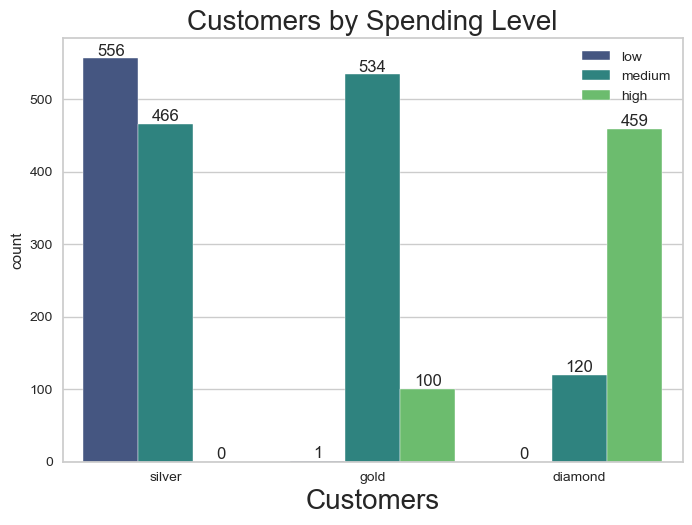

In [227]:
ax = sns.countplot(data=data, x ="labels_kmeans2", hue="spending_level", hue_order=['low', 'medium', 'high'], order=["silver","gold","diamond"], palette="viridis")
plt.title("Customers by Spending Level",fontsize=20)
plt.xlabel("Customers",fontsize=20)
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

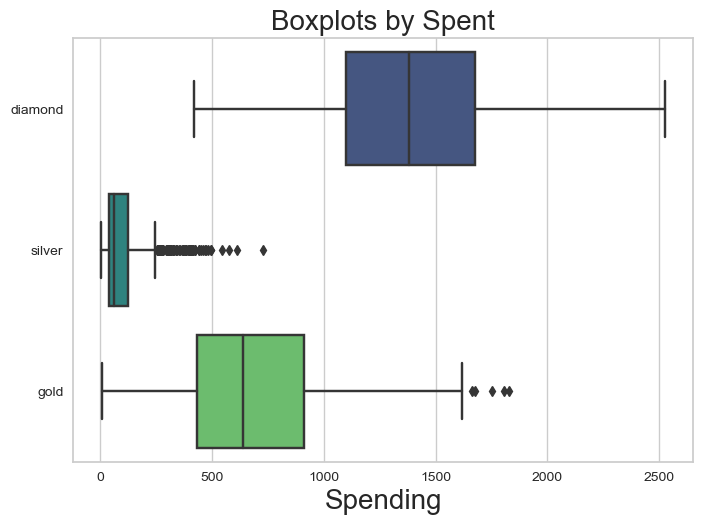

In [228]:
sns.boxplot(data=data, x="spent", y="labels_kmeans2", palette="viridis")
plt.title("Boxplots by Spent",fontsize=20)
plt.xlabel("Spending",fontsize=20)
plt.ylabel("")
plt.show()

In [229]:
data[data["labels_kmeans2"]=="silver"]["spent"].describe()

count     1022
mean     98.77
std      96.97
min          5
25%         38
50%         63
75%     123.75
max        727
Name: spent, dtype: float64

In [230]:
data[data["labels_kmeans2"]=="gold"]["spent"].describe()

count      635
mean    691.73
std     325.62
min          8
25%        433
50%        637
75%     911.50
max       1826
Name: spent, dtype: float64

In [231]:
data[data["labels_kmeans2"]=="diamond"]["spent"].describe()

count        579
mean    1,407.24
std       402.13
min          421
25%         1099
50%         1382
75%         1678
max         2525
Name: spent, dtype: float64

In [232]:
data.groupby("labels_kmeans2")["spending_level"].value_counts(normalize=True)

labels_kmeans2  spending_level
diamond         high             0.79
                medium           0.21
                low                 0
gold            medium           0.84
                high             0.16
                low              0.00
silver          low              0.54
                medium           0.46
                high                0
Name: proportion, dtype: float64

<p style="color:red; font-size:24px;">Insights</p>


<p style="color:blue; font-size:16px;">54% of the Silver customers spending level is low and most of the silver customers spending range is in between 25 to 125.</p> 
<p style="color:blue; font-size:16px;">84% of the Gold customers spending level is medium and most of the gold customers spending range is in between 400 to 900.</p> 
<p style="color:blue; font-size:16px;">79% of the Diamond customers spending level is high and most of the diamond customers spending range is in between 1000 to 1700.</p>

In [233]:
data.groupby(["labels_kmeans2"])["total_acceptedcmp"].sum()

labels_kmeans2
diamond    423
gold       154
silver      89
Name: total_acceptedcmp, dtype: int64

In [234]:
data.groupby(["labels_kmeans2"])["total_acceptedcmp"].sum()/data["total_acceptedcmp"].sum()

labels_kmeans2
diamond   0.64
gold      0.23
silver    0.13
Name: total_acceptedcmp, dtype: float64

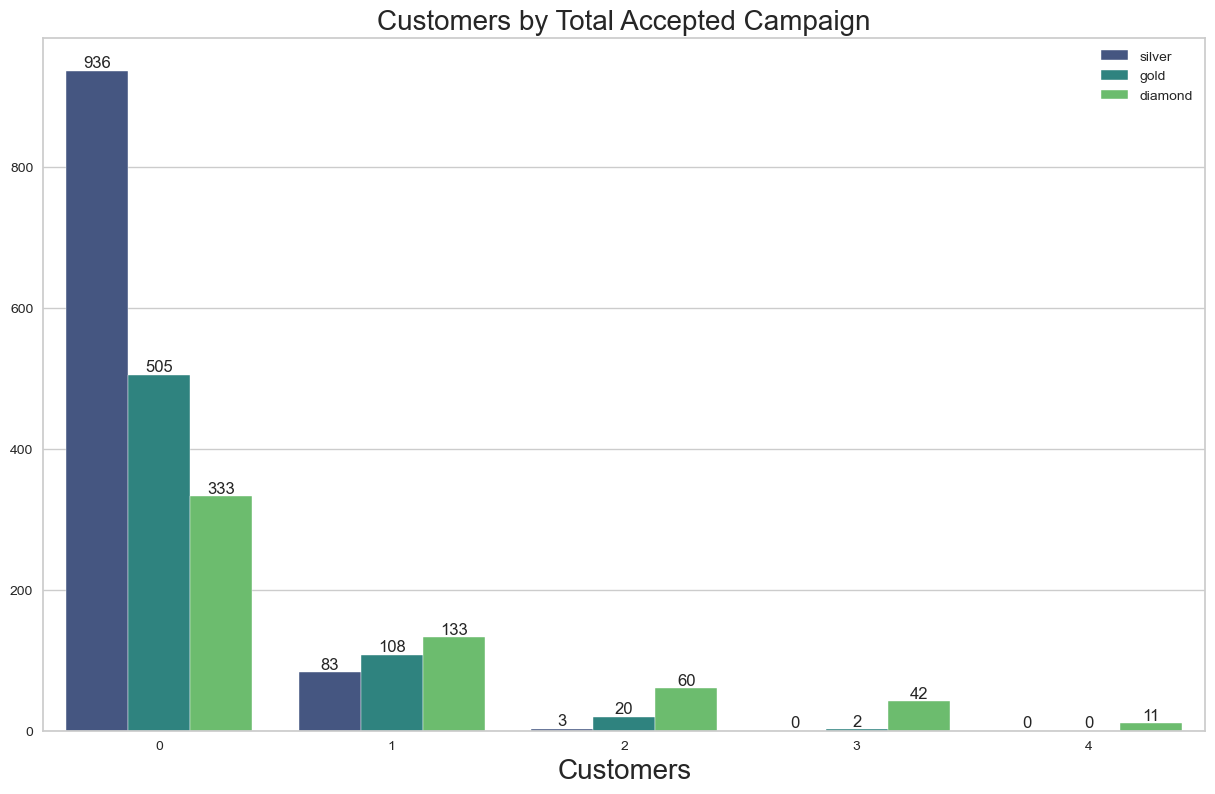

In [235]:
plt.figure(figsize=(15,9))
ax = sns.countplot(data=data, x ="total_acceptedcmp", hue="labels_kmeans2",  hue_order=['silver', 'gold', 'diamond'], palette="viridis")
plt.title("Customers by Total Accepted Campaign",fontsize=20)
plt.xlabel("Customers",fontsize=20)
plt.ylabel("")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">938 customers of silver, 504 customers of gold, 334 customers of diamond have not accepted any promotions yet.</p> 
<p style="color:blue; font-size:16px;">84 customers of silver, 107 customers of gold, 134 customers of diamond have accepted only one promotions yet.</p>
<p style="color:blue; font-size:16px;">3 customers of silver, 20 customers of gold, 60 customers of diamond have accepted two promotions.</p>
<p style="color:blue; font-size:16px;">Only 2 customers of gold and 42 customers of diamond have accepted three promotions.</p>
<p style="color:blue; font-size:16px;">Only 11 customers of diamond have accepted four promotions.</p>

In [236]:
data.groupby(["labels_kmeans2"])["numdealspurchases"].sum()

labels_kmeans2
diamond     786
gold       2340
silver     2075
Name: numdealspurchases, dtype: int64

In [237]:
data.groupby(["labels_kmeans2"])["numdealspurchases"].sum()/data["numdealspurchases"].sum()

labels_kmeans2
diamond   0.15
gold      0.45
silver    0.40
Name: numdealspurchases, dtype: float64

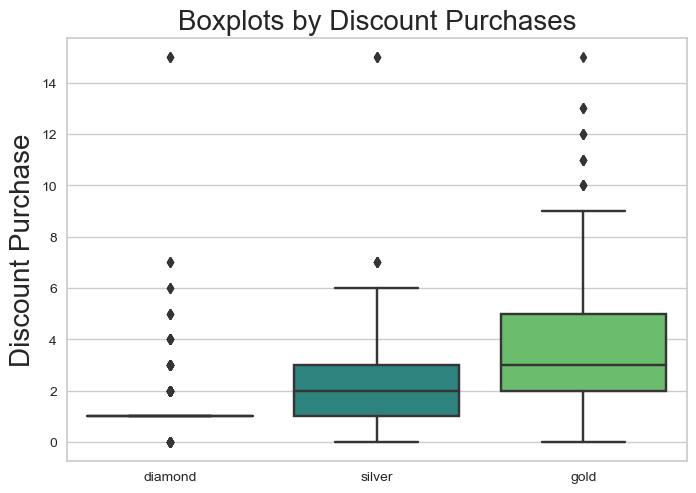

In [238]:
sns.boxplot(data=data, y="numdealspurchases", x="labels_kmeans2", palette="viridis")
plt.title("Boxplots by Discount Purchases",fontsize=20)
plt.xlabel("")
plt.ylabel("Discount Purchase", fontsize=20)
plt.show()

In [239]:
data[data["labels_kmeans2"]=="silver"]["numdealspurchases"].describe()

count   1022
mean    2.03
std     1.40
min        0
25%        1
50%        2
75%        3
max       15
Name: numdealspurchases, dtype: float64

In [240]:
data[data["labels_kmeans2"]=="gold"]["numdealspurchases"].describe()

count    635
mean    3.69
std     2.35
min        0
25%        2
50%        3
75%        5
max       15
Name: numdealspurchases, dtype: float64

In [241]:
data[data["labels_kmeans2"]=="diamond"]["numdealspurchases"].describe()

count    579
mean    1.36
std     1.35
min        0
25%        1
50%        1
75%        1
max       15
Name: numdealspurchases, dtype: float64

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">Most of the customers of silver have completed purchases using discount 1 to 3 times.</p>
<p style="color:blue; font-size:16px;">Most of the customers of gold have completed purchases using discount 2 to 5 times.</p>
<p style="color:blue; font-size:16px;">Most of the customers of diamond have completed purchases using discount only 1 times.</p>


In [242]:
data.groupby(["labels_kmeans2"])["kidhome"].value_counts(normalize=True)

labels_kmeans2  kidhome
diamond         0         0.95
                1         0.05
gold            0         0.78
                1         0.21
                2         0.01
silver          1         0.72
                0         0.24
                2         0.04
Name: proportion, dtype: float64

In [243]:
data.groupby(["labels_kmeans2"])["teenhome"].value_counts(normalize=True)

labels_kmeans2  teenhome
diamond         0          0.82
                1          0.17
                2          0.00
gold            1          0.82
                0          0.12
                2          0.06
silver          0          0.59
                1          0.40
                2          0.01
Name: proportion, dtype: float64

In [244]:
data.groupby(["labels_kmeans2"])["total_children"].value_counts(normalize=True)

labels_kmeans2  total_children
diamond         0                0.78
                1                0.21
                2                0.01
gold            1                0.70
                2                0.19
                0                0.08
                3                0.03
silver          1                0.55
                2                0.29
                0                0.13
                3                0.04
Name: proportion, dtype: float64

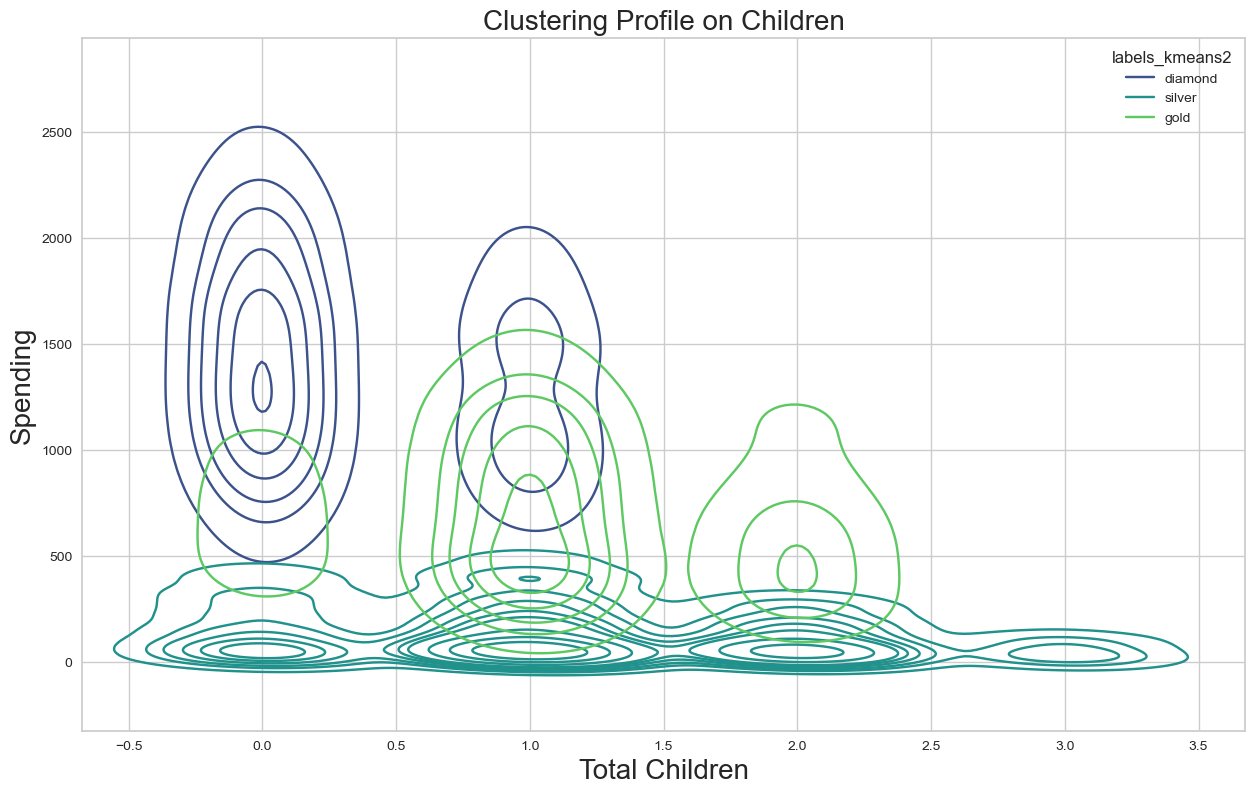

In [245]:
plt.figure(figsize=(15,9))
ax = sns.kdeplot(data=data, x="total_children", y="spent", hue="labels_kmeans2", palette="viridis")
plt.title("Clustering Profile on Children",fontsize=20)
plt.xlabel("Total Children", fontsize=20)
plt.ylabel("Spending", fontsize=20)
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">Most of the customers of diamond have no child, some have one. Their spending range is in between 500 to 2500.</p>
<p style="color:blue; font-size:16px;">Most of the customers of gold have one child, some have two and very few don't have any. Their spending range is in between 0 to 1500.</p>
<p style="color:blue; font-size:16px;">Most of the customers of silver have one child, some have two, some don't have any and very few have three. Their spending range is in between 0 to 500.</p>

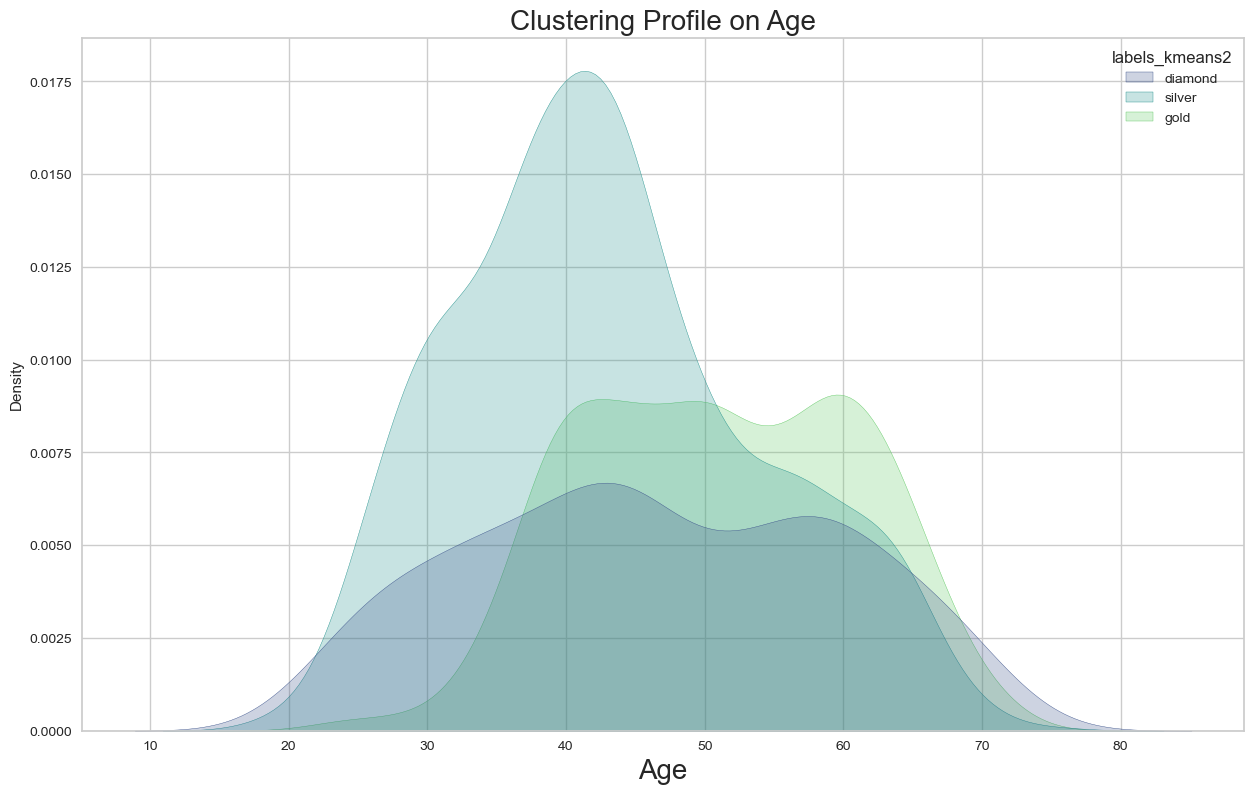

In [246]:
plt.figure(figsize=(15,9))
ax = sns.kdeplot(data=data, x="age", hue="labels_kmeans2", shade=True, palette="viridis")
plt.title("Clustering Profile on Age",fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.show()

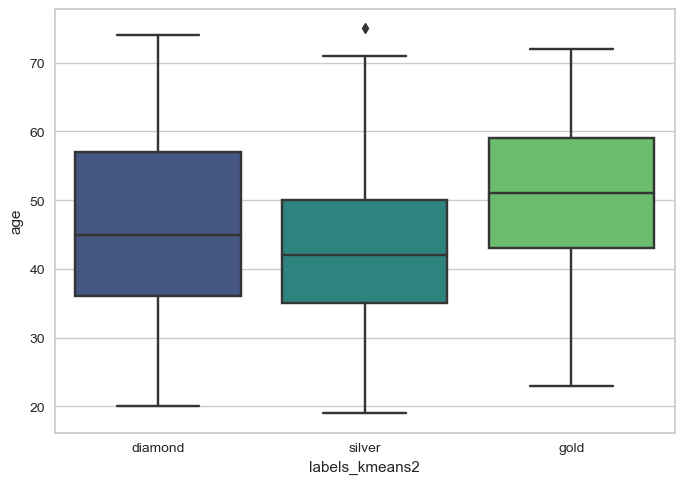

In [247]:
sns.boxplot(data=data, y="age", x="labels_kmeans2", palette="viridis");

In [248]:
data[data["labels_kmeans2"]=="silver"]["age"].describe()

count    1022
mean    42.92
std     10.79
min        19
25%        35
50%        42
75%        50
max        75
Name: age, dtype: float64

In [249]:
data[data["labels_kmeans2"]=="gold"]["age"].describe()

count     635
mean    50.94
std      9.82
min        23
25%        43
50%        51
75%        59
max        72
Name: age, dtype: float64

In [250]:
data[data["labels_kmeans2"]=="diamond"]["age"].describe()

count     579
mean    46.41
std     13.21
min        20
25%        36
50%        45
75%        57
max        74
Name: age, dtype: float64

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">Most of the customers of silver have age range in between 35 to 50.</p>
<p style="color:blue; font-size:16px;">Most of the customers of gold have age range in between 40 to 60.</p>
<p style="color:blue; font-size:16px;">Most of the customers of diamond have age range in between 40 to 60.</p>

In [251]:
data.groupby(["labels_kmeans2"])["education"].value_counts()

labels_kmeans2  education     
diamond         Graduate          323
                Post Graduate     255
                Under Graduate      1
gold            Post Graduate     330
                Graduate          304
                Under Graduate      1
silver          Graduate          499
                Post Graduate     471
                Under Graduate     52
Name: count, dtype: int64

In [252]:
data.groupby(["labels_kmeans2"])["education"].value_counts(normalize=True)

labels_kmeans2  education     
diamond         Graduate         0.56
                Post Graduate    0.44
                Under Graduate   0.00
gold            Post Graduate    0.52
                Graduate         0.48
                Under Graduate   0.00
silver          Graduate         0.49
                Post Graduate    0.46
                Under Graduate   0.05
Name: proportion, dtype: float64

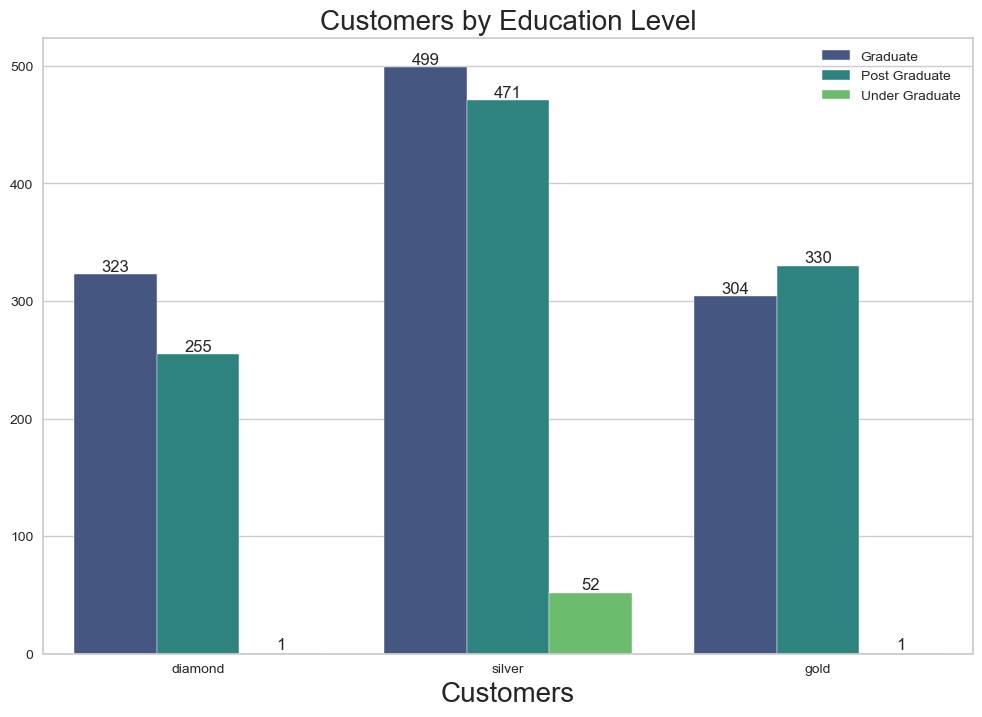

In [253]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=data, x ="labels_kmeans2", hue="education", palette="viridis")
plt.title("Customers by Education Level",fontsize=20)
plt.xlabel("Customers",fontsize=20)
plt.ylabel("")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

In [254]:
data.groupby(["labels_kmeans2","education"])["spent"].mean()

labels_kmeans2  education     
diamond         Graduate         1,381.39
                Post Graduate    1,442.22
                Under Graduate        839
gold            Graduate           664.39
                Post Graduate      717.68
                Under Graduate        434
silver          Graduate           101.00
                Post Graduate      100.64
                Under Graduate      60.46
Name: spent, dtype: float64

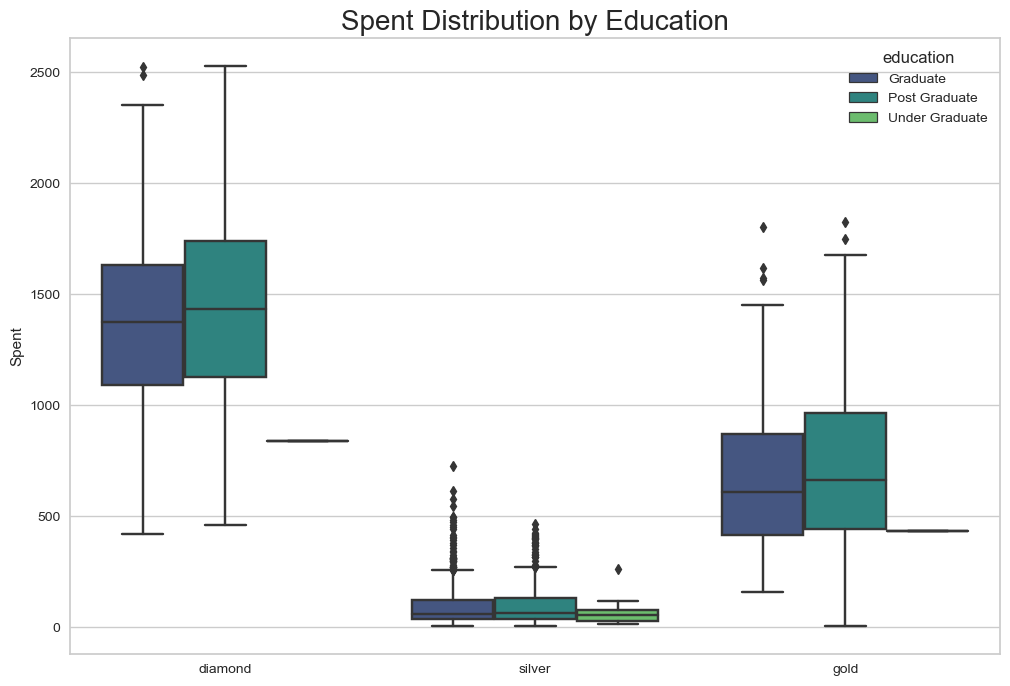

In [255]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="labels_kmeans2", y="spent", hue="education", palette="viridis")
plt.title('Spent Distribution by Education',fontsize=20)
plt.xlabel('')
plt.ylabel('Spent')
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">56% of the diamond customers education level are Graduate.</p>
<p style="color:blue; font-size:16px;">44% of the diamond customers education level are Post Graduate.</p>
<br>
<p style="color:blue; font-size:16px;">52% of the gold customers education level are Post Graduate.</p>
<p style="color:blue; font-size:16px;">48% of the gold customers education level are Graduate.</p>
<br>
<p style="color:blue; font-size:16px;">49% of the silver customers education level are Graduate.</p>
<p style="color:blue; font-size:16px;">46% of the silver customers education level are Post Graduate.</p>
<p style="color:blue; font-size:16px;">5% of the silver customers education level are Under Graduate.</p>
<br>
<p style="color:blue; font-size:16px;">Customers with a higher level of education level tend to spend more.</p>

In [256]:
data.groupby(["labels_kmeans2"])["marital_status"].value_counts()

labels_kmeans2  marital_status
diamond         Relationship      359
                Single            220
gold            Relationship      426
                Single            209
silver          Relationship      657
                Single            365
Name: count, dtype: int64

In [257]:
data.groupby(["labels_kmeans2"])["marital_status"].value_counts(normalize=True)

labels_kmeans2  marital_status
diamond         Relationship     0.62
                Single           0.38
gold            Relationship     0.67
                Single           0.33
silver          Relationship     0.64
                Single           0.36
Name: proportion, dtype: float64

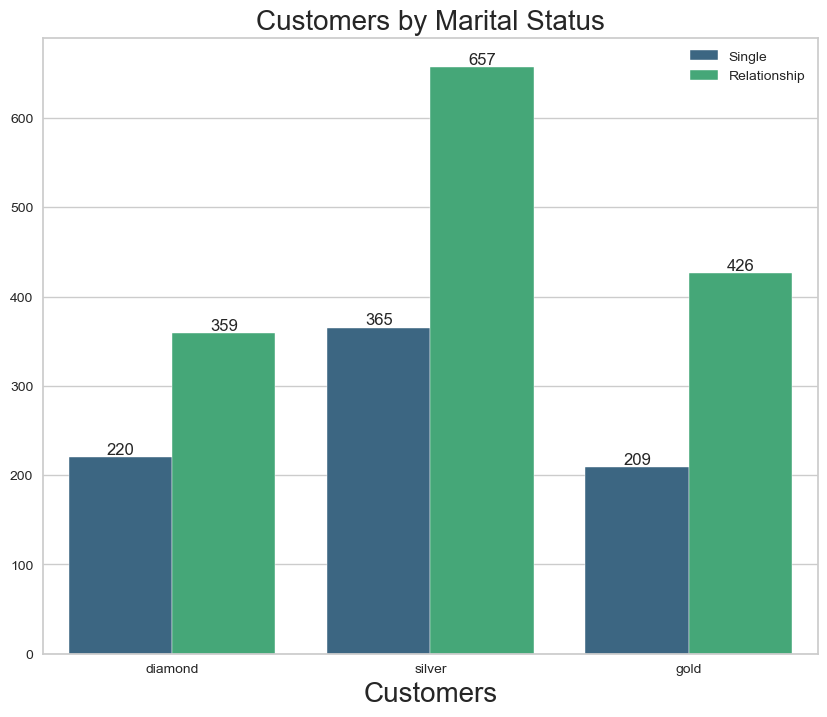

In [258]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=data, x ="labels_kmeans2", hue="marital_status", palette="viridis")
plt.title("Customers by Marital Status",fontsize=20)
plt.xlabel("Customers",fontsize=20)
plt.ylabel("")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

In [259]:
data.groupby(["labels_kmeans2","marital_status"])["spent"].mean()

labels_kmeans2  marital_status
diamond         Relationship     1,412.74
                Single           1,398.28
gold            Relationship       679.67
                Single             716.30
silver          Relationship        98.46
                Single              99.33
Name: spent, dtype: float64

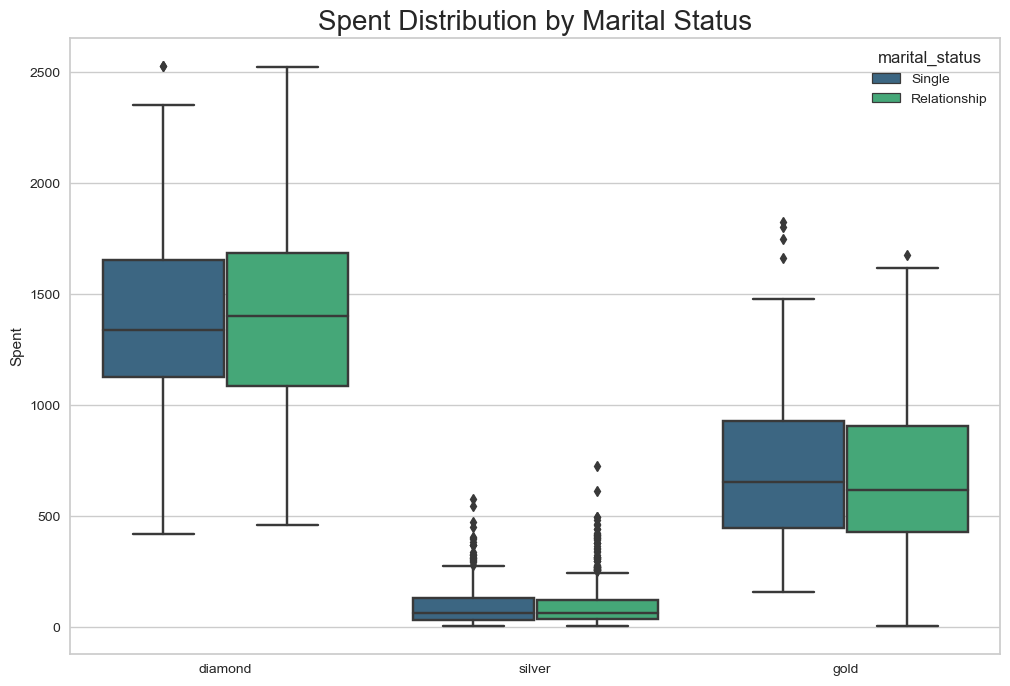

In [260]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="labels_kmeans2", y="spent", hue="marital_status", palette="viridis")
plt.title('Spent Distribution by Marital Status',fontsize=20)
plt.xlabel('')
plt.ylabel('Spent')
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">62% of the diamond customers have a relationship and 38% of the diamond customers are single.</p>
<p style="color:blue; font-size:16px;">67% of the gold customers have a relationship and 33% of the gold customers are single.</p>
<p style="color:blue; font-size:16px;">64% of the silver customers have a relationship and 36% of the silver customers are single.</p>
<br>
<p style="color:blue; font-size:16px;">Distribution of clusters according to marriage status is the same.</p>

In [261]:
data.groupby(["labels_kmeans2"])["numwebpurchases"].sum()

labels_kmeans2
diamond    3050
gold       3957
silver     2133
Name: numwebpurchases, dtype: int64

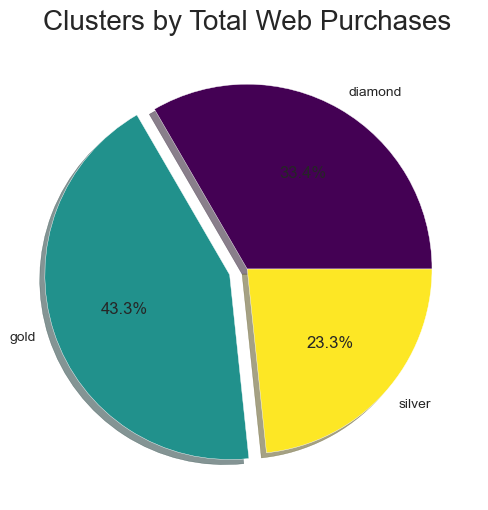

In [262]:
data.groupby(["labels_kmeans2"])["numwebpurchases"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0,0.1, 0), shadow=True, figsize=(6,6))
plt.title("Clusters by Total Web Purchases",fontsize=20)
plt.ylabel("")
plt.show()

In [263]:
data.groupby(["labels_kmeans2"])["numcatalogpurchases"].sum()

labels_kmeans2
diamond    3524
gold       1864
silver      567
Name: numcatalogpurchases, dtype: int64

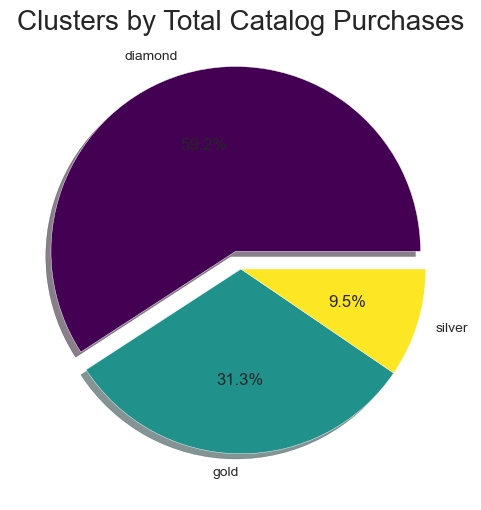

In [264]:
data.groupby(["labels_kmeans2"])["numcatalogpurchases"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True, figsize=(6,6))
plt.title("Clusters by Total Catalog Purchases",fontsize=20)
plt.ylabel("")
plt.show()

In [265]:
data.groupby(["labels_kmeans2"])["numstorepurchases"].sum()

labels_kmeans2
diamond    4838
gold       4816
silver     3305
Name: numstorepurchases, dtype: int64

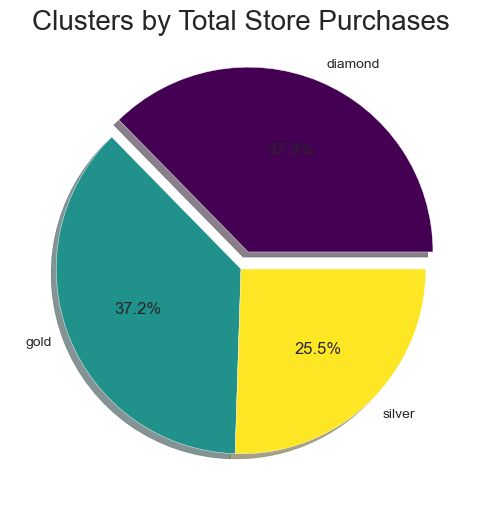

In [266]:
data.groupby(["labels_kmeans2"])["numstorepurchases"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True, figsize=(6,6))
plt.title("Clusters by Total Store Purchases",fontsize=20)
plt.ylabel("")
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">43.2% of web purchases are made by gold customers.</p>
<p style="color:blue; font-size:16px;">33.4% of web purchases are made by diamond customers.</p>
<p style="color:blue; font-size:16px;">23.4% of web purchases are made by silver customers.</p>
<br>
<p style="color:blue; font-size:16px;">59.3% of catalog purchases are made by diamond customers.</p>
<p style="color:blue; font-size:16px;">31.2% of catalog purchases are made by gold customers.</p>
<p style="color:blue; font-size:16px;">9.6% of catalog purchases are made by silver customers.</p>
<br>
<p style="color:blue; font-size:16px;">37.4% of store purchases are made by diamond customers.</p>
<p style="color:blue; font-size:16px;">37.1% of store purchases are made by gold customers.</p>
<p style="color:blue; font-size:16px;">25.5% of store purchases are made by silver customers.</p>

In [267]:
data.groupby(["labels_kmeans2"])["days_since_enrollment"].mean()

labels_kmeans2
diamond   548.79
gold      584.04
silver    504.97
Name: days_since_enrollment, dtype: float64

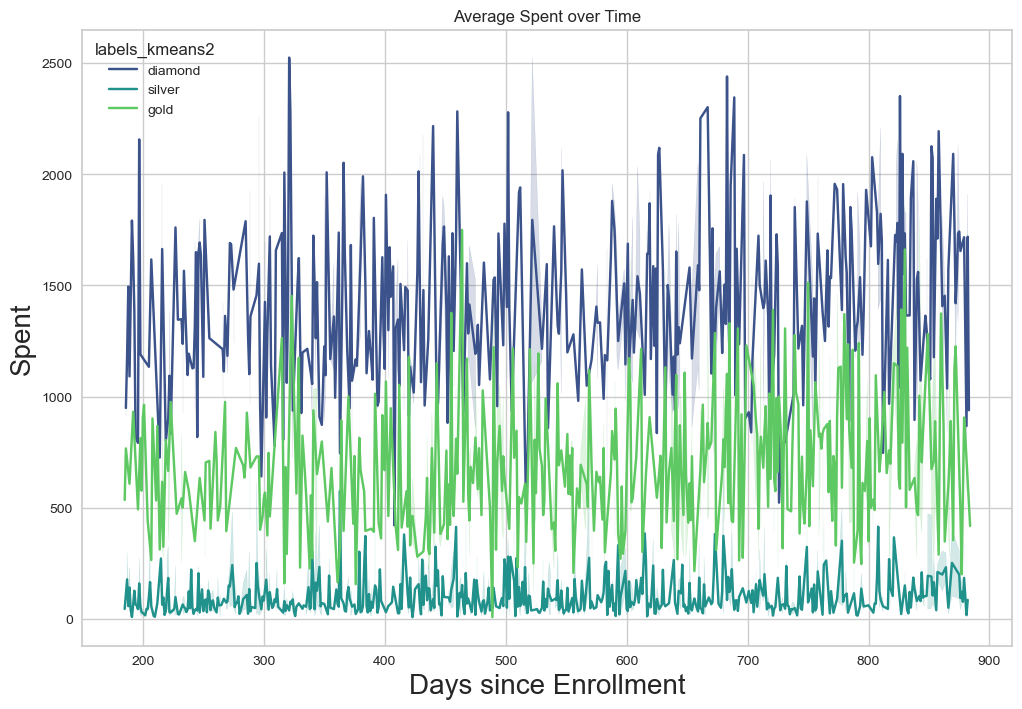

In [268]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x="days_since_enrollment", y="spent", hue="labels_kmeans2", palette="viridis")

plt.title('Average Spent over Time')
plt.xlabel('Days since Enrollment', fontsize=20)
plt.ylabel('Spent',fontsize=20)

plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">No significant difference between the spent habits of clusters according to when they were registered.</p>



In [269]:
data.groupby(["labels_kmeans2"])["mntwines"].sum()/data["mntwines"].sum()*100

labels_kmeans2
diamond   53.48
gold      40.43
silver     6.10
Name: mntwines, dtype: float64

In [270]:
data.groupby(["labels_kmeans2"])["mntfruits"].sum()/data["mntfruits"].sum()*100

labels_kmeans2
diamond   67.86
gold      22.90
silver     9.24
Name: mntfruits, dtype: float64

In [271]:
data.groupby(["labels_kmeans2"])["mntmeatproducts"].sum()/data["mntmeatproducts"].sum()*100

labels_kmeans2
diamond   71.75
gold      21.65
silver     6.60
Name: mntmeatproducts, dtype: float64

In [272]:
data.groupby(["labels_kmeans2"])["mntfishproducts"].sum()/data["mntfishproducts"].sum()*100

labels_kmeans2
diamond   69.32
gold      21.70
silver     8.98
Name: mntfishproducts, dtype: float64

In [273]:
data.groupby(["labels_kmeans2"])["mntsweetproducts"].sum()/data["mntsweetproducts"].sum()*100

labels_kmeans2
diamond   67.38
gold      23.55
silver     9.07
Name: mntsweetproducts, dtype: float64

In [274]:
data.groupby(["labels_kmeans2"])["mntgoldprods"].sum()/data["mntgoldprods"].sum()*100

labels_kmeans2
diamond   45.10
gold      38.22
silver    16.68
Name: mntgoldprods, dtype: float64

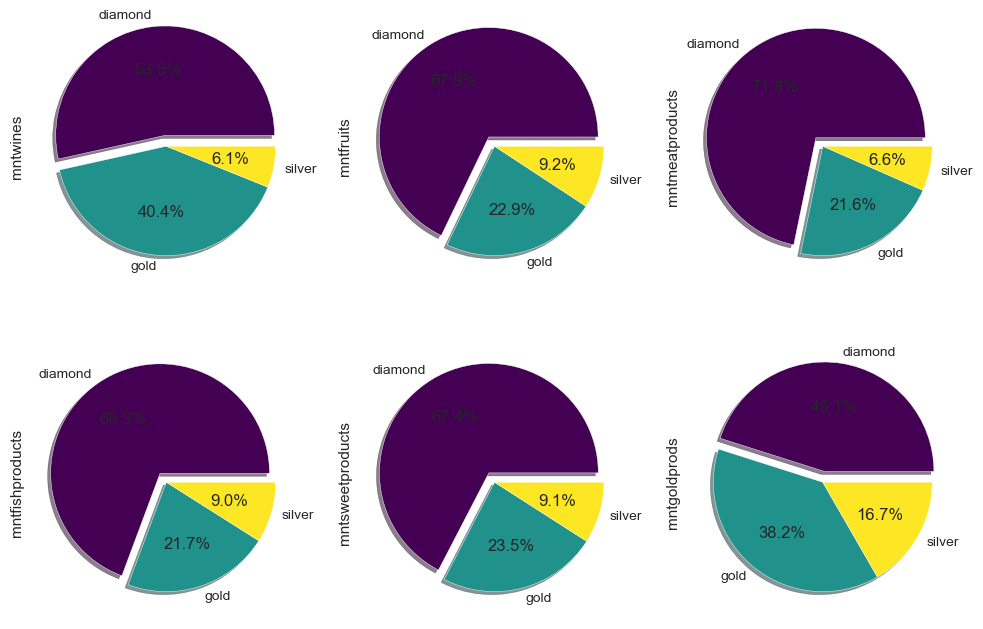

In [275]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
(data.groupby(["labels_kmeans2"])["mntwines"].sum()/data["mntwines"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.subplot(2,3,2)
(data.groupby(["labels_kmeans2"])["mntfruits"].sum()/data["mntfruits"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.subplot(2,3,3)
(data.groupby(["labels_kmeans2"])["mntmeatproducts"].sum()/data["mntmeatproducts"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.subplot(2,3,4)
(data.groupby(["labels_kmeans2"])["mntfishproducts"].sum()/data["mntfishproducts"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.subplot(2,3,5)
(data.groupby(["labels_kmeans2"])["mntsweetproducts"].sum()/data["mntsweetproducts"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.subplot(2,3,6)
(data.groupby(["labels_kmeans2"])["mntgoldprods"].sum()/data["mntgoldprods"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.show()

In [276]:
wine_silver = data[data["labels_kmeans2"]=="silver"]["mntwines"].sum()/data[data["labels_kmeans2"]=="silver"]["spent"].sum()*100
fruit_silver = data[data["labels_kmeans2"]=="silver"]["mntfruits"].sum()/data[data["labels_kmeans2"]=="silver"]["spent"].sum()*100
meat_silver = data[data["labels_kmeans2"]=="silver"]["mntmeatproducts"].sum()/data[data["labels_kmeans2"]=="silver"]["spent"].sum()*100
fish_silver = data[data["labels_kmeans2"]=="silver"]["mntfishproducts"].sum()/data[data["labels_kmeans2"]=="silver"]["spent"].sum()*100
sweet_silver = data[data["labels_kmeans2"]=="silver"]["mntsweetproducts"].sum()/data[data["labels_kmeans2"]=="silver"]["spent"].sum()*100
gold_silver= data[data["labels_kmeans2"]=="silver"]["mntgoldprods"].sum()/data[data["labels_kmeans2"]=="silver"]["spent"].sum()*100

In [277]:
wine_gold = data[data["labels_kmeans2"]=="gold"]["mntwines"].sum()/data[data["labels_kmeans2"]=="gold"]["spent"].sum()*100
fruit_gold = data[data["labels_kmeans2"]=="gold"]["mntfruits"].sum()/data[data["labels_kmeans2"]=="gold"]["spent"].sum()*100
meat_gold = data[data["labels_kmeans2"]=="gold"]["mntmeatproducts"].sum()/data[data["labels_kmeans2"]=="gold"]["spent"].sum()*100
fish_gold = data[data["labels_kmeans2"]=="gold"]["mntfishproducts"].sum()/data[data["labels_kmeans2"]=="gold"]["spent"].sum()*100
sweet_gold = data[data["labels_kmeans2"]=="gold"]["mntsweetproducts"].sum()/data[data["labels_kmeans2"]=="gold"]["spent"].sum()*100
gold_gold= data[data["labels_kmeans2"]=="gold"]["mntgoldprods"].sum()/data[data["labels_kmeans2"]=="gold"]["spent"].sum()*100

In [278]:
wine_diamond = data[data["labels_kmeans2"]=="diamond"]["mntwines"].sum()/data[data["labels_kmeans2"]=="diamond"]["spent"].sum()*100
fruit_diamond = data[data["labels_kmeans2"]=="diamond"]["mntfruits"].sum()/data[data["labels_kmeans2"]=="diamond"]["spent"].sum()*100
meat_diamond = data[data["labels_kmeans2"]=="diamond"]["mntmeatproducts"].sum()/data[data["labels_kmeans2"]=="diamond"]["spent"].sum()*100
fish_diamond = data[data["labels_kmeans2"]=="diamond"]["mntfishproducts"].sum()/data[data["labels_kmeans2"]=="diamond"]["spent"].sum()*100
sweet_diamond = data[data["labels_kmeans2"]=="diamond"]["mntsweetproducts"].sum()/data[data["labels_kmeans2"]=="diamond"]["spent"].sum()*100
gold_diamond = data[data["labels_kmeans2"]=="diamond"]["mntgoldprods"].sum()/data[data["labels_kmeans2"]=="diamond"]["spent"].sum()*100

In [279]:
a=[wine_silver,fruit_silver,meat_silver,fish_silver,sweet_silver,gold_silver]
b=[wine_gold,fruit_gold,meat_gold,fish_gold,sweet_gold,gold_gold]
c=[wine_diamond,fruit_diamond,meat_diamond,fish_diamond,sweet_diamond,gold_diamond]
labels=["wine","fruits","meat","fish","sweet","gold"]

v1 = pd.DataFrame({'values': a}, index=labels)
v2 = pd.DataFrame({'values': b}, index=labels)
v3 = pd.DataFrame({'values': c}, index=labels)

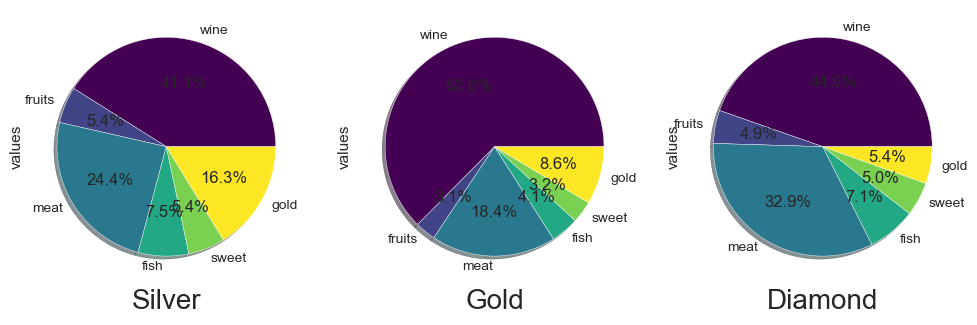

In [280]:
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
v1["values"].plot(kind="pie",autopct="%1.1f%%",subplots=True, cmap="viridis",shadow=True)
plt.xlabel("Silver",fontsize=20)

plt.subplot(1,3,2)
v2["values"].plot(kind="pie",autopct="%1.1f%%",subplots=True, cmap="viridis",shadow=True)
plt.xlabel("Gold",fontsize=20)

plt.subplot(1,3,3)
v3["values"].plot(kind="pie",autopct="%1.1f%%",subplots=True, cmap="viridis",shadow=True)
plt.xlabel("Diamond",fontsize=20)

plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">Diamond customers ranked first in sales of wine, fruit, meat, fish, sweet and gold products.</p>

<p style="color:blue; font-size:16px;">Gold customers rank second in sales of wine and gold products</p>
<br>
<p style="color:blue; font-size:16px;">Silver customers spend: 41% wine, 24% meat, 16% gold products.</p>
<p style="color:blue; font-size:16px;">Gold customers spend: 62% wine, 18% meat, 8% gold products.</p>
<p style="color:blue; font-size:16px;">Diamond customers spend: 44% wine, 33% meat, 7% fish.</p>

In [301]:
data.groupby(["labels_kmeans2"])["response"].value_counts()

labels_kmeans2  response
diamond         0           410
                1           169
gold            0           561
                1            74
silver          0           931
                1            91
Name: count, dtype: int64

In [303]:
data.groupby(["labels_kmeans2"])["response"].value_counts(normalize=True)

labels_kmeans2  response
diamond         0          0.71
                1          0.29
gold            0          0.88
                1          0.12
silver          0          0.91
                1          0.09
Name: proportion, dtype: float64

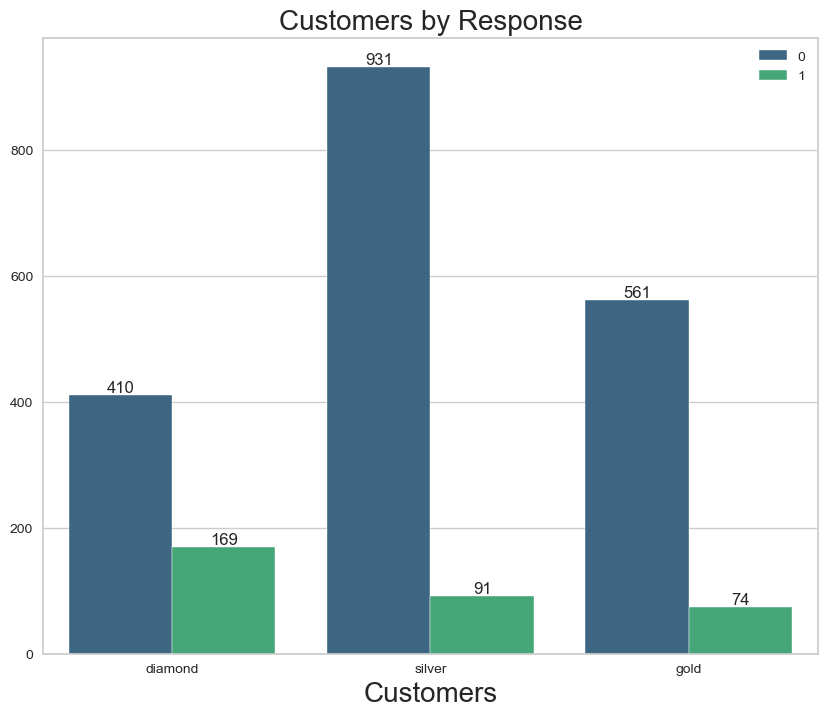

In [302]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=data, x ="labels_kmeans2", hue="response", palette="viridis")
plt.title("Customers by Response",fontsize=20)
plt.xlabel("Customers",fontsize=20)
plt.ylabel("")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

In [304]:
data[data["response"]==1]["labels_kmeans2"].value_counts()

labels_kmeans2
diamond    169
silver      91
gold        74
Name: count, dtype: int64

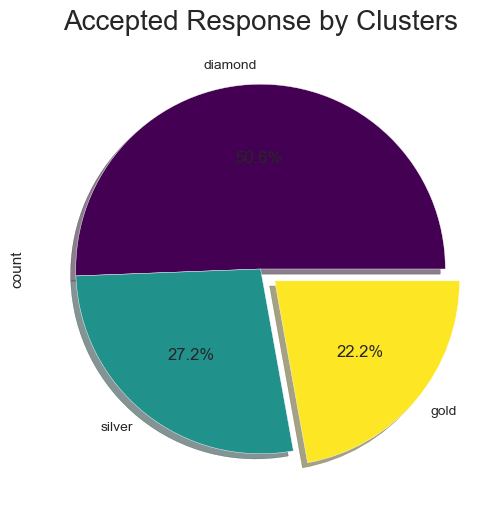

In [308]:
data[data["response"]==1]["labels_kmeans2"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0,0, 0.1), shadow=True, figsize=(6,6))
plt.title("Accepted Response by Clusters",fontsize=20)
plt.show()

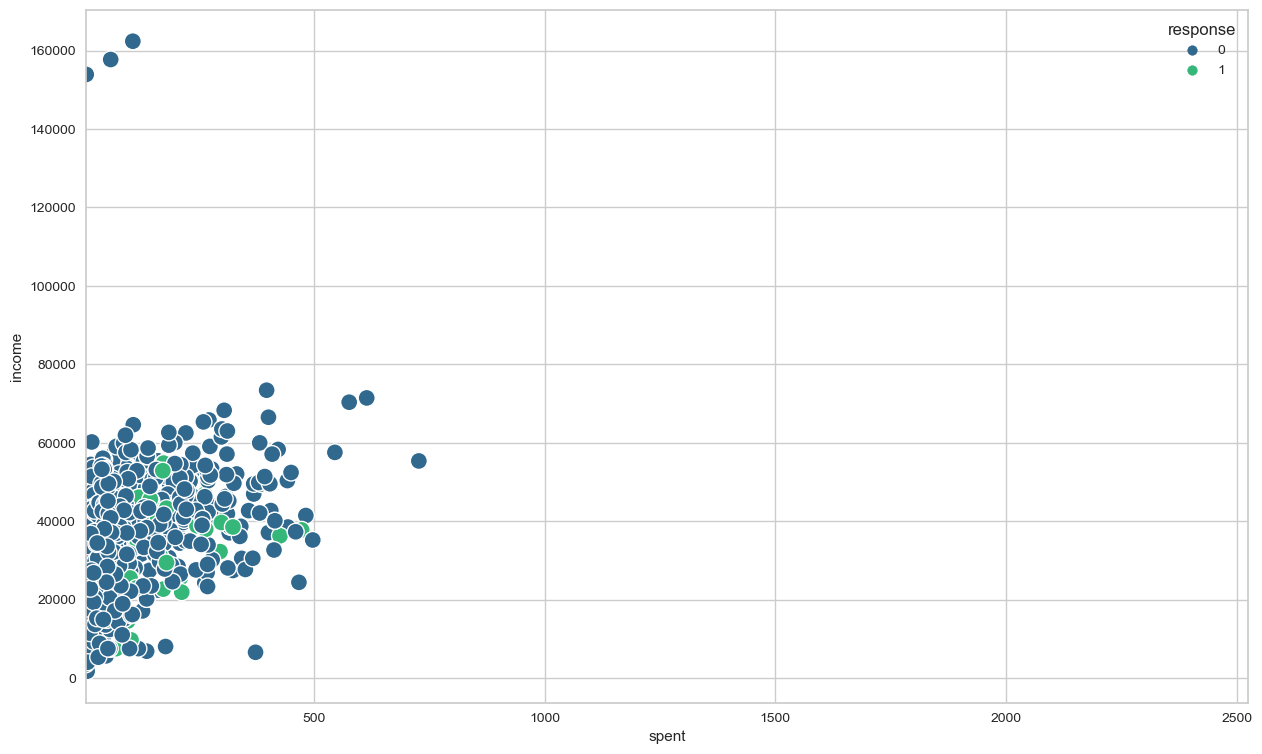

In [298]:
x_min = data['spent'].min()
x_max = data['spent'].max()

plt.figure(figsize=(15,9))
sns.scatterplot(data=data[data["labels_kmeans2"]=="silver"], x="spent", y="income",hue="response",palette="viridis",s=150)
plt.xlim(x_min, x_max)
plt.show()

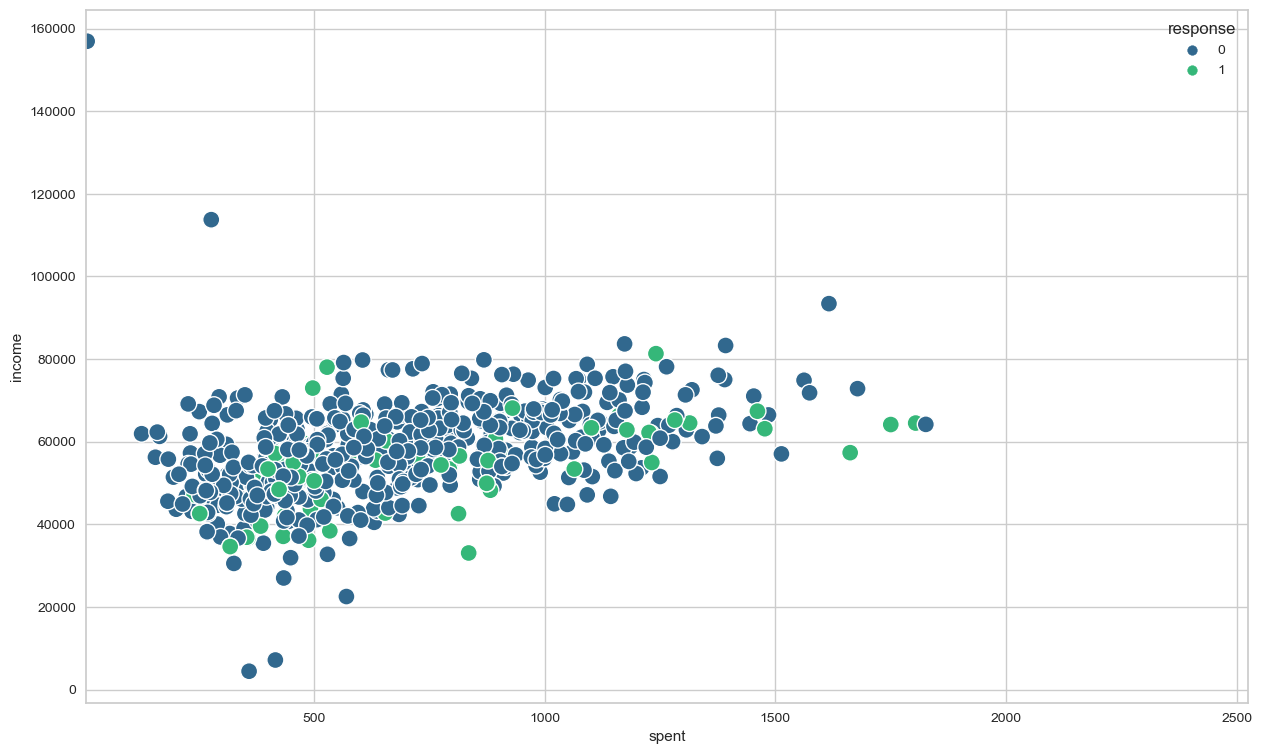

In [299]:
x_min = data['spent'].min()
x_max = data['spent'].max()

plt.figure(figsize=(15,9))
sns.scatterplot(data=data[data["labels_kmeans2"]=="gold"], x="spent", y="income",hue="response", palette="viridis",s=150)
plt.xlim(x_min, x_max)
plt.show()

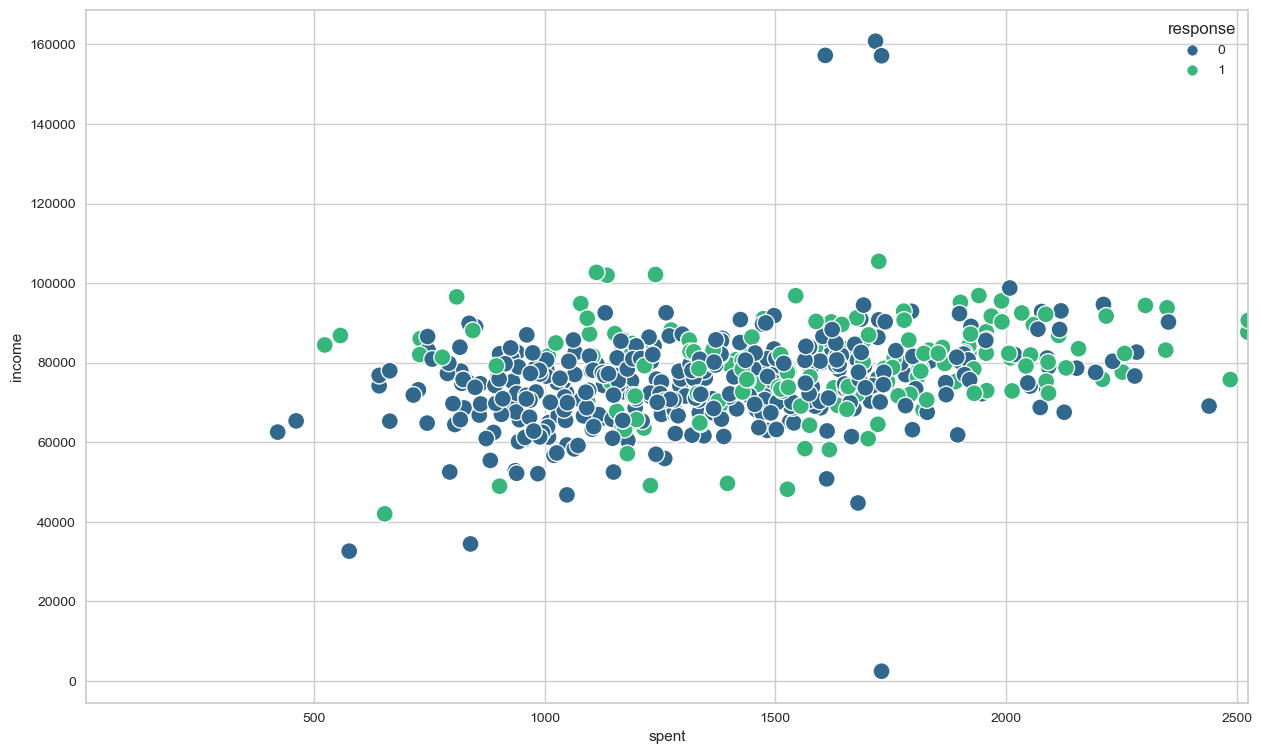

In [300]:
x_min = data['spent'].min()
x_max = data['spent'].max()

plt.figure(figsize=(15,9))
sns.scatterplot(data=data[data["labels_kmeans2"]=="diamond"], x="spent", y="income",hue="response", palette="viridis",s=150)
plt.xlim(x_min, x_max)
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">51% of the accepted responses belong to diamond customers.</p>
<p style="color:blue; font-size:16px;">27% of the accepted responses belong to silver customers.</p>
<p style="color:blue; font-size:16px;">22% of the accepted responses belong to gold customers.</p>
<br>
<p style="color:blue; font-size:16px;">71% of diamond customers rejected the response</p>
<p style="color:blue; font-size:16px;">88% of gold customers rejected the response</p>
<p style="color:blue; font-size:16px;">91% of silver customers rejected the response</p>

## Customer's Clusters Profiling 

<p style="color:red; font-size:24px;">Silver</p>

<p style="color:blue; font-size:16px;">The majority of customers are silver.</p>
<p style="color:blue; font-size:16px;">Income range is in between 25000 to 45000 and spending range is in between 25 to 125.</p>
<p style="color:blue; font-size:16px;">Average age is 43.</p>
<p style="color:blue; font-size:16px;">Most of them are Graduate.</p>
<p style="color:blue; font-size:16px;">Nearly 2/3 of them have a relationship.</p>
<p style="color:blue; font-size:16px;">1/2 of them have 1 child.</p>
<p style="color:blue; font-size:16px;">The expenditure of single customers is almost the same as the expenditure of customers with a relationship.</p>
<p style="color:blue; font-size:16px;">Silver customers' purchasing priorities: wine>meat>gold products>fish>sweet>fruits</p>
<p style="color:blue; font-size:16px;">Campaign acceptance is rare.</p>
<p style="color:blue; font-size:16px;">Shopping with discount is high.</p>
<p style="color:blue; font-size:16px;">Average number of days since enrollment is 504.</p>
<br>



<p style="color:red; font-size:24px;">Gold</p>

<p style="color:blue; font-size:16px;">Income range is in between 50000 to 65000 and spending range is in between 400 to 900.</p>
<p style="color:blue; font-size:16px;">Average age is 50.</p>
<p style="color:blue; font-size:16px;">Most of them are Graduate and Post Graduate.</p>
<p style="color:blue; font-size:16px;">Nearly 2/3 of them have a relationship.</p>
<p style="color:blue; font-size:16px;">Most of them have 1 child.</p>
<p style="color:blue; font-size:16px;">The expenditure of single customers is almost the same as the expenditure of customers with a relationship.</p>
<p style="color:blue; font-size:16px;">Gold customers rank 1st in web purchases.</p>
<p style="color:blue; font-size:16px;">Store purchases are almost equal to Diamond customers and more than Silver customers.</p>
<p style="color:blue; font-size:16px;">Gold customers' purchasing priorities: wine>meat>gold products>fish>sweet>fruits</p>
<p style="color:blue; font-size:16px;">Campaign acceptance is low.</p>
<p style="color:blue; font-size:16px;">Shopping with discount is high.</p>
<p style="color:blue; font-size:16px;">Average number of days since enrollment is 584.</p>
<br>


<p style="color:red; font-size:24px;">Diamond</p>

<p style="color:blue; font-size:16px;">Income range is in between 70000 to 85000 and spending range is in between 1000 to 1700.</p>
<p style="color:blue; font-size:16px;">Average age is 46.</p>
<p style="color:blue; font-size:16px;">Most of them are Graduate and Post Graduate.</p>
<p style="color:blue; font-size:16px;">Nearly 2/3 of them have a relationship.</p>
<p style="color:blue; font-size:16px;">Most of them have no child.</p>
<p style="color:blue; font-size:16px;">The expenditure of single customers is almost the same as the expenditure of customers with a relationship.</p>
<p style="color:blue; font-size:16px;">Diamond customers rank 1st in catalogue purchases.</p>
<p style="color:blue; font-size:16px;">Store purchases are almost equal to Gold customers and more than Silver customers.</p>
<p style="color:blue; font-size:16px;">Diamond customers' purchasing priorities : wine>meat>fish>gold products>sweet>fruits</p>
<p style="color:blue; font-size:16px;">Total accepted campaign is high.</p>
<p style="color:blue; font-size:16px;">Shopping with discount is low.</p>
<p style="color:blue; font-size:16px;">Average number of days since enrollment is 548.</p>
<p style="color:blue; font-size:16px;">the most response acceptance belongs to diamond customers.</p>

## Clusters Analysis - Hierarchical Model with feature selection  

In [310]:
data["labels_hc"].value_counts()

labels_hc
silver     1090
diamond     573
gold        573
Name: count, dtype: int64

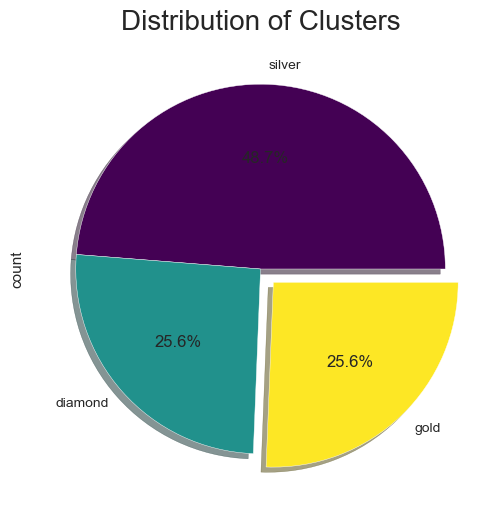

In [309]:
data["labels_hc"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0,0, 0.1), shadow=True, figsize=(6,6))
plt.title("Distribution of Clusters", fontsize=20)
plt.show()

<p style="color:red; font-size:24px;">Insights</p>


<p style="color:blue; font-size:16px;">Silver has the highest amount of 1090 customers.</p>
<p style="color:blue; font-size:16px;">Gold has 573 customers.</p>
<p style="color:blue; font-size:16px;">Diamond has 573 customers.</p>

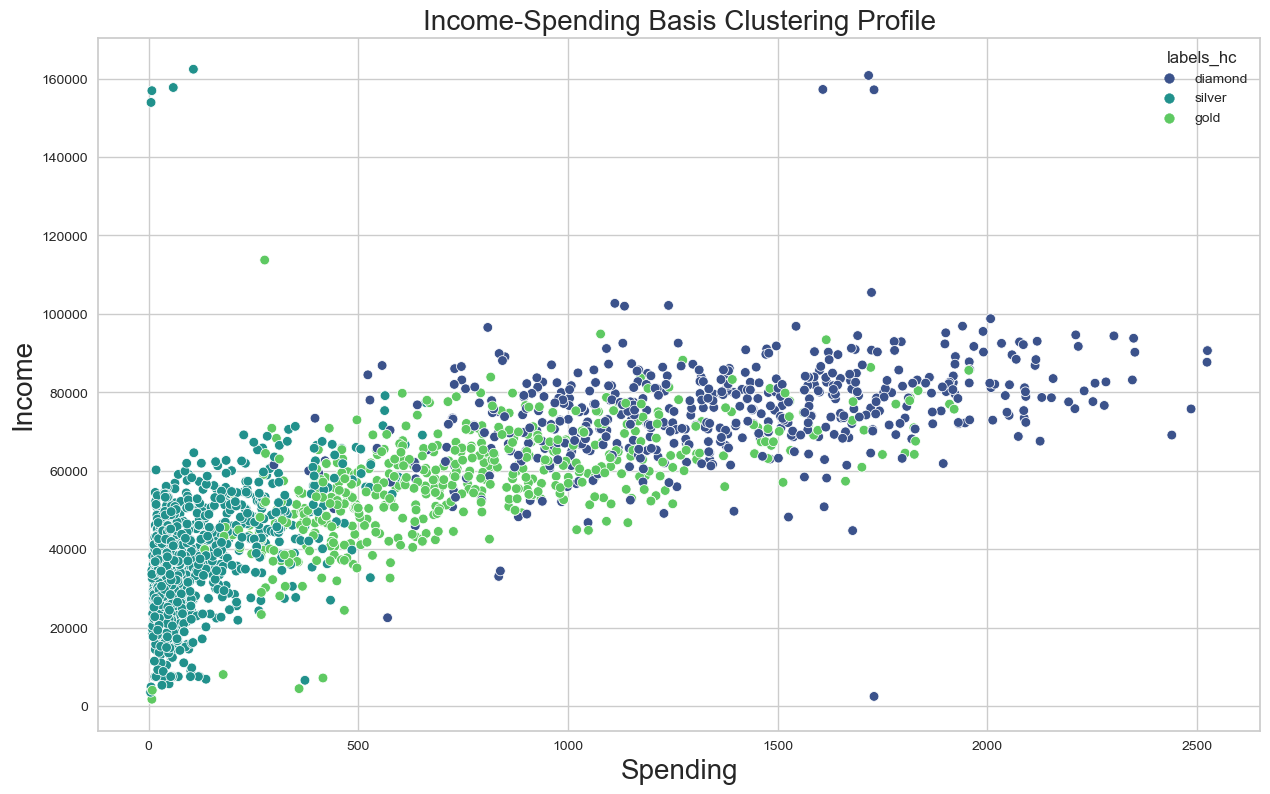

In [311]:
plt.figure(figsize=(15,9))
ax = sns.scatterplot(data=data, x="spent", y="income", hue="labels_hc", palette = 'viridis');
plt.title("Income-Spending Basis Clustering Profile",fontsize=20)
plt.xlabel("Spending",fontsize=20)
plt.ylabel("Income",fontsize=20)
plt.show()

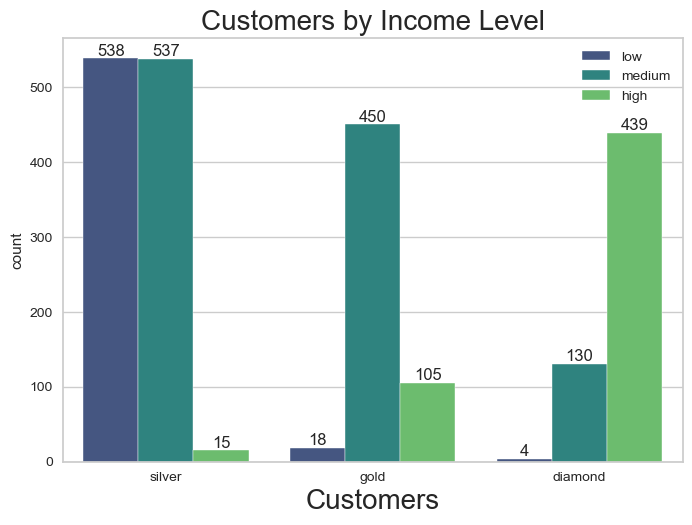

In [312]:
ax = sns.countplot(data=data, x ="labels_hc", hue="income_level", hue_order=['low', 'medium', 'high'], order=["silver","gold","diamond"], palette="viridis")
plt.title("Customers by Income Level",fontsize=20)
plt.xlabel("Customers",fontsize=20)
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

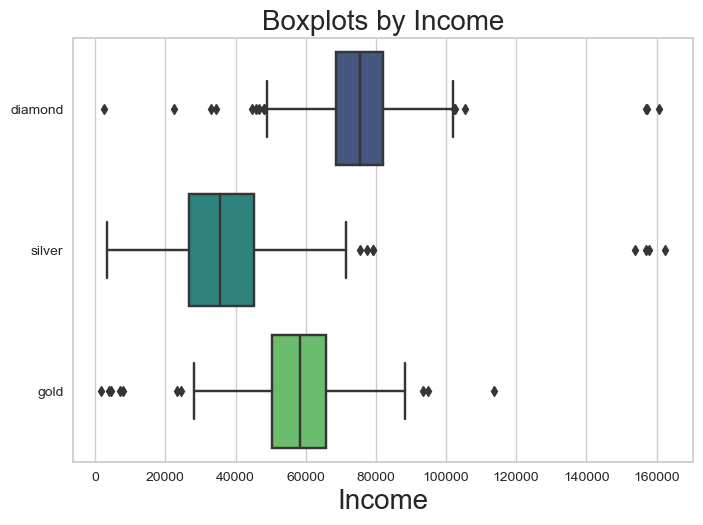

In [313]:
sns.boxplot(data=data, x="income", y="labels_hc", palette="viridis")
plt.title("Boxplots by Income",fontsize=20)
plt.xlabel("Income",fontsize=20)
plt.ylabel("")
plt.show()

In [314]:
data[data["labels_hc"]=="silver"]["income"].describe()

count        1090
mean    36,607.05
std     15,205.65
min          3502
25%     26,672.25
50%     35,702.50
75%         45198
max        162397
Name: income, dtype: float64

In [315]:
data[data["labels_hc"]=="gold"]["income"].describe()

count         573
mean    57,844.53
std     12,812.18
min          1730
25%         50388
50%         58330
75%         65685
max        113734
Name: income, dtype: float64

In [316]:
data[data["labels_hc"]=="diamond"]["income"].describe()

count         573
mean    75,294.20
std     12,573.95
min          2447
25%         68682
50%         75507
75%         82032
max        160803
Name: income, dtype: float64

In [317]:
data.groupby("labels_hc")["income_level"].value_counts(normalize=True)

labels_hc  income_level
diamond    high           0.77
           medium         0.23
           low            0.01
gold       medium         0.79
           high           0.18
           low            0.03
silver     low            0.49
           medium         0.49
           high           0.01
Name: proportion, dtype: float64

<p style="color:red; font-size:24px;">Insights</p>


<p style="color:blue; font-size:16px;">49% of the Silver customers income level is low and most of the silver customers income range is in between 25000 to 45000.</p> 
<p style="color:blue; font-size:16px;">79% of the Gold customers income level is medium and most of the gold customers income range is in between 50000 to 65000.</p> 
<p style="color:blue; font-size:16px;">77% of the Diamond customers income level is high and most of the diamond customers income range is in between 65000 to 83000.</p> 

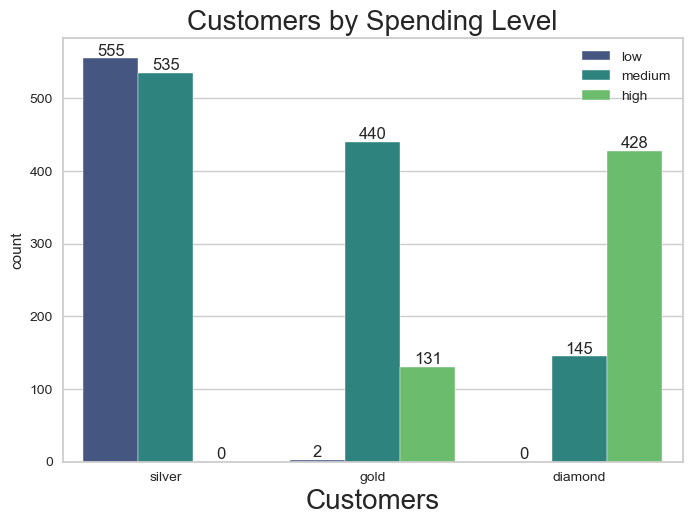

In [318]:
ax = sns.countplot(data=data, x ="labels_hc", hue="spending_level", hue_order=['low', 'medium', 'high'], order=["silver","gold","diamond"], palette="viridis")
plt.title("Customers by Spending Level",fontsize=20)
plt.xlabel("Customers",fontsize=20)
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

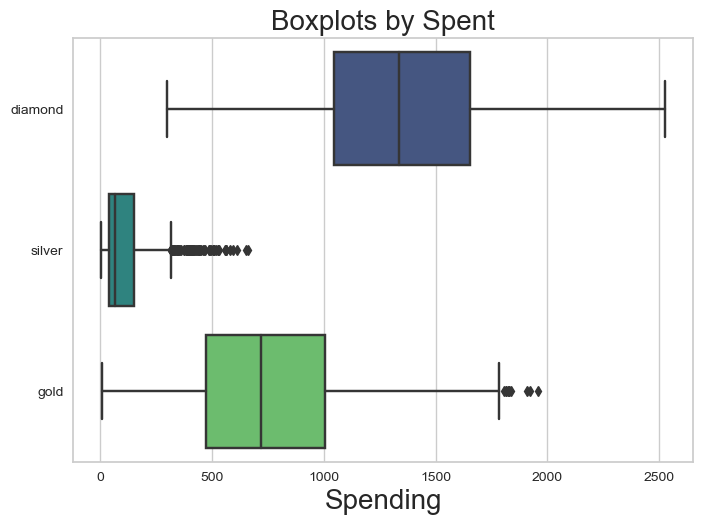

In [319]:
sns.boxplot(data=data, x="spent", y="labels_hc", palette="viridis")
plt.title("Boxplots by Spent",fontsize=20)
plt.xlabel("Spending",fontsize=20)
plt.ylabel("")
plt.show()

In [320]:
data[data["labels_hc"]=="silver"]["spent"].describe()

count     1090
mean    115.51
std     117.07
min          5
25%         40
50%      67.50
75%     150.50
max        661
Name: spent, dtype: float64

In [321]:
data[data["labels_hc"]=="gold"]["spent"].describe()

count      573
mean    777.61
std     374.55
min          8
25%        473
50%        721
75%       1005
max       1956
Name: spent, dtype: float64

In [322]:
data[data["labels_hc"]=="diamond"]["spent"].describe()

count        573
mean    1,367.38
std       424.69
min          299
25%         1044
50%         1338
75%         1655
max         2525
Name: spent, dtype: float64

In [323]:
data.groupby("labels_hc")["spending_level"].value_counts(normalize=True)

labels_hc  spending_level
diamond    high             0.75
           medium           0.25
           low                 0
gold       medium           0.77
           high             0.23
           low              0.00
silver     low              0.51
           medium           0.49
           high                0
Name: proportion, dtype: float64

<p style="color:red; font-size:24px;">Insights</p>


<p style="color:blue; font-size:16px;">51% of the Silver customers spending level is low and most of the silver customers spending range is in between 40 to 150.</p> 
<p style="color:blue; font-size:16px;">77% of the Gold customers spending level is medium and most of the gold customers spending range is in between 400 to 1000.</p> 
<p style="color:blue; font-size:16px;">75% of the Diamond customers spending level is high and most of the diamond customers spending range is in between 1000 to 1700.</p>

In [324]:
data.groupby(["labels_hc"])["total_acceptedcmp"].sum()

labels_hc
diamond    413
gold       156
silver      97
Name: total_acceptedcmp, dtype: int64

In [325]:
data.groupby(["labels_hc"])["total_acceptedcmp"].sum()/data["total_acceptedcmp"].sum()

labels_hc
diamond   0.62
gold      0.23
silver    0.15
Name: total_acceptedcmp, dtype: float64

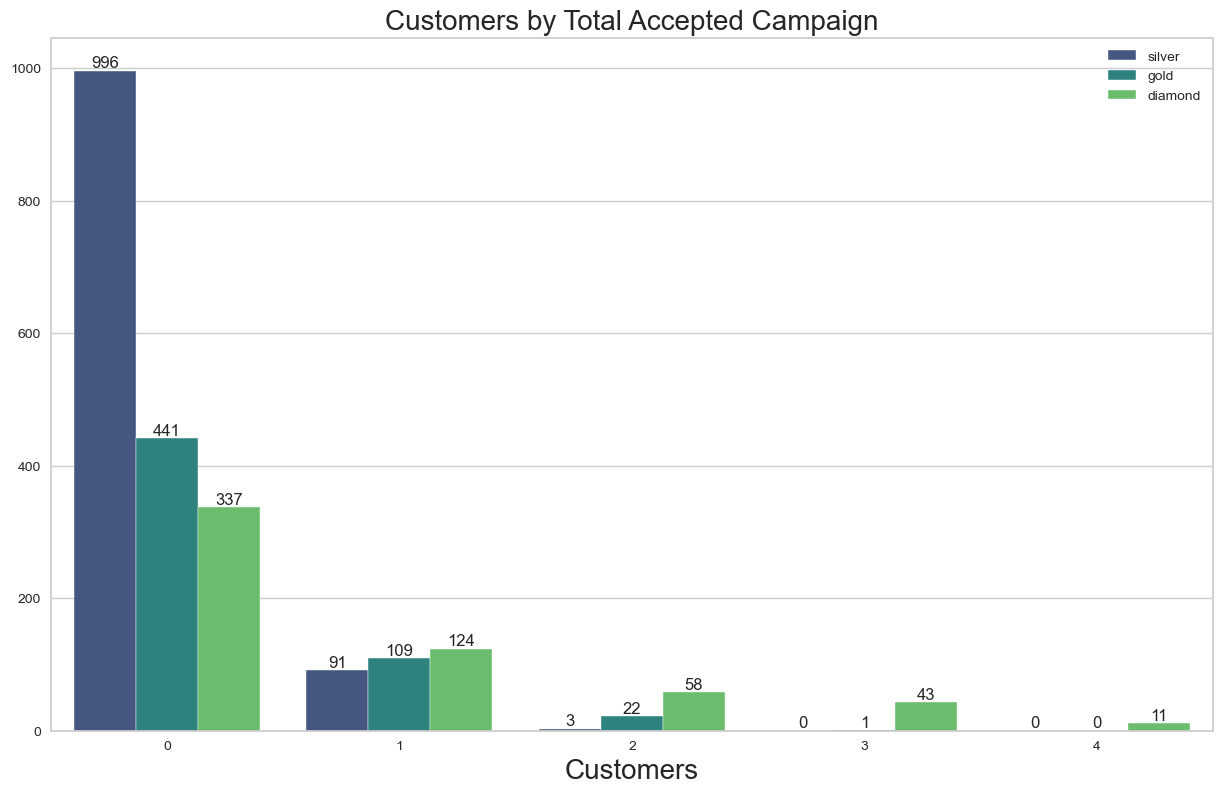

In [326]:
plt.figure(figsize=(15,9))
ax = sns.countplot(data=data, x ="total_acceptedcmp", hue="labels_hc",  hue_order=['silver', 'gold', 'diamond'], palette="viridis")
plt.title("Customers by Total Accepted Campaign",fontsize=20)
plt.xlabel("Customers",fontsize=20)
plt.ylabel("")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">996 customers of silver, 441 customers of gold, 337 customers of diamond have not accepted any promotions yet.</p> 
<p style="color:blue; font-size:16px;">91 customers of silver, 109 customers of gold, 124 customers of diamond have accepted only one promotions yet.</p>
<p style="color:blue; font-size:16px;">3 customers of silver, 22 customers of gold, 58 customers of diamond have accepted two promotions.</p>
<p style="color:blue; font-size:16px;">Only 43 customers of diamond have accepted three promotions.</p>
<p style="color:blue; font-size:16px;">Only 11 customers of diamond have accepted four promotions.</p>

In [327]:
data.groupby(["labels_hc"])["numdealspurchases"].sum()

labels_hc
diamond     767
gold       2179
silver     2255
Name: numdealspurchases, dtype: int64

In [328]:
data.groupby(["labels_hc"])["numdealspurchases"].sum()/data["numdealspurchases"].sum()

labels_hc
diamond   0.15
gold      0.42
silver    0.43
Name: numdealspurchases, dtype: float64

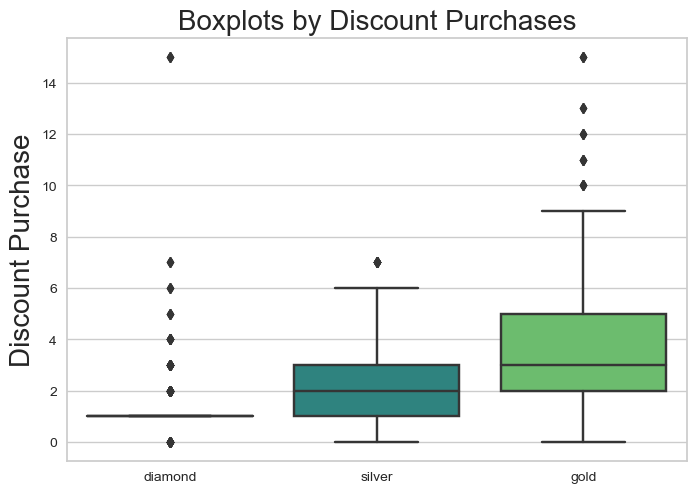

In [329]:
sns.boxplot(data=data, y="numdealspurchases", x="labels_hc", palette="viridis")
plt.title("Boxplots by Discount Purchases",fontsize=20)
plt.xlabel("")
plt.ylabel("Discount Purchase", fontsize=20)
plt.show()

In [330]:
data[data["labels_hc"]=="silver"]["numdealspurchases"].describe()

count   1090
mean    2.07
std     1.32
min        0
25%        1
50%        2
75%        3
max        7
Name: numdealspurchases, dtype: float64

In [331]:
data[data["labels_hc"]=="gold"]["numdealspurchases"].describe()

count    573
mean    3.80
std     2.49
min        0
25%        2
50%        3
75%        5
max       15
Name: numdealspurchases, dtype: float64

In [332]:
data[data["labels_hc"]=="diamond"]["numdealspurchases"].describe()

count    573
mean    1.34
std     1.35
min        0
25%        1
50%        1
75%        1
max       15
Name: numdealspurchases, dtype: float64

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">Most of the customers of silver have completed purchases using discount 1 to 3 times.</p>
<p style="color:blue; font-size:16px;">Most of the customers of gold have completed purchases using discount 2 to 5 times.</p>
<p style="color:blue; font-size:16px;">Most of the customers of diamond have completed purchases using discount only 1 times.</p>

In [333]:
data.groupby(["labels_hc"])["kidhome"].value_counts(normalize=True)

labels_hc  kidhome
diamond    0         0.97
           1         0.03
gold       0         0.76
           1         0.23
           2         0.01
silver     1         0.69
           0         0.27
           2         0.04
Name: proportion, dtype: float64

In [334]:
data.groupby(["labels_hc"])["teenhome"].value_counts(normalize=True)

labels_hc  teenhome
diamond    0          0.85
           1          0.14
           2          0.00
gold       1          0.78
           0          0.16
           2          0.06
silver     0          0.53
           1          0.46
           2          0.02
Name: proportion, dtype: float64

In [335]:
data.groupby(["labels_hc"])["total_children"].value_counts(normalize=True)

labels_hc  total_children
diamond    0                0.83
           1                0.17
           2                0.01
gold       1                0.78
           2                0.16
           0                0.05
           3                0.01
silver     1                0.54
           2                0.30
           0                0.12
           3                0.04
Name: proportion, dtype: float64

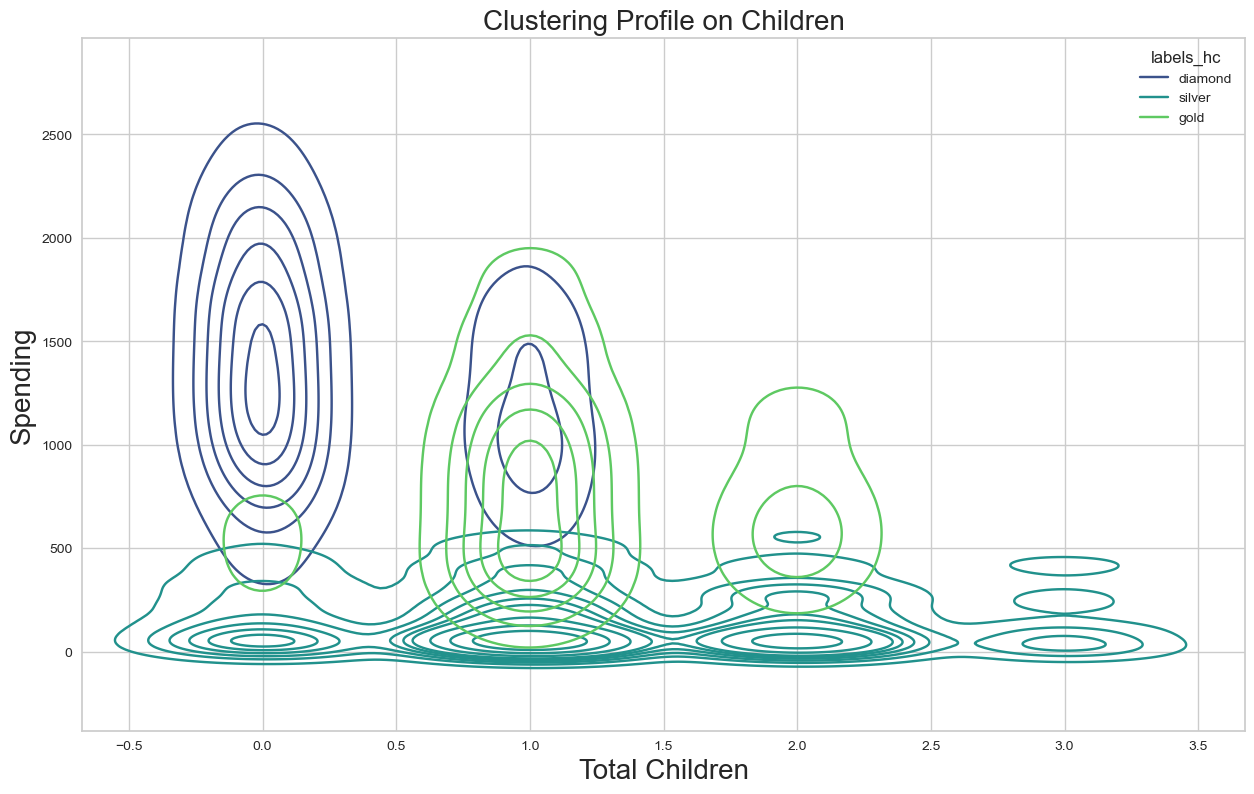

In [336]:
plt.figure(figsize=(15,9))
ax = sns.kdeplot(data=data, x="total_children", y="spent", hue="labels_hc", palette="viridis")
plt.title("Clustering Profile on Children",fontsize=20)
plt.xlabel("Total Children", fontsize=20)
plt.ylabel("Spending", fontsize=20)
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">Most of the customers of diamond have no child, some have one.</p>
<p style="color:blue; font-size:16px;">Most of the customers of gold have one child, some have two.</p>
<p style="color:blue; font-size:16px;">Most of the customers of silver have one child, some have two, some don't have any and very few have three.</p>

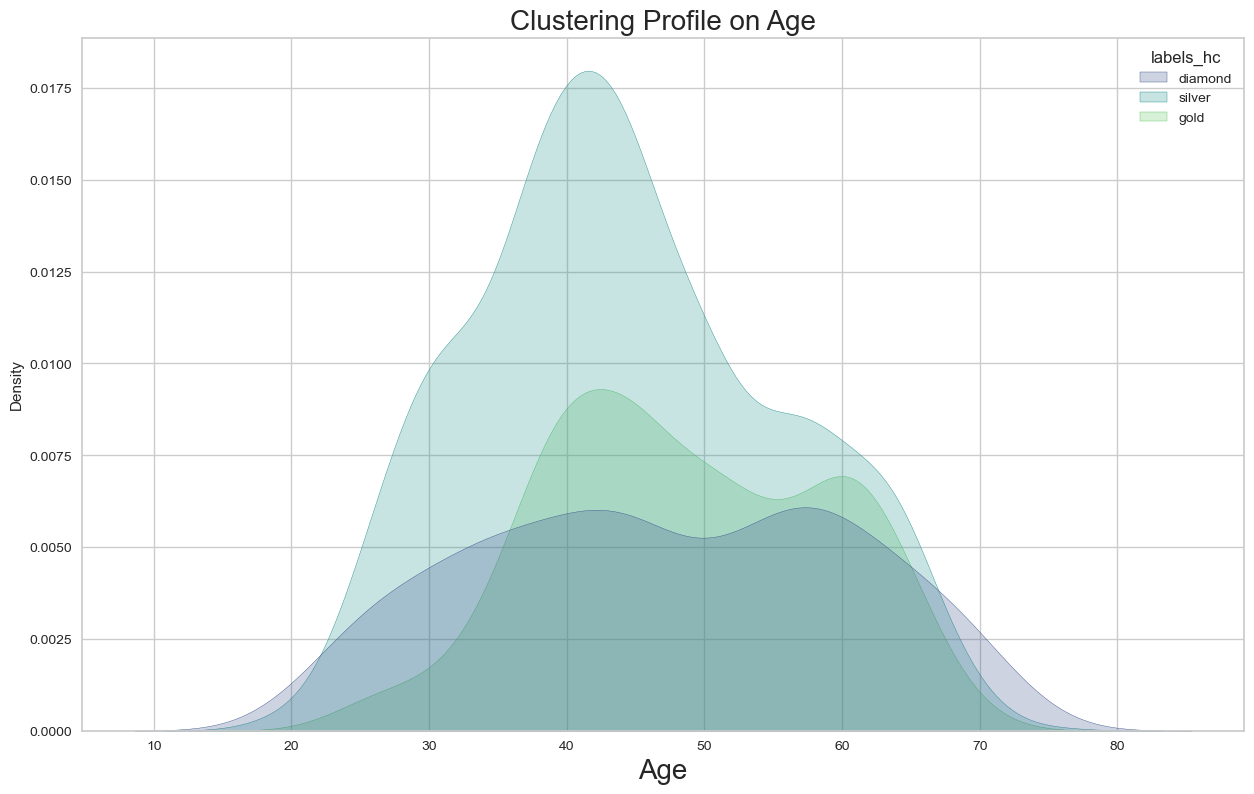

In [337]:
plt.figure(figsize=(15,9))
ax = sns.kdeplot(data=data, x="age", hue="labels_hc", shade=True, palette="viridis")
plt.title("Clustering Profile on Age",fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.show()

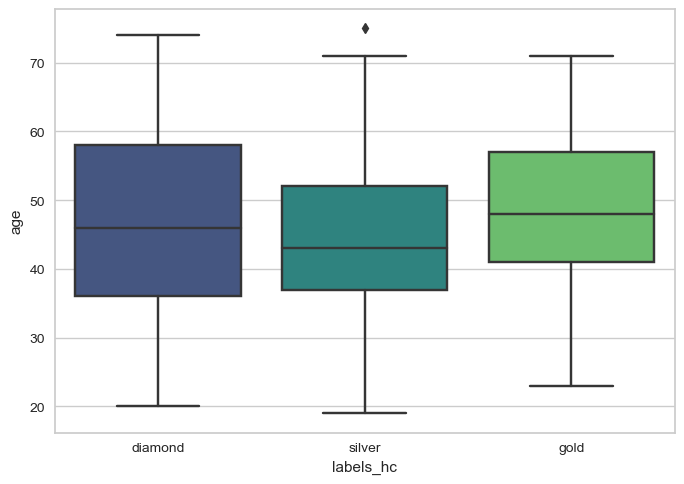

In [338]:
sns.boxplot(data=data, y="age", x="labels_hc", palette="viridis");

In [339]:
data[data["labels_hc"]=="silver"]["age"].describe()

count    1090
mean    44.29
std     11.12
min        19
25%        37
50%        43
75%        52
max        75
Name: age, dtype: float64

In [340]:
data[data["labels_hc"]=="gold"]["age"].describe()

count     573
mean    48.61
std     10.19
min        23
25%        41
50%        48
75%        57
max        71
Name: age, dtype: float64

In [341]:
data[data["labels_hc"]=="diamond"]["age"].describe()

count     573
mean    47.04
std     13.52
min        20
25%        36
50%        46
75%        58
max        74
Name: age, dtype: float64

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">Most of the customers of silver have age range in between 37 to 52.</p>
<p style="color:blue; font-size:16px;">Most of the customers of gold have age range in between 40 to 60.</p>
<p style="color:blue; font-size:16px;">Most of the customers of diamond have age range in between 35 to 60.</p>

In [ ]:
data.groupby(["labels_kmeans2"])["education"].value_counts()

In [342]:
data.groupby(["labels_kmeans2"])["education"].value_counts(normalize=True)

labels_kmeans2  education     
diamond         Graduate         0.56
                Post Graduate    0.44
                Under Graduate   0.00
gold            Post Graduate    0.52
                Graduate         0.48
                Under Graduate   0.00
silver          Graduate         0.49
                Post Graduate    0.46
                Under Graduate   0.05
Name: proportion, dtype: float64

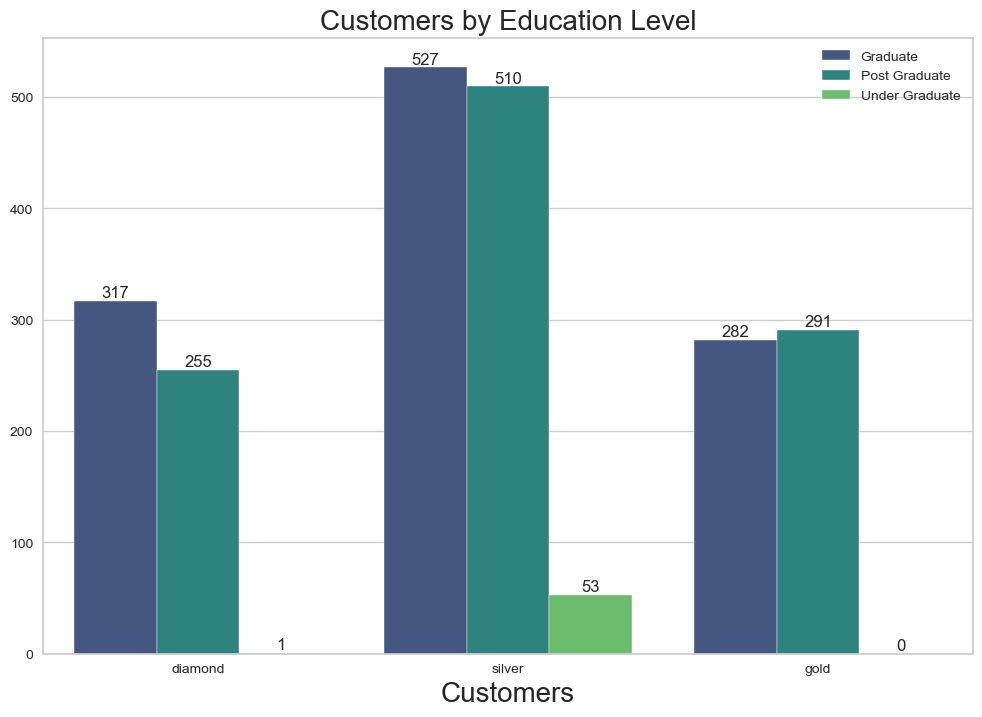

In [343]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=data, x ="labels_hc", hue="education", palette="viridis")
plt.title("Customers by Education Level",fontsize=20)
plt.xlabel("Customers",fontsize=20)
plt.ylabel("")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

In [344]:
data.groupby(["labels_hc","education"])["spent"].mean()

labels_hc  education     
diamond    Graduate         1,344.29
           Post Graduate    1,398.15
           Under Graduate        839
gold       Graduate           752.70
           Post Graduate      801.75
silver     Graduate           114.16
           Post Graduate      121.90
           Under Graduate      67.51
Name: spent, dtype: float64

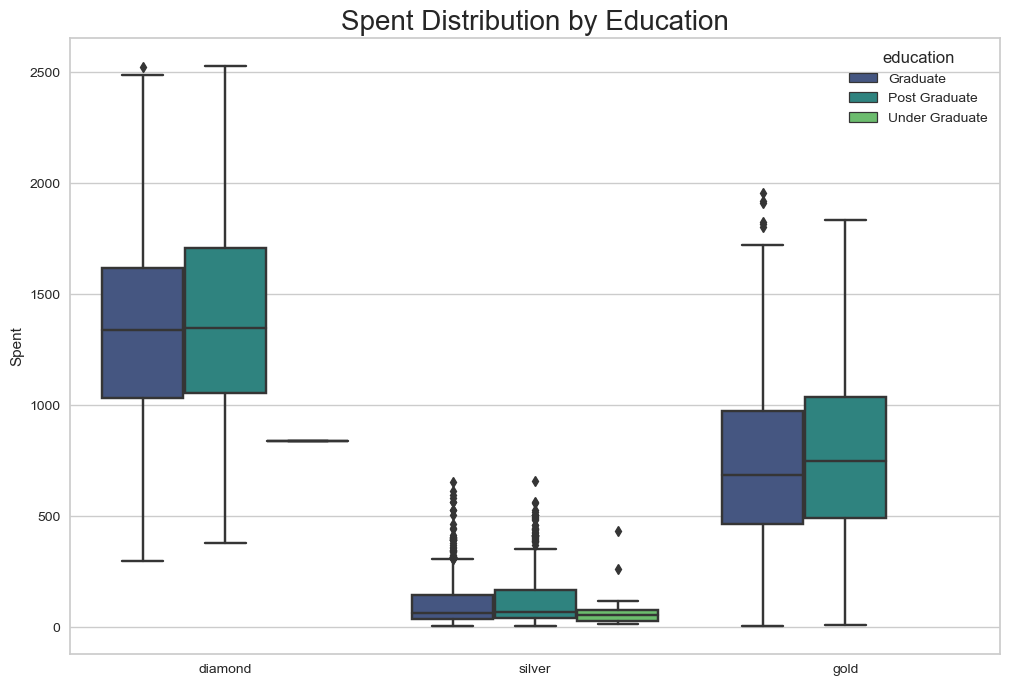

In [345]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="labels_hc", y="spent", hue="education", palette="viridis")
plt.title('Spent Distribution by Education',fontsize=20)
plt.xlabel('')
plt.ylabel('Spent')
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">56% of the diamond customers education level are Graduate.</p>
<p style="color:blue; font-size:16px;">44% of the diamond customers education level are Post Graduate.</p>
<br>
<p style="color:blue; font-size:16px;">52% of the gold customers education level are Post Graduate.</p>
<p style="color:blue; font-size:16px;">48% of the gold customers education level are Graduate.</p>
<br>
<p style="color:blue; font-size:16px;">49% of the silver customers education level are Graduate.</p>
<p style="color:blue; font-size:16px;">46% of the silver customers education level are Post Graduate.</p>
<p style="color:blue; font-size:16px;">5% of the silver customers education level are Under Graduate.</p>
<br>
<p style="color:blue; font-size:16px;">Customers with a higher level of education level tend to spend more.</p>

In [347]:
data.groupby(["labels_kmeans2"])["marital_status"].value_counts()

labels_kmeans2  marital_status
diamond         Relationship      359
                Single            220
gold            Relationship      426
                Single            209
silver          Relationship      657
                Single            365
Name: count, dtype: int64

In [346]:
data.groupby(["labels_kmeans2"])["marital_status"].value_counts(normalize=True)

labels_kmeans2  marital_status
diamond         Relationship     0.62
                Single           0.38
gold            Relationship     0.67
                Single           0.33
silver          Relationship     0.64
                Single           0.36
Name: proportion, dtype: float64

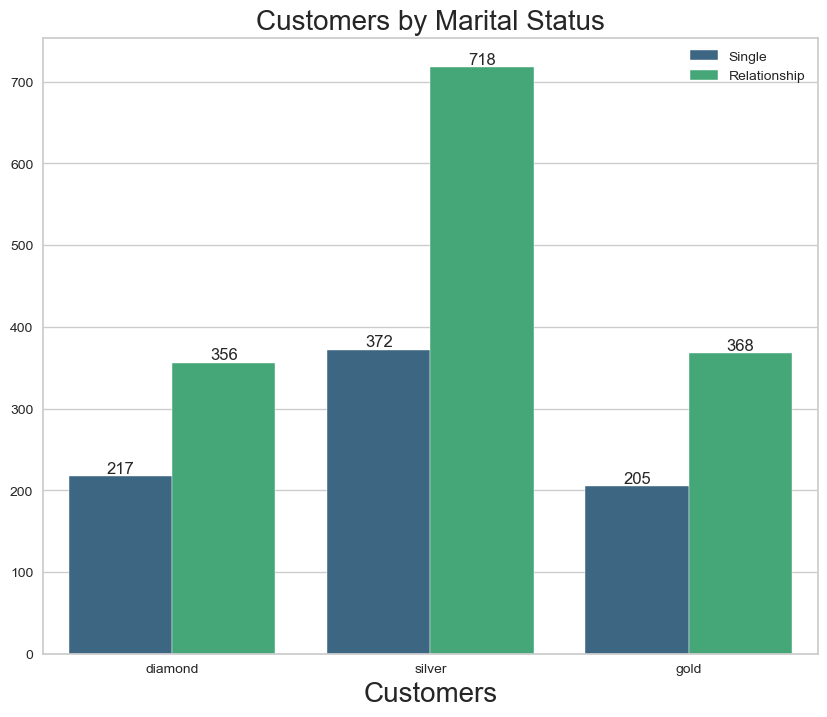

In [348]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=data, x ="labels_hc", hue="marital_status", palette="viridis")
plt.title("Customers by Marital Status",fontsize=20)
plt.xlabel("Customers",fontsize=20)
plt.ylabel("")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

In [349]:
data.groupby(["labels_hc","marital_status"])["spent"].mean()

labels_hc  marital_status
diamond    Relationship     1,362.37
           Single           1,375.61
gold       Relationship       788.92
           Single             757.30
silver     Relationship       119.89
           Single             107.07
Name: spent, dtype: float64

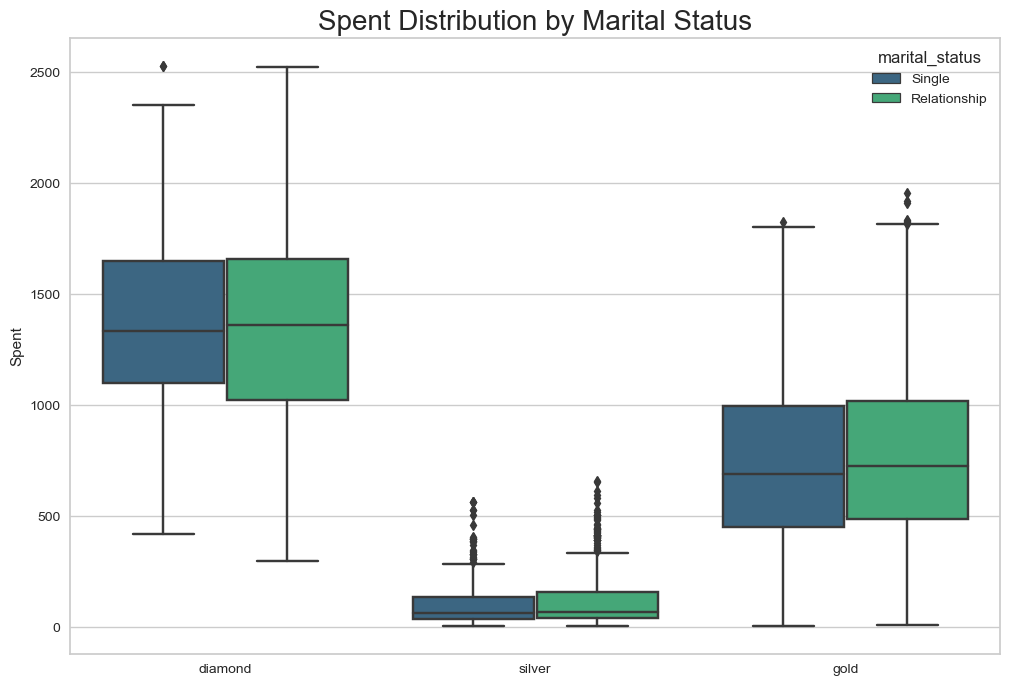

In [350]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="labels_hc", y="spent", hue="marital_status", palette="viridis")
plt.title('Spent Distribution by Marital Status',fontsize=20)
plt.xlabel('')
plt.ylabel('Spent')
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">62% of the diamond customers have a relationship and 38% of the diamond customers are single.</p>
<p style="color:blue; font-size:16px;">67% of the gold customers have a relationship and 33% of the gold customers are single.</p>
<p style="color:blue; font-size:16px;">64% of the silver customers have a relationship and 36% of the silver customers are single.</p>
<br>
<p style="color:blue; font-size:16px;">Distributions of clusters according to marriage status are nearly the same.</p>

In [351]:
data.groupby(["labels_hc"])["numwebpurchases"].sum()

labels_hc
diamond    2926
gold       3771
silver     2443
Name: numwebpurchases, dtype: int64

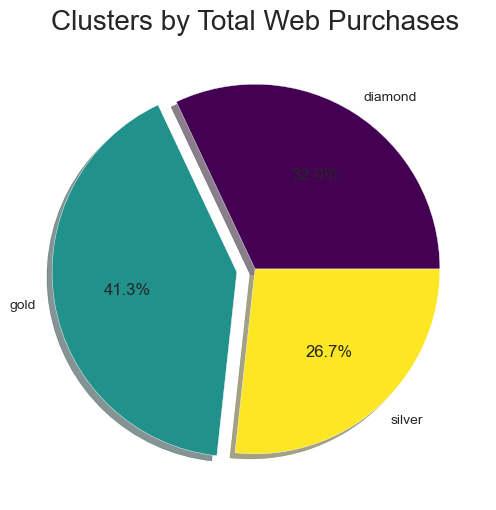

In [352]:
data.groupby(["labels_hc"])["numwebpurchases"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0,0.1, 0), shadow=True, figsize=(6,6))
plt.title("Clusters by Total Web Purchases",fontsize=20)
plt.ylabel("")
plt.show()

In [353]:
data.groupby(["labels_hc"])["numcatalogpurchases"].sum()

labels_hc
diamond    3362
gold       1898
silver      695
Name: numcatalogpurchases, dtype: int64

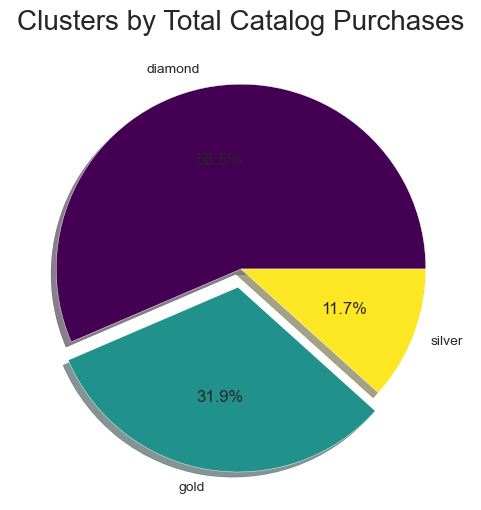

In [357]:
data.groupby(["labels_hc"])["numcatalogpurchases"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0,0.1, 0), shadow=True, figsize=(6,6))
plt.title("Clusters by Total Catalog Purchases",fontsize=20)
plt.ylabel("")
plt.show()

In [355]:
data.groupby(["labels_hc"])["numstorepurchases"].sum()

labels_hc
diamond    4803
gold       4408
silver     3748
Name: numstorepurchases, dtype: int64

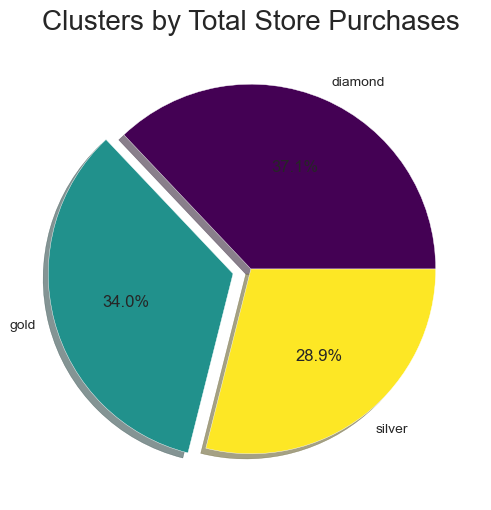

In [358]:
data.groupby(["labels_hc"])["numstorepurchases"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0,0.1, 0), shadow=True, figsize=(6,6))
plt.title("Clusters by Total Store Purchases",fontsize=20)
plt.ylabel("")
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">41% of web purchases are made by gold customers.</p>
<p style="color:blue; font-size:16px;">32% of web purchases are made by diamond customers.</p>
<p style="color:blue; font-size:16px;">27% of web purchases are made by silver customers.</p>
<br>
<p style="color:blue; font-size:16px;">56% of catalog purchases are made by diamond customers.</p>
<p style="color:blue; font-size:16px;">32% of catalog purchases are made by gold customers.</p>
<p style="color:blue; font-size:16px;">12% of catalog purchases are made by silver customers.</p>
<br>
<p style="color:blue; font-size:16px;">37% of store purchases are made by diamond customers.</p>
<p style="color:blue; font-size:16px;">34% of store purchases are made by gold customers.</p>
<p style="color:blue; font-size:16px;">29% of store purchases are made by silver customers.</p>

In [359]:
data.groupby(["labels_hc"])["days_since_enrollment"].mean()

labels_hc
diamond   541.41
gold      607.17
silver    501.43
Name: days_since_enrollment, dtype: float64

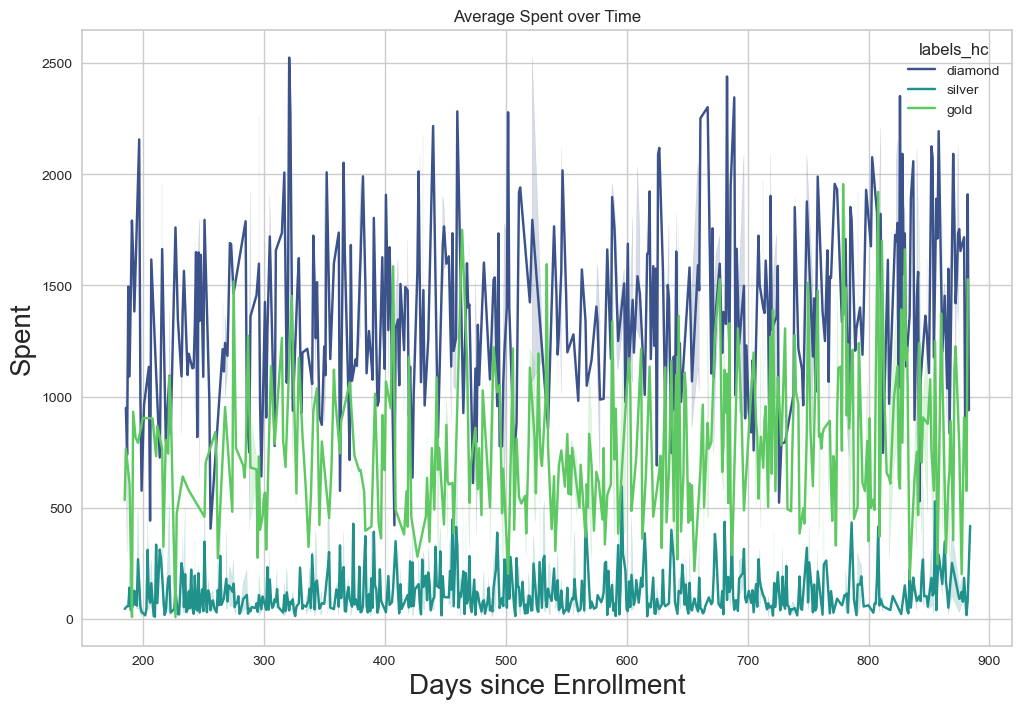

In [360]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x="days_since_enrollment", y="spent", hue="labels_hc", palette="viridis")

plt.title('Average Spent over Time')
plt.xlabel('Days since Enrollment', fontsize=20)
plt.ylabel('Spent',fontsize=20)

plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">No significant difference between the spent habits of clusters according to when they were registered.</p>


In [361]:
data.groupby(["labels_hc"])["mntwines"].sum()/data["mntwines"].sum()*100

labels_hc
diamond   50.89
gold      40.44
silver     8.67
Name: mntwines, dtype: float64

In [362]:
data.groupby(["labels_hc"])["mntfruits"].sum()/data["mntwines"].sum()*100

labels_hc
diamond   5.74
gold      2.01
silver    0.89
Name: mntfruits, dtype: float64

In [363]:
data.groupby(["labels_hc"])["mntmeatproducts"].sum()/data["mntwines"].sum()*100

labels_hc
diamond   38.22
gold      12.51
silver     4.17
Name: mntmeatproducts, dtype: float64

In [364]:
data.groupby(["labels_hc"])["mntfishproducts"].sum()/data["mntwines"].sum()*100

labels_hc
diamond   8.12
gold      2.99
silver    1.23
Name: mntfishproducts, dtype: float64

In [365]:
data.groupby(["labels_hc"])["mntsweetproducts"].sum()/data["mntwines"].sum()*100

labels_hc
diamond   5.77
gold      2.25
silver    0.88
Name: mntsweetproducts, dtype: float64

In [366]:
data.groupby(["labels_hc"])["mntgoldprods"].sum()/data["mntwines"].sum()*100

labels_hc
diamond   6.48
gold      5.32
silver    2.66
Name: mntgoldprods, dtype: float64

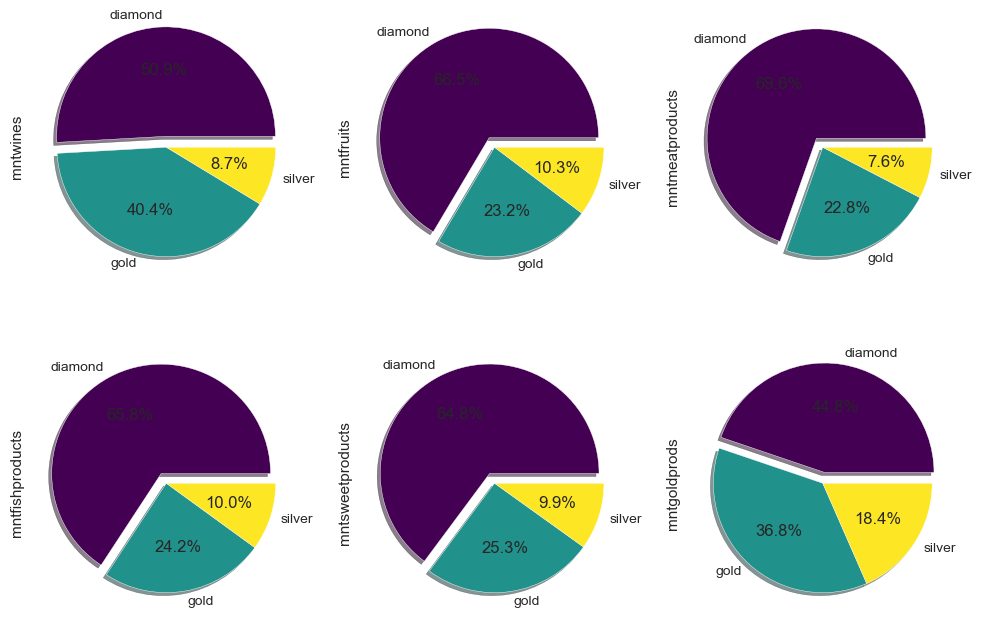

In [367]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
(data.groupby(["labels_hc"])["mntwines"].sum()/data["mntwines"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.subplot(2,3,2)
(data.groupby(["labels_hc"])["mntfruits"].sum()/data["mntfruits"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.subplot(2,3,3)
(data.groupby(["labels_hc"])["mntmeatproducts"].sum()/data["mntmeatproducts"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.subplot(2,3,4)
(data.groupby(["labels_hc"])["mntfishproducts"].sum()/data["mntfishproducts"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.subplot(2,3,5)
(data.groupby(["labels_hc"])["mntsweetproducts"].sum()/data["mntsweetproducts"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.subplot(2,3,6)
(data.groupby(["labels_hc"])["mntgoldprods"].sum()/data["mntgoldprods"].sum()*100).plot(kind="pie",autopct="%1.1f%%", cmap="viridis",explode=(0.1,0, 0), shadow=True)

plt.show()

In [368]:
wine_silver = data[data["labels_hc"]=="silver"]["mntwines"].sum()/data[data["labels_hc"]=="silver"]["spent"].sum()*100
fruit_silver = data[data["labels_hc"]=="silver"]["mntfruits"].sum()/data[data["labels_hc"]=="silver"]["spent"].sum()*100
meat_silver = data[data["labels_hc"]=="silver"]["mntmeatproducts"].sum()/data[data["labels_hc"]=="silver"]["spent"].sum()*100
fish_silver = data[data["labels_hc"]=="silver"]["mntfishproducts"].sum()/data[data["labels_hc"]=="silver"]["spent"].sum()*100
sweet_silver = data[data["labels_hc"]=="silver"]["mntsweetproducts"].sum()/data[data["labels_hc"]=="silver"]["spent"].sum()*100
gold_silver= data[data["labels_hc"]=="silver"]["mntgoldprods"].sum()/data[data["labels_hc"]=="silver"]["spent"].sum()*100

In [369]:
wine_gold = data[data["labels_hc"]=="gold"]["mntwines"].sum()/data[data["labels_hc"]=="gold"]["spent"].sum()*100
fruit_gold = data[data["labels_hc"]=="gold"]["mntfruits"].sum()/data[data["labels_hc"]=="gold"]["spent"].sum()*100
meat_gold = data[data["labels_hc"]=="gold"]["mntmeatproducts"].sum()/data[data["labels_hc"]=="gold"]["spent"].sum()*100
fish_gold = data[data["labels_hc"]=="gold"]["mntfishproducts"].sum()/data[data["labels_hc"]=="gold"]["spent"].sum()*100
sweet_gold = data[data["labels_hc"]=="gold"]["mntsweetproducts"].sum()/data[data["labels_hc"]=="gold"]["spent"].sum()*100
gold_gold= data[data["labels_hc"]=="gold"]["mntgoldprods"].sum()/data[data["labels_hc"]=="gold"]["spent"].sum()*100

In [370]:
wine_diamond = data[data["labels_hc"]=="diamond"]["mntwines"].sum()/data[data["labels_hc"]=="diamond"]["spent"].sum()*100
fruit_diamond = data[data["labels_hc"]=="diamond"]["mntfruits"].sum()/data[data["labels_hc"]=="diamond"]["spent"].sum()*100
meat_diamond = data[data["labels_hc"]=="diamond"]["mntmeatproducts"].sum()/data[data["labels_hc"]=="diamond"]["spent"].sum()*100
fish_diamond = data[data["labels_hc"]=="diamond"]["mntfishproducts"].sum()/data[data["labels_hc"]=="diamond"]["spent"].sum()*100
sweet_diamond = data[data["labels_hc"]=="diamond"]["mntsweetproducts"].sum()/data[data["labels_hc"]=="diamond"]["spent"].sum()*100
gold_diamond = data[data["labels_hc"]=="diamond"]["mntgoldprods"].sum()/data[data["labels_hc"]=="diamond"]["spent"].sum()*100

In [371]:
a=[wine_silver,fruit_silver,meat_silver,fish_silver,sweet_silver,gold_silver]
b=[wine_gold,fruit_gold,meat_gold,fish_gold,sweet_gold,gold_gold]
c=[wine_diamond,fruit_diamond,meat_diamond,fish_diamond,sweet_diamond,gold_diamond]
labels=["wine","fruits","meat","fish","sweet","gold"]

v1 = pd.DataFrame({'values': a}, index=labels)
v2 = pd.DataFrame({'values': b}, index=labels)
v3 = pd.DataFrame({'values': c}, index=labels)

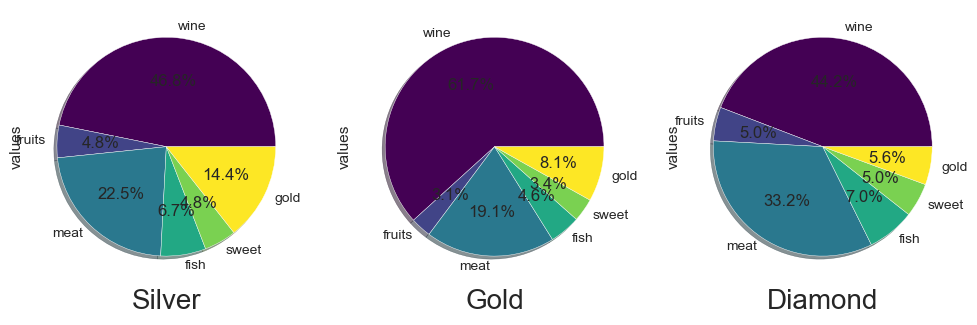

In [372]:
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
v1["values"].plot(kind="pie",autopct="%1.1f%%",subplots=True, cmap="viridis",shadow=True)
plt.xlabel("Silver",fontsize=20)

plt.subplot(1,3,2)
v2["values"].plot(kind="pie",autopct="%1.1f%%",subplots=True, cmap="viridis",shadow=True)
plt.xlabel("Gold",fontsize=20)

plt.subplot(1,3,3)
v3["values"].plot(kind="pie",autopct="%1.1f%%",subplots=True, cmap="viridis",shadow=True)
plt.xlabel("Diamond",fontsize=20)

plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">Diamond customers ranked first in sales of wine, fruit, meat, fish, sweet and gold products.</p>

<p style="color:blue; font-size:16px;">Gold customers rank second in sales of  wine, fruit, meat, fish, sweet and gold products.</p>
<br>
<p style="color:blue; font-size:16px;">Silver customers spend: 47% wine, 22% meat, 14% gold products.</p>
<p style="color:blue; font-size:16px;">Gold customers spend: 62% wine, 19% meat, 8% gold products.</p>
<p style="color:blue; font-size:16px;">Diamond customers spend: 44% wine, 33% meat, 7% fish.</p>

In [374]:
data.groupby(["labels_kmeans2"])["response"].value_counts()

labels_kmeans2  response
diamond         0           410
                1           169
gold            0           561
                1            74
silver          0           931
                1            91
Name: count, dtype: int64

In [373]:
data.groupby(["labels_kmeans2"])["response"].value_counts(normalize=True)

labels_kmeans2  response
diamond         0          0.71
                1          0.29
gold            0          0.88
                1          0.12
silver          0          0.91
                1          0.09
Name: proportion, dtype: float64

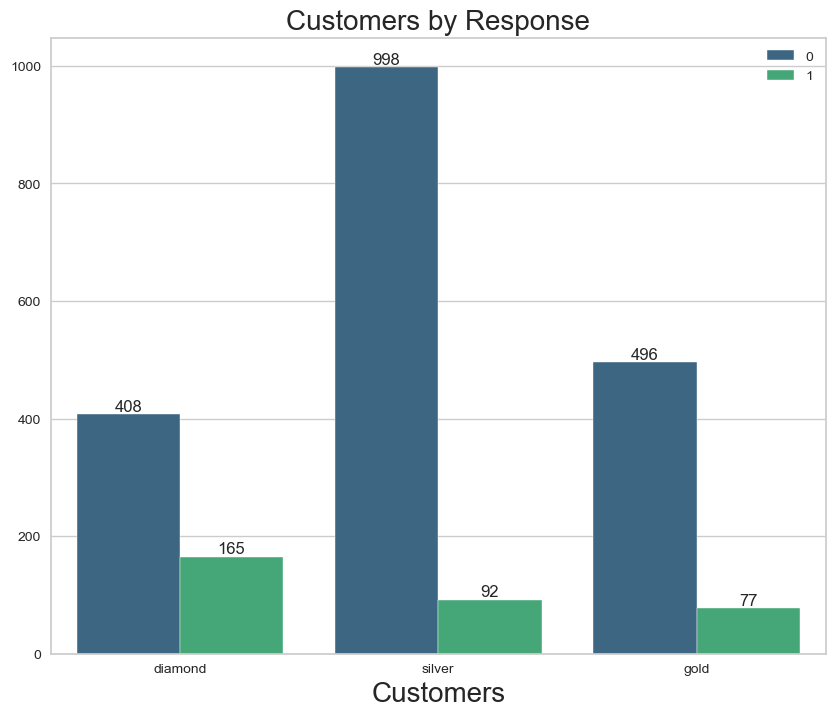

In [375]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=data, x ="labels_hc", hue="response", palette="viridis")
plt.title("Customers by Response",fontsize=20)
plt.xlabel("Customers",fontsize=20)
plt.ylabel("")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.legend(loc='best')        
plt.show()

In [376]:
data[data["response"]==1]["labels_hc"].value_counts()

labels_hc
diamond    165
silver      92
gold        77
Name: count, dtype: int64

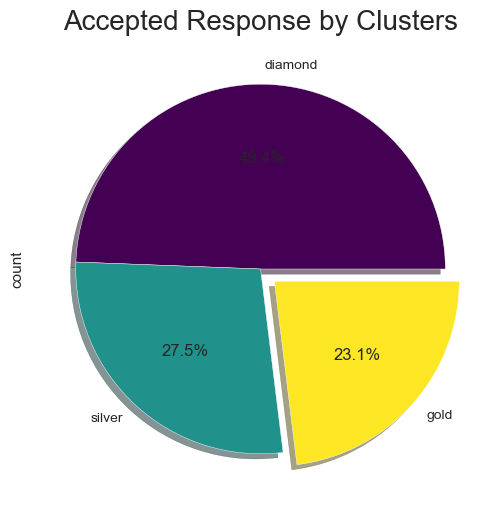

In [377]:
data[data["response"]==1]["labels_hc"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="viridis",explode=(0,0, 0.1), shadow=True, figsize=(6,6))
plt.title("Accepted Response by Clusters",fontsize=20)
plt.show()

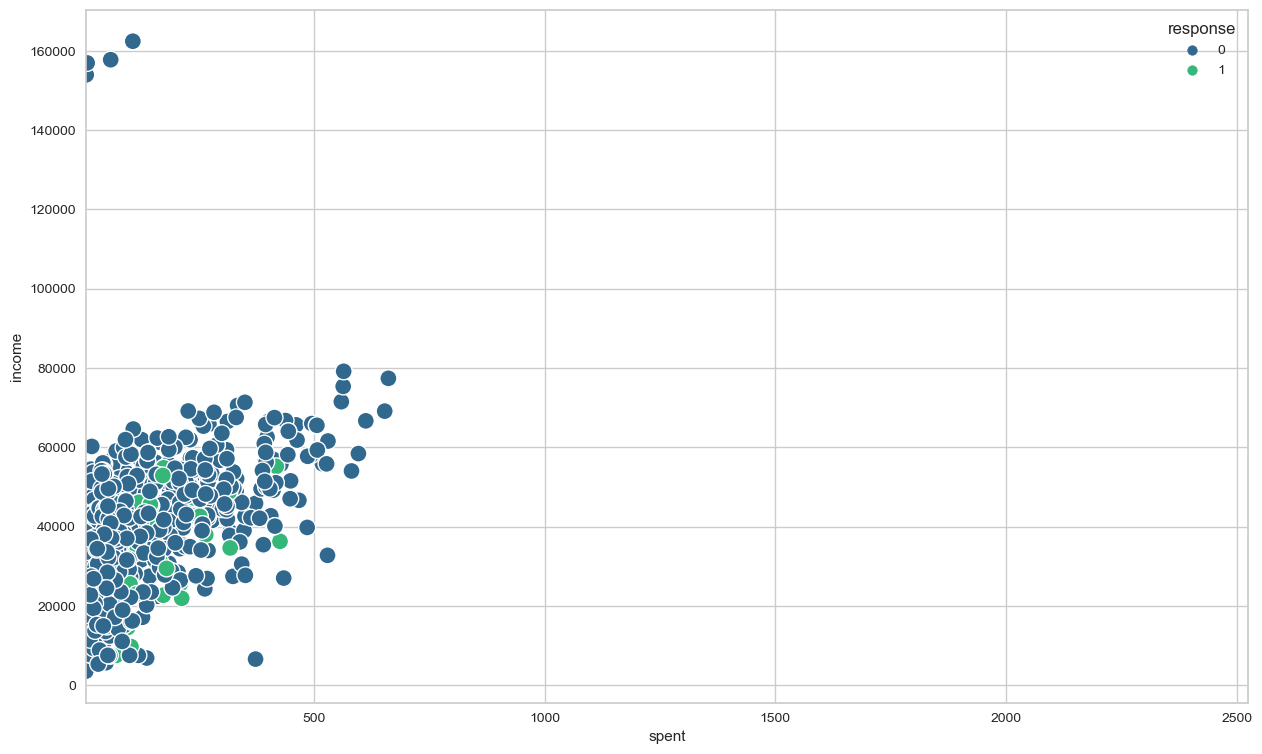

In [378]:
x_min = data['spent'].min()
x_max = data['spent'].max()

plt.figure(figsize=(15,9))
sns.scatterplot(data=data[data["labels_hc"]=="silver"], x="spent", y="income",hue="response",palette="viridis",s=150)
plt.xlim(x_min, x_max)
plt.show()

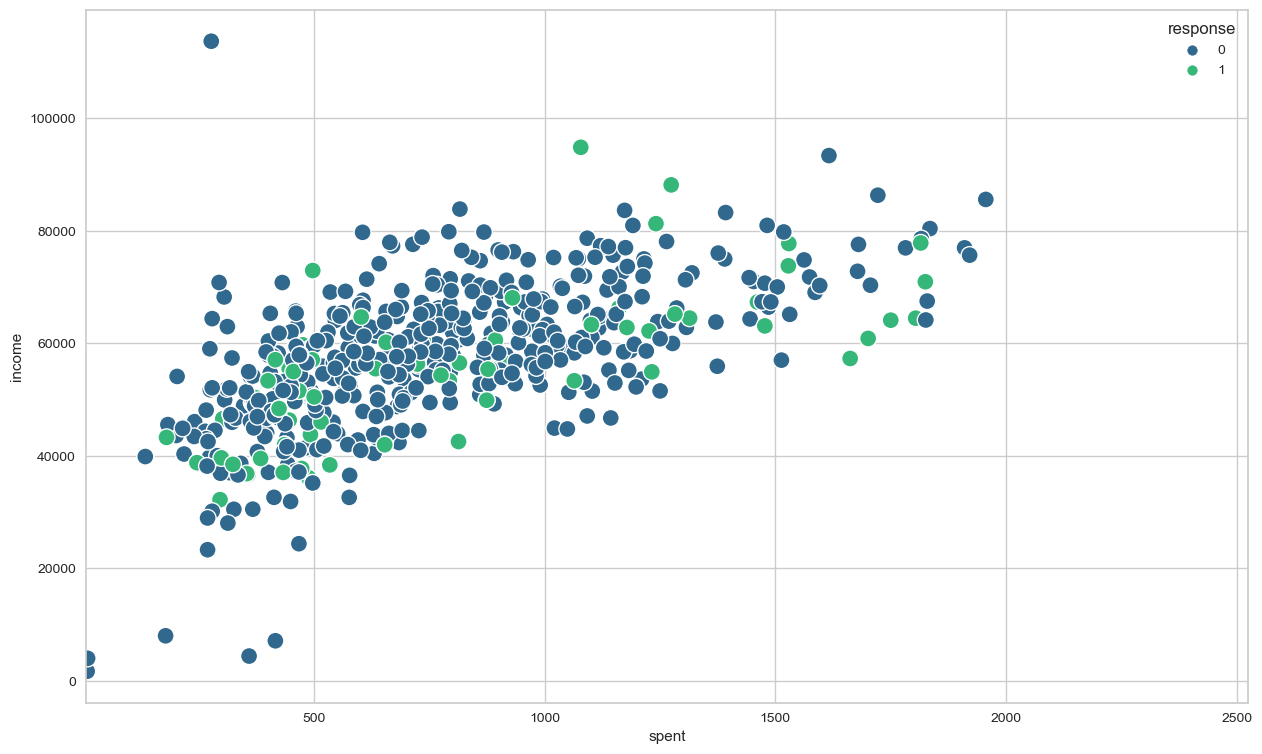

In [379]:
x_min = data['spent'].min()
x_max = data['spent'].max()

plt.figure(figsize=(15,9))
sns.scatterplot(data=data[data["labels_hc"]=="gold"], x="spent", y="income",hue="response", palette="viridis",s=150)
plt.xlim(x_min, x_max)
plt.show()

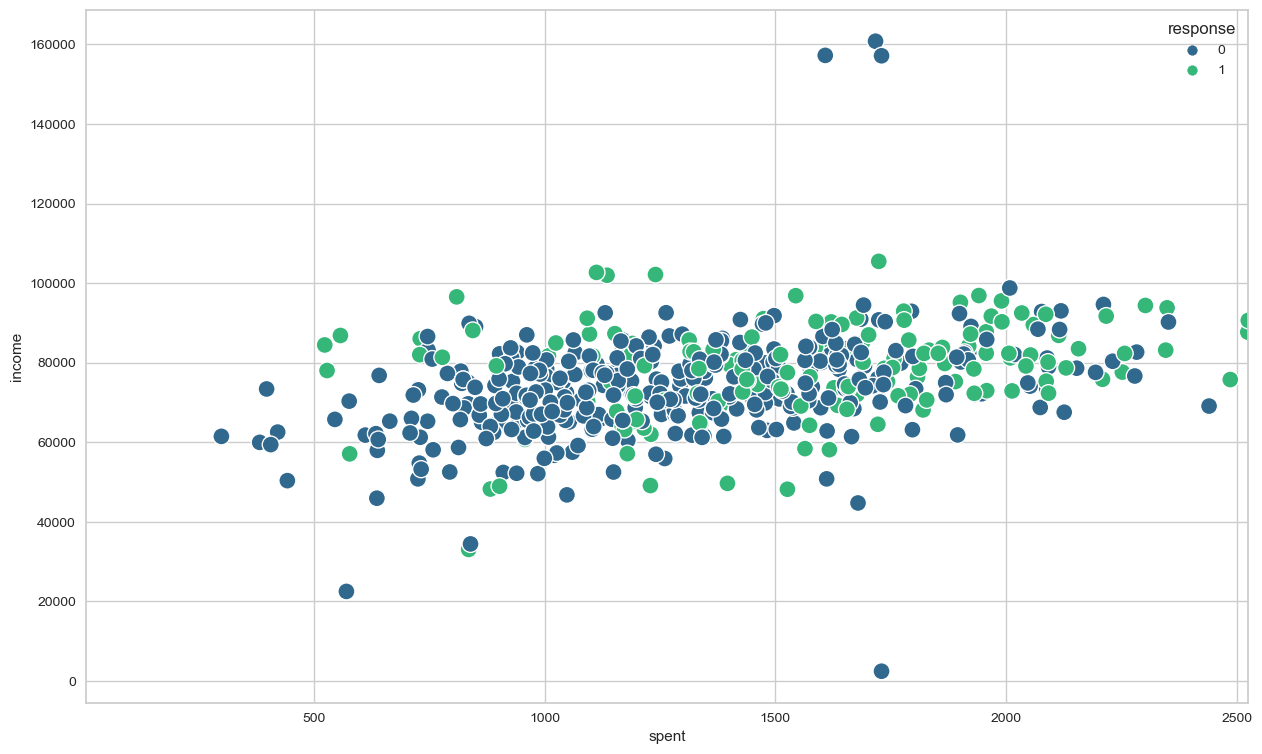

In [380]:
x_min = data['spent'].min()
x_max = data['spent'].max()

plt.figure(figsize=(15,9))
sns.scatterplot(data=data[data["labels_hc"]=="diamond"], x="spent", y="income",hue="response", palette="viridis",s=150)
plt.xlim(x_min, x_max)
plt.show()

<p style="color:red; font-size:24px;">Insights</p>

<p style="color:blue; font-size:16px;">50% of the accepted responses belong to diamond customers.</p>
<p style="color:blue; font-size:16px;">27% of the accepted responses belong to silver customers.</p>
<p style="color:blue; font-size:16px;">23% of the accepted responses belong to gold customers.</p>
<br>
<p style="color:blue; font-size:16px;">71% of diamond customers rejected the response</p>
<p style="color:blue; font-size:16px;">88% of gold customers rejected the response</p>
<p style="color:blue; font-size:16px;">91% of silver customers rejected the response</p>

# Customer's Clusters Profiling 

<p style="color:red; font-size:24px;">Silver</p>

<p style="color:blue; font-size:16px;">The majority of customers are silver.</p>
<p style="color:blue; font-size:16px;">Income range is in between 25000 to 45000 and spending range is in between 40 to 150.</p>
<p style="color:blue; font-size:16px;">Average age is 44.</p>
<p style="color:blue; font-size:16px;">Most of them are Graduate.</p>
<p style="color:blue; font-size:16px;">Nearly 2/3 of them have a relationship.</p>
<p style="color:blue; font-size:16px;">1/2 of them have 1 child.</p>
<p style="color:blue; font-size:16px;">The expenditure of single customers is almost the same as the expenditure of customers with a relationship.</p>
<p style="color:blue; font-size:16px;">Silver customers' purchasing priorities: wine>meat>gold products>fish>sweet=fruits</p>
<p style="color:blue; font-size:16px;">Campaign acceptance is rare.</p>
<p style="color:blue; font-size:16px;">Shopping with discount is high.</p>
<p style="color:blue; font-size:16px;">Average number of days since enrollment is 501.</p>
<br>



<p style="color:red; font-size:24px;">Gold</p>

<p style="color:blue; font-size:16px;">Income range is in between 50000 to 65000 and spending range is in between 400 to 1000.</p>
<p style="color:blue; font-size:16px;">Average age is 40.</p>
<p style="color:blue; font-size:16px;">Most of them are Graduate and Post Graduate.</p>
<p style="color:blue; font-size:16px;">Nearly 2/3 of them have a relationship.</p>
<p style="color:blue; font-size:16px;">Most of them have 1 child.</p>
<p style="color:blue; font-size:16px;">The expenditure of single customers is almost the same as the expenditure of customers with a relationship.</p>
<p style="color:blue; font-size:16px;">Gold customers rank 1st in web purchases.</p>
<p style="color:blue; font-size:16px;">Store purchases are almost equal to Diamond customers and more than Silver customers.</p>
<p style="color:blue; font-size:16px;">Gold customers' purchasing priorities: wine>meat>gold products>fish>sweet>fruits</p>
<p style="color:blue; font-size:16px;">Campaign acceptance is low.</p>
<p style="color:blue; font-size:16px;">Shopping with discount is high.</p>
<p style="color:blue; font-size:16px;">Average number of days since enrollment is 607.</p>
<br>


<p style="color:red; font-size:24px;">Diamond</p>

<p style="color:blue; font-size:16px;">Income range is in between 65000 to 83000 and spending range is in between 1000 to 1700.</p>
<p style="color:blue; font-size:16px;">Average age is 47.</p>
<p style="color:blue; font-size:16px;">Most of them are Graduate and Post Graduate.</p>
<p style="color:blue; font-size:16px;">Nearly 2/3 of them have a relationship.</p>
<p style="color:blue; font-size:16px;">Most of them have no child.</p>
<p style="color:blue; font-size:16px;">The expenditure of single customers is almost the same as the expenditure of customers with a relationship.</p>
<p style="color:blue; font-size:16px;">Diamond customers rank 1st in catalogue purchases.</p>
<p style="color:blue; font-size:16px;">Store purchases are almost equal to Gold customers and more than Silver customers.</p>
<p style="color:blue; font-size:16px;">Diamond customers' purchasing priorities : wine>meat>fish>gold products>sweet>fruits</p>
<p style="color:blue; font-size:16px;">Campaign acceptance is high.</p>
<p style="color:blue; font-size:16px;">Shopping with discount is low.</p>
<p style="color:blue; font-size:16px;">Average number of days since enrollment is 541.</p>
<p style="color:blue; font-size:16px;">1/2 of response acceptance belongs to diamond customers.</p>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___